In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
#Custom figures
import matplotlib 
matplotlib.rc('xtick', labelsize=8) 
matplotlib.rc('ytick', labelsize=8) 
matplotlib.rc('font', size=18)

## 1. Import study data

In [3]:
ADNIMERGE = pd.read_csv("ADNIMERGE.csv",low_memory=False)
ADNIMERGE = ADNIMERGE[ADNIMERGE['VISCODE']=='bl']
ADNIMERGE.head()

RID COLPROT ORIGPROT        PTID  SITE VISCODE    EXAMDATE DX_bl   AGE  \
0     2   ADNI1    ADNI1  011_S_0002    11      bl  2005-09-08    CN  74.3   
1     3   ADNI1    ADNI1  011_S_0003    11      bl  2005-09-12    AD  81.3   
5     4   ADNI1    ADNI1  022_S_0004    22      bl  2005-11-08  LMCI  67.5   
10    5   ADNI1    ADNI1  011_S_0005    11      bl  2005-09-07    CN  73.7   
15    6   ADNI1    ADNI1  100_S_0006   100      bl  2005-11-29  LMCI  80.4   

   PTGENDER  PTEDUCAT         PTETHCAT PTRACCAT  PTMARRY  APOE4      FDG  PIB  \
0      Male        16  Not Hisp/Latino    White  Married    0.0  1.33615  NaN   
1      Male        18  Not Hisp/Latino    White  Married    1.0  1.10860  NaN   
5      Male        10      Hisp/Latino    White  Married    0.0      NaN  NaN   
10     Male        16  Not Hisp/Latino    White  Married    0.0  1.25956  NaN   
15   Female        13  Not Hisp/Latino    White  Married    0.0      NaN  NaN   

    AV45  FBB  ABETA    TAU   PTAU  CDRSB  ADAS11  ADAS13  ADASQ4  MMSE  \
0    NaN  NaN    NaN    NaN    NaN    0.0   10.67   18.67     5.0  28.0   
1    NaN  NaN  741.5  239.7  22.83    4.5   22.00   31.00     8.0  20.0   
5    NaN  NaN   1501  153.1  13.29    1.0   14.33   21.33     6.0  27.0   
10   NaN  NaN  547.3    337  33.43    0.0    8.67   14.67     4.0  29.0   
15   NaN  NaN    NaN    NaN    NaN    0.5   18.67   25.67     7.0  25.0   

    RAVLT_immediate  RAVLT_learning  RAVLT_forgetting  RAVLT_perc_forgetting  \
0              44.0             4.0               6.0                54.5455   
1              22.0             1.0               4.0               100.0000   
5              37.0             7.0               4.0                36.3636   
10             37.0             4.0               4.0                44.4444   
15             30.0             1.0               5.0                83.3333   

    LDELTOTAL  DIGITSCOR  TRABSCOR   FAQ  MOCA  EcogPtMem  EcogPtLang  \
0        10.0       34.0     112.0   0.0   NaN        NaN         NaN   
1         2.0       25.0     148.0  10.0   NaN        NaN         NaN   
5         4.0       25.0     271.0   0.0   NaN        NaN         NaN   
10       12.0       38.0      90.0   0.0   NaN        NaN         NaN   
15        3.0       34.0     168.0   0.0   NaN        NaN         NaN   

    EcogPtVisspat  EcogPtPlan  EcogPtOrgan  EcogPtDivatt  EcogPtTotal  \
0             NaN         NaN          NaN           NaN          NaN   
1             NaN         NaN          NaN           NaN          NaN   
5             NaN         NaN          NaN           NaN          NaN   
10            NaN         NaN          NaN           NaN          NaN   
15            NaN         NaN          NaN           NaN          NaN   

    EcogSPMem  EcogSPLang  EcogSPVisspat  EcogSPPlan  EcogSPOrgan  \
0         NaN         NaN            NaN         NaN          NaN   
1         NaN         NaN            NaN         NaN          NaN   
5         NaN         NaN            NaN         NaN          NaN   
10        NaN         NaN            NaN         NaN          NaN   
15        NaN         NaN            NaN         NaN          NaN   

    EcogSPDivatt  EcogSPTotal      FLDSTRENG  \
0            NaN          NaN  1.5 Tesla MRI   
1            NaN          NaN  1.5 Tesla MRI   
5            NaN          NaN  1.5 Tesla MRI   
10           NaN          NaN  1.5 Tesla MRI   
15           NaN          NaN  1.5 Tesla MRI   

                                            FSVERSION  IMAGEUID  Ventricles  \
0   Cross-Sectional FreeSurfer (FreeSurfer Version...   35475.0    118233.0   
1   Cross-Sectional FreeSurfer (FreeSurfer Version...   32237.0     84599.0   
5   Cross-Sectional FreeSurfer (FreeSurfer Version...   64631.0     39605.0   
10  Cross-Sectional FreeSurfer (FreeSurfer Version...   32246.0     34062.0   
15  Cross-Sectional FreeSurfer (FreeSurfer Version...   33025.0     39826.0   

    Hippocampus  WholeBrain  Entorhinal  Fusiform  MidTemp 

In [4]:
print("Number of rows: ", ADNIMERGE.shape[0])
print("Number of columns: ", ADNIMERGE.shape[1])

Number of rows:  2428
Number of columns:  116


## 2. EDA (Study Data)

### 2.1. Age distribution by diagnostic status in baseline

Diagnostic codes (in baseline):

- **CN**: controls
- **AD**: alzheimer's disease (dementia diagnostic)
- **LMCI**: late mild cognitive impairment
- **EMCI**: early mild cognitive impairment
- **SMC**: subjective memory concerns (it is considered cognitive normal)

In [5]:
ADNIMERGE['DX_bl'].unique()

array(['CN', 'AD', 'LMCI', 'SMC', 'EMCI', nan], dtype=object)

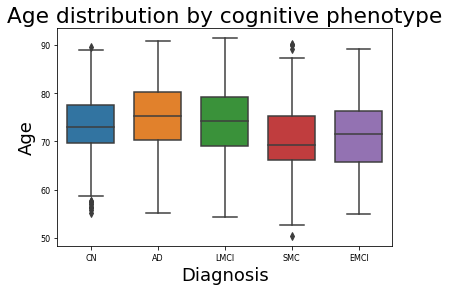

In [6]:
sns.boxplot( x=ADNIMERGE["DX_bl"], y=ADNIMERGE["AGE"], width=0.7);
plt.title("Age distribution by cognitive phenotype")
plt.xlabel("Diagnosis")
plt.ylabel("Age")
plt.show()

#### Kruskal-Wallis Test

To compare the distributions, we have performed a **Kruskal-Wallis** test which is a non-parametric test and an alternative to one-way Anova. By non-parametric we mean, the data is not assumed to become from a particular distribution. The main objective of this test is used to determine whether there is a statistical difference between the medians of at least three independent groups. 

The hypothesese are: 
- **Null hypothesis (H0)**: the median is the same for all the data groups
- **Alternative hypothesis (Ha)**: the median is not equal for all data groups. 

In [7]:
#Import required package
from scipy import stats

In [8]:
#Count NAs
print("Number of missing values for the age: ", ADNIMERGE['AGE'].isna().sum())

Number of missing values for the age:  4


In [9]:
#drop rows with NANs as they are giving problems in the statistical analysis
ADNIMERGE = ADNIMERGE.dropna(subset = ['AGE'])
print("Number of missing values for the age: ", ADNIMERGE['AGE'].isna().sum())

Number of missing values for the age:  0


In [10]:
#Prepare data for statistical tests
CN_age = ADNIMERGE[ADNIMERGE["DX_bl"]=='CN']['AGE'].values.tolist()
AD_age = ADNIMERGE[ADNIMERGE["DX_bl"]=='AD']['AGE'].values.tolist()
LMCI_age = ADNIMERGE[ADNIMERGE["DX_bl"]=='LMCI']['AGE'].values.tolist()
SMC_age = ADNIMERGE[ADNIMERGE["DX_bl"]=='SMC']['AGE'].values.tolist()
EMCI_age = ADNIMERGE[ADNIMERGE["DX_bl"]=='EMCI']['AGE'].values.tolist()

In [11]:
#Run Kruskal-Wallis test
KW_age = stats.kruskal(CN_age, AD_age, LMCI_age, SMC_age, EMCI_age)
print(KW_age)

KruskalResult(statistic=106.38929707080892, pvalue=4.283650979348773e-22)


The p-value is below 0.05 and thus, we can reject the null hypothesis, suggesting that the at least one of the groups do not have the same age distribution as the others.

#### Mann-Whitney Test

In addition, we can compare the distributions of each of the cognitive impairment groups with the controls using a **Mann-Whitney** test. This test is equivalent to the Kruskal-Wallis test, but compares only two grous at a time. 

In [12]:
#Mann-Whitney tests
print("Controls-SMC: ", stats.mannwhitneyu(CN_age,AD_age))
print("Controls-EMCI: ", stats.mannwhitneyu(CN_age,EMCI_age))
print("Controls-LMCI: ", stats.mannwhitneyu(CN_age,LMCI_age))
print("Controls-AD: ", stats.mannwhitneyu(CN_age,AD_age))

Controls-SMC:  MannwhitneyuResult(statistic=95390.0, pvalue=0.0002048873918692586)
Controls-EMCI:  MannwhitneyuResult(statistic=132295.0, pvalue=9.270313253534334e-06)
Controls-LMCI:  MannwhitneyuResult(statistic=174909.0, pvalue=0.08593701785458925)
Controls-AD:  MannwhitneyuResult(statistic=95390.0, pvalue=0.0002048873918692586)


We cannot reject the null hypothesis only for the LMCI group, where the p-value suggests that the two distributions are the same. 

In [13]:
#groupping all patients in the same group
noCN_age = ADNIMERGE[ADNIMERGE["DX_bl"]!='CN']['AGE'].values.tolist()
print("Controls-no controls: ", stats.mannwhitneyu(CN_age,noCN_age))

Controls-no controls:  MannwhitneyuResult(statistic=527537.0, pvalue=0.18847205346018037)


**Conclusion**: the age distribution is not the same in controls than in the different groups, except if we only consider two groups (healthy and patients with cognitive impairment). These results do not support a normalization based on the age of the controls. Nevertheless these tests should be repeated for the patients included in the batteries that are going to be used for the study. 

### 2.2. Gender distribution by diagnosis group

In [14]:
#calculate sum of values by group
df_sex = ADNIMERGE.groupby(['DX_bl', 'PTGENDER']).agg(Count=("RID", 'count'))
df_sex = df_sex.reset_index()
#df_sex

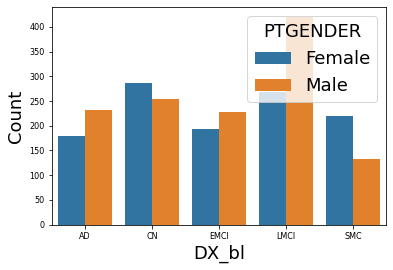

In [15]:
#print barplot
sns.barplot(x="DX_bl",
           y="Count",
           hue="PTGENDER",
           data=df_sex)

plt.show()

### 2.3. Ethnic distribution by diagnosis group

In [16]:
#calculate sum of values by group
df_eth = ADNIMERGE.groupby(['DX_bl', 'PTRACCAT']).agg(Count=("RID", 'count'))
df_eth = df_eth.reset_index()
#df_eth.head()

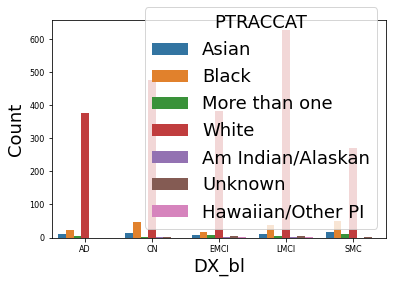

In [17]:
#print barplot
sns.barplot(x="DX_bl",
           y="Count",
           hue="PTRACCAT",
           data=df_eth)

plt.show()

## 3. Neurocognitive test batteries data inspection

First we are going to find how many patients -in baseline- have been administered with the three batteries (ADAS-cog, MMSE, MoCA).

### 3.1. Data import

#### ADAS-cog

In [18]:
#ADAS-cog (ADNIGO,2,3)
ADAS = pd.read_csv("Neuropsychological/ADAS_ADNIGO23.csv")
ADAS = ADAS[ADAS['VISCODE2']=='bl']
ADAS.head()

Phase  ID   RID  SITEID VISCODE VISCODE2    USERDATE   USERDATE2  \
5   ADNIGO  22  2002      48      bl       bl  2010-07-06  2011-02-28   
6   ADNIGO  24  2007      12      bl       bl  2010-07-07  2011-02-28   
7   ADNIGO  26  2010       1      bl       bl  2010-07-09  2011-02-28   
10  ADNIGO  32  2011      48      bl       bl  2010-07-21  2011-02-28   
13  ADNIGO  38  2003      48      bl       bl  2010-07-23  2011-02-28   

    WORDLIST  Q1UNABLE          Q1TR1                Q1TR2              Q1TR3  \
5        1.0       NaN  0:1:2:3:5:6:7  0:1:2:3:4:5:6:7:8:9  0:2:3:4:5:6:7:8:9   
6        1.0       NaN      1:4:7:8:9        0:3:4:6:7:8:9  0:2:3:4:5:6:7:8:9   
7        1.0       NaN  0:1:4:6:7:8:9    0:2:3:4:5:6:7:8:9    0:1:2:3:5:6:8:9   
10       1.0       NaN  0:1:2:3:6:7:9        0:1:2:3:4:5:9    0:1:2:3:4:5:8:9   
13       1.0       NaN        0:3:6:9        0:1:2:4:5:6:9    0:1:2:4:5:6:8:9   

    Q1TRIT  Q1TR2T  Q1TRT  Q1SCORE  TIMEEND  Q2UNABLE     Q2TASK  Q2SCORE  \
5      NaN     NaN    NaN      1.0      NaN       NaN  1:2:3:4:5      0.0   
6      NaN     NaN    NaN      3.0      NaN       NaN  1:2:3:4:5      0.0   
7      NaN     NaN    NaN      2.0      NaN       NaN  1:2:3:4:5      0.0   
10     NaN     NaN    NaN      3.0      NaN       NaN  1:2:3:4:5      0.0   
13     NaN     NaN    NaN      4.0      NaN       NaN  1:2:3:4:5      0.0   

    Q3UNABLE  Q3TASK1  Q3TASK2  Q3TASK3  Q3TASK4  Q3SCORE  Q4UNABLE  \
5        NaN      1.0      1.0      1.0      1.0      0.0       NaN   
6        NaN      1.0      1.0      1.0      2.0      1.0       NaN   
7        NaN      1.0      1.0      1.0      1.0      0.0       NaN   
10       NaN      1.0      1.0      1.0      2.0      1.0       NaN   
13       NaN      1.0      1.0      1.0      2.0      1.0       NaN   

    TIMEBEGAN           Q4TASK  Q4SCORE  Q5UNABLE  \
5         NaN  0:1:3:4:6:7:8:9      2.0       NaN   
6         NaN  0:1:2:4:5:6:7:8      2.0       NaN   
7         NaN    0:1:2:4:5:7:9      3.0       NaN   
10        NaN  0:1:2:3:4:5:7:9      2.0       NaN   
13        NaN  0:2:3:4:6:7:8:9      2.0       NaN   

                                       Q5TASK  Q5SCORE  Q5NAME1  Q5NAME2  \
5      1:2:3:4:5:6:7:8:9:10:11:13:14:15:16:17      0.0      NaN      NaN   
6      1:2:3:4:5:6:7:8:9:10:11:13:14:15:16:17      0.0      NaN      NaN   
7   1:2:3:4:5:6:7:8:9:10:11:12:13:14:15:16:17      0.0      NaN      NaN   
10  1:2:3:4:5:6:7:8:9:10:11:12:13:14:15:16:17      0.0      NaN      NaN   
13     1:2:3:4:5:6:7:8:9:10:11:13:14:15:16:17      0.0      NaN      NaN   

    Q5NAME3  Q5NAME4  Q5NAME5  Q5NAME6  Q5NAME7  Q5NAME8  Q5NAME9  Q5NAME10  \
5       NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
6       NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
7       NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
10      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
13      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   

    Q5NAME11  Q5NAME12 Q5FINGER  Q5SCORE_CUE  Q6UNABLE     Q6TASK  Q6SCORE  \
5        NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
6        NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
7        NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
10       NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
13       NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   

    Q7UNABLE           Q7TASK  Q7SCORE  Q8UNABLE  Q8WORD1  Q8WORD1R  Q8WORD2  \
5        NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
6        NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
7        NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
10       NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
13       NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0  

In [19]:
print("Number of subjects: ", len(ADAS['RID'].unique()))

Number of subjects:  1606


Count missing data

In [20]:
ADAS_columns = ["Q1SCORE","Q2SCORE","Q3SCORE","Q4SCORE","Q5SCORE","Q6SCORE","Q7SCORE",
          "Q8SCORE","Q9SCORE","Q10SCORE","Q11SCORE","Q12SCORE","Q13SCORE"]

for column in ADAS_columns:
    NullSum = ADAS[column].isnull().sum(axis = 0)
    print(f"{column}: {NullSum}")
    
print("Number of rows with missing values: ", ADAS[ADAS_columns].isna().any(axis=1).sum())
    
print("Total number of tests: ", len(ADAS_columns) )

Q1SCORE: 3
Q2SCORE: 3
Q3SCORE: 3
Q4SCORE: 3
Q5SCORE: 5
Q6SCORE: 3
Q7SCORE: 4
Q8SCORE: 5
Q9SCORE: 4
Q10SCORE: 3
Q11SCORE: 3
Q12SCORE: 3
Q13SCORE: 8
Number of rows with missing values:  13
Total number of tests:  13


There are only 13 subjects that have missing data in any test. 

In [21]:
#Drop NaN
ADAS = ADAS.dropna(subset=ADAS_columns)
print("Number of subjects that have completed all tests: ", ADAS.shape[0])

Number of subjects that have completed all tests:  1593


#### MMSE

In [22]:
#MMSE (ADNI1,GO,2,3)
MMSE = pd.read_csv("Neuropsychological/MMSE.csv",low_memory=False)
MMSE = MMSE[MMSE['VISCODE2']=='sc']
MMSE.head()

Phase  ID  RID  SITEID VISCODE VISCODE2    USERDATE USERDATE2    EXAMDATE  \
0  ADNI1  10    2     107      sc       sc  2005-08-17       NaN  2005-08-17   
2  ADNI1  14    3     107      sc       sc  2005-08-18       NaN  2005-08-18   
3  ADNI1  16    4      10      sc       sc  2005-08-18       NaN  2005-08-18   
4  ADNI1  18    5     107      sc       sc  2005-08-23       NaN  2005-08-23   
6  ADNI1  22    7      10      sc       sc  2005-08-29       NaN  2005-08-25   

   MMDATE MMDATECM  MMYEAR MMYEARCM  MMMONTH   MMMNTHCM  MMDAY    MMDAYCM  \
0     1.0       17     1.0     2005      1.0     August    1.0  Wednesday   
2     2.0      IDK     1.0     2005      2.0  september    2.0        IDK   
3     1.0       18     1.0     2005      1.0     Agosto    1.0     Jueves   
4     1.0     23rd     1.0     2005      1.0     august    1.0    tuesday   
6     2.0       21     2.0     1975      1.0     Agosto    1.0     Jueves   

   MMSEASON MMSESNCM  MMHOSPIT          MMHOSPCM  MMFLOOR      MMFLRCM  \
0       1.0   Summer       1.0  Memory and Aging      1.0       ground   
2       2.0     fall       1.0            wash u      2.0          4th   
3       1.0   Verano       1.0             UPENN      1.0  primer piso   
4       1.0   summer       1.0               bjh      1.0          1st   
6       1.0   Verano       2.0             no se      1.0      primero   

   MMCITY   MMCITYCM  MMAREA     MMAREACM  MMSTATE MMSTCM  MMRECALL  MMBALL  \
0     1.0  St. Louis     1.0  Mississippi      1.0     MO       NaN     1.0   
2     1.0  st. louis     1.0  mississippi      1.0     mo       NaN     1.0   
3     1.0      Phila     1.0        Phila      1.0   Penn       NaN     1.0   
4     1.0  st. louis     1.0   misissippi      1.0     mo       NaN     1.0   
6     1.0      Phila     1.0        Phila      1.0   Penn       NaN     1.0   

   MMFLAG  MMTREE  MMTRIALS  MMD MMDLTR  MML MMLLTR  MMR MMRLTR  MMO MMOLTR  \
0     1.0     1.0       1.0  1.0      d  1.0      l  1.0      r  1.0      o   
2     1.0     1.0       1.0  1.0      d  1.0      l  1.0      r  2.0      w   
3     1.0     1.0       1.0  1.0      o  1.0      d  1.0      n  1.0      u   
4     1.0     1.0       1.0  1.0      d  1.0      l  1.0      r  1.0      o   
6     1.0     1.0       1.0  1.0      0  2.0     ND  2.0     ND  2.0     ND   

   MMW MMWLTR  MMBALLDL  MMFLAGDL  MMTREEDL  MMWATCH  MMPENCIL  MMREPEAT  \
0  1.0      w       2.0       1.0       2.0      1.0       1.0       1.0   
2  2.0     --       2.0       2.0       2.0      1.0       1.0       1.0   
3  1.0      m       1.0       2.0       2.0      1.0       1.0       1.0   
4  1.0      w       1.0       1.0       1.0      1.0       1.0       1.0   
6  1.0      m       2.0       2.0       2.0      1.0       1.0       1.0   

   MMHAND  MMFOLD  MMONFLR  MMREAD  MMWRITE  MMDRAW  MMSCORE  DONE MMLTR1  \
0     1.0     1.0      1.0     1.0      1.0     1.0     28.0   NaN    NaN   
2     1.0     1.0      1.0     1.0      1.0     1.0     20.0   NaN    NaN   
3     1.0     1.0      1.0     1.0      1.0     2.0     27.0   NaN    NaN   
4     2.0     1.0      1.0     1.0      1.0     1.0     29.0   NaN    NaN   
6     1.0     1.0      1.0     1.0      1.0     2.0     20.0   NaN    NaN   

  MMLTR2 MMLTR3 MMLTR4 MMLTR5 MMLTR6 MMLTR7  WORD1  WORD1DL  WORD2  WORD2DL  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN      NaN    NaN      NaN   
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN      NaN    NaN      NaN   
3    NaN    NaN    NaN    NaN    NaN    NaN    NaN      NaN    NaN      NaN   
4    NaN    NaN    NaN    NaN    NaN    NaN    NaN      NaN    NaN      NaN   
6    NaN    NaN    NaN    NaN    NaN    NaN    NaN      NaN    NaN      NaN   

   WORD3  WORD3DL  WORDLIST  WORLDSCORE DATE  SOURCE           update_stamp  
0    NaN      NaN       NaN         NaN  NaN     NaN  2005-08-17 00:00:00.0  
2    NaN      NaN       NaN         NaN  NaN     NaN  2005-08-18 00:00:00.0  
3    NaN      NaN       NaN        

In [23]:
print("Number of subjects: ", len(MMSE['RID'].unique()))

Number of subjects:  3470


In [24]:
#Count missing data
MMSE_columns = ["MMDATE","MMYEAR","MMMONTH","MMDAY","MMSEASON","MMHOSPIT","MMFLOOR",
          "MMCITY","MMAREA","MMSTATE","MMBALL","MMFLAG","MMTREE","MMD",
               "MML","MMR","MMO","MMW","MMBALLDL","MMFLAGDL","MMTREEDL","MMWATCH",
               "MMPENCIL","MMREPEAT","MMHAND","MMFOLD","MMONFLR","MMREAD","MMWRITE",
               "MMDRAW"]

for column in MMSE_columns:
    NullSum = MMSE[column].isnull().sum(axis = 0)
    print(f"{column}: {NullSum}")

print("Number of rows with missing values: ", MMSE[MMSE_columns].isna().any(axis=1).sum())

print("Total number of tests: ", len(MMSE_columns) )

MMDATE: 5
MMYEAR: 5
MMMONTH: 5
MMDAY: 5
MMSEASON: 5
MMHOSPIT: 5
MMFLOOR: 5
MMCITY: 5
MMAREA: 5
MMSTATE: 5
MMBALL: 1065
MMFLAG: 1065
MMTREE: 1065
MMD: 1065
MML: 1065
MMR: 1065
MMO: 1065
MMW: 1065
MMBALLDL: 1065
MMFLAGDL: 1065
MMTREEDL: 1065
MMWATCH: 5
MMPENCIL: 5
MMREPEAT: 5
MMHAND: 5
MMFOLD: 5
MMONFLR: 6
MMREAD: 5
MMWRITE: 5
MMDRAW: 5
Number of rows with missing values:  1065
Total number of tests:  30


There are 1605 patients that have missing data so maybe deleting all these rows is not the best strategy to deal with missing values. 

In [25]:
#Drop NaN
MMSE = MMSE.dropna(subset=MMSE_columns)
print("Number of subjects that have completed all tests: ", MMSE.shape[0])

Number of subjects that have completed all tests:  2405


#### MoCA

In [26]:
#MoCA (ADNIGO,2,3)
MOCA = pd.read_csv("Neuropsychological/MOCA.csv")
MOCA = MOCA[MOCA['VISCODE2']=='bl']
MOCA.head()

Phase  ID   RID  SITEID VISCODE VISCODE2    USERDATE   USERDATE2  TRAILS  \
5   ADNIGO  14  2002      48      bl       bl  2010-07-06  2010-08-31     1.0   
6   ADNIGO  16  2007      12      bl       bl  2010-07-07  2011-01-11     1.0   
7   ADNIGO  18  2010       1      bl       bl  2010-07-09  2010-07-23     1.0   
10  ADNIGO  24  2011      48      bl       bl  2010-07-21         NaN     1.0   
13  ADNIGO  30  2003      48      bl       bl  2010-07-23         NaN     1.0   

    CUBE  CLOCKCON  CLOCKNO  CLOCKHAN  LION  RHINO  CAMEL  IMMT1W1  IMMT1W2  \
5    1.0       1.0      1.0       1.0   1.0    1.0    1.0      1.0      1.0   
6    0.0       1.0      1.0       1.0   1.0    1.0    1.0      1.0      1.0   
7    0.0       1.0      1.0       1.0   1.0    1.0    1.0      1.0      1.0   
10   1.0       1.0      1.0       1.0   1.0    1.0    1.0      1.0      1.0   
13   0.0       1.0      1.0       1.0   1.0    1.0    1.0      1.0      1.0   

    IMMT1W3  IMMT1W4  IMMT1W5  IMMT2W1  IMMT2W2  IMMT2W3  IMMT2W4  IMMT2W5  \
5       1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
6       1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
7       1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
10      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
13      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   

    DIGFOR  DIGBACK  LETTERS  SERIAL1  SERIAL2  SERIAL3  SERIAL4  SERIAL5  \
5      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
6      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
7      1.0      1.0      0.0      1.0      1.0      1.0      1.0      1.0   
10     1.0      1.0      0.0      1.0      1.0      1.0      1.0      1.0   
13     1.0      1.0      0.0      1.0      0.0      0.0      0.0      0.0   

    REPEAT1  REPEAT2  FFLUENCY  ABSTRAN  ABSMEAS  DELW1  DELW2  DELW3  DELW4  \
5       1.0      1.0      30.0      1.0      1.0    2.0    1.0    2.0    1.0   
6       1.0      1.0      20.0      0.0      1.0    0.0    2.0    0.0    3.0   
7       1.0      1.0      18.0      1.0      1.0    1.0    1.0    0.0    0.0   
10      1.0      1.0      22.0      1.0      1.0    3.0    3.0    2.0    2.0   
13      1.0      1.0      14.0      1.0      1.0    2.0    1.0    0.0    2.0   

    DELW5  DATE  MONTH  YEAR  DAY  PLACE  CITY  MOCA MCDATE  SOURCE  \
5     1.0   1.0    1.0   1.0  1.0    1.0   1.0   NaN    NaN     NaN   
6     0.0   1.0    1.0   1.0  1.0    1.0   1.0   NaN    NaN     NaN   
7     1.0   1.0    1.0   1.0  1.0    1.0   1.0   NaN    NaN     NaN   
10    2.0   1.0    1.0   1.0  1.0    1.0   1.0   NaN    NaN     NaN   
13    1.0   1.0    1.0   1.0  1.0    1.0   1.0   NaN    NaN     NaN   

             update_stamp  
5   2012-11-16 09:41:13.0  
6   2012-11-16 09:41:13.0  
7   2012-11-16 09:41:13.0  
10  2012-11-16 09:41:13.0  
13  2012-11-16 09:41:13.0

In [27]:
print("Number of subjects: ", len(MOCA['RID'].unique()))

Number of subjects:  1606


In [28]:
#Count missing data
MOCA_columns = MOCA.columns[8:-4].tolist()

for column in MOCA_columns:
    NullSum = MOCA[column].isnull().sum(axis = 0)
    print(f"{column}: {NullSum}")
    
print("Number of rows with missing values: ", MOCA[MOCA_columns].isna().any(axis=1).sum())
    
print("Total number of tests: ", len(MOCA_columns) )

TRAILS: 5
CUBE: 6
CLOCKCON: 7
CLOCKNO: 8
CLOCKHAN: 9
LION: 6
RHINO: 6
CAMEL: 6
IMMT1W1: 8
IMMT1W2: 7
IMMT1W3: 11
IMMT1W4: 9
IMMT1W5: 8
IMMT2W1: 15
IMMT2W2: 11
IMMT2W3: 13
IMMT2W4: 13
IMMT2W5: 12
DIGFOR: 4
DIGBACK: 4
LETTERS: 8
SERIAL1: 7
SERIAL2: 7
SERIAL3: 9
SERIAL4: 10
SERIAL5: 11
REPEAT1: 4
REPEAT2: 5
FFLUENCY: 5
ABSTRAN: 6
ABSMEAS: 7
DELW1: 9
DELW2: 8
DELW3: 9
DELW4: 9
DELW5: 9
DATE: 4
MONTH: 4
YEAR: 4
DAY: 5
PLACE: 4
CITY: 5
Number of rows with missing values:  51
Total number of tests:  42


In [29]:
#Drop NaN
MOCA = MOCA.dropna(subset=MOCA_columns)
print("Number of subjects that have completed all tests: ", MOCA.shape[0])

Number of subjects that have completed all tests:  1555


There are 50 subjects that have missing data. 

#### Merged batteries

Merge the three test batteries (ADAS-cog, MMSE and MoCA).

In [30]:
df = pd.merge(pd.merge(ADAS,MMSE,on='RID'),MOCA,on='RID')
df.head()

Phase_x  ID_x   RID  SITEID_x VISCODE_x VISCODE2_x  USERDATE_x USERDATE2_x  \
0  ADNIGO    22  2002        48        bl         bl  2010-07-06  2011-02-28   
1  ADNIGO    24  2007        12        bl         bl  2010-07-07  2011-02-28   
2  ADNIGO    26  2010         1        bl         bl  2010-07-09  2011-02-28   
3  ADNIGO    32  2011        48        bl         bl  2010-07-21  2011-02-28   
4  ADNIGO    38  2003        48        bl         bl  2010-07-23  2011-02-28   

   WORDLIST_x  Q1UNABLE          Q1TR1                Q1TR2  \
0         1.0       NaN  0:1:2:3:5:6:7  0:1:2:3:4:5:6:7:8:9   
1         1.0       NaN      1:4:7:8:9        0:3:4:6:7:8:9   
2         1.0       NaN  0:1:4:6:7:8:9    0:2:3:4:5:6:7:8:9   
3         1.0       NaN  0:1:2:3:6:7:9        0:1:2:3:4:5:9   
4         1.0       NaN        0:3:6:9        0:1:2:4:5:6:9   

               Q1TR3  Q1TRIT  Q1TR2T  Q1TRT  Q1SCORE  TIMEEND  Q2UNABLE  \
0  0:2:3:4:5:6:7:8:9     NaN     NaN    NaN      1.0      NaN       NaN   
1  0:2:3:4:5:6:7:8:9     NaN     NaN    NaN      3.0      NaN       NaN   
2    0:1:2:3:5:6:8:9     NaN     NaN    NaN      2.0      NaN       NaN   
3    0:1:2:3:4:5:8:9     NaN     NaN    NaN      3.0      NaN       NaN   
4    0:1:2:4:5:6:8:9     NaN     NaN    NaN      4.0      NaN       NaN   

      Q2TASK  Q2SCORE  Q3UNABLE  Q3TASK1  Q3TASK2  Q3TASK3  Q3TASK4  Q3SCORE  \
0  1:2:3:4:5      0.0       NaN      1.0      1.0      1.0      1.0      0.0   
1  1:2:3:4:5      0.0       NaN      1.0      1.0      1.0      2.0      1.0   
2  1:2:3:4:5      0.0       NaN      1.0      1.0      1.0      1.0      0.0   
3  1:2:3:4:5      0.0       NaN      1.0      1.0      1.0      2.0      1.0   
4  1:2:3:4:5      0.0       NaN      1.0      1.0      1.0      2.0      1.0   

   Q4UNABLE  TIMEBEGAN           Q4TASK  Q4SCORE  Q5UNABLE  \
0       NaN        NaN  0:1:3:4:6:7:8:9      2.0       NaN   
1       NaN        NaN  0:1:2:4:5:6:7:8      2.0       NaN   
2       NaN        NaN    0:1:2:4:5:7:9      3.0       NaN   
3       NaN        NaN  0:1:2:3:4:5:7:9      2.0       NaN   
4       NaN        NaN  0:2:3:4:6:7:8:9      2.0       NaN   

                                      Q5TASK  Q5SCORE  Q5NAME1  Q5NAME2  \
0     1:2:3:4:5:6:7:8:9:10:11:13:14:15:16:17      0.0      NaN      NaN   
1     1:2:3:4:5:6:7:8:9:10:11:13:14:15:16:17      0.0      NaN      NaN   
2  1:2:3:4:5:6:7:8:9:10:11:12:13:14:15:16:17      0.0      NaN      NaN   
3  1:2:3:4:5:6:7:8:9:10:11:12:13:14:15:16:17      0.0      NaN      NaN   
4     1:2:3:4:5:6:7:8:9:10:11:13:14:15:16:17      0.0      NaN      NaN   

   Q5NAME3  Q5NAME4  Q5NAME5  Q5NAME6  Q5NAME7  Q5NAME8  Q5NAME9  Q5NAME10  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   

   Q5NAME11  Q5NAME12 Q5FINGER  Q5SCORE_CUE  Q6UNABLE     Q6TASK  Q6SCORE  \
0       NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
1       NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
2       NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
3       NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
4       NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   

   Q7UNABLE           Q7TASK  Q7SCORE  Q8UNABLE  Q8WORD1  Q8WORD1R  Q8WORD2  \
0       NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
1       NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
2       NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
3       NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
4       NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0   

In [31]:
print("Number of subjects with data for all batteries: ", df.shape[0])

Number of subjects with data for all batteries:  898


If we do not discard the rows that have missing values, the total number of patients in the merged table would be 1605. All of them will be patients with information for the 3 batteries -although not necessarily all test completed-.

### 3.2. EDA

C:\Users\anaso\AppData\Local\Temp\ipykernel_9080\4222530680.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'VISCODE_x', 'update_stamp_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_ADNIMERGE = pd.merge(df,ADNIMERGE,on='RID')


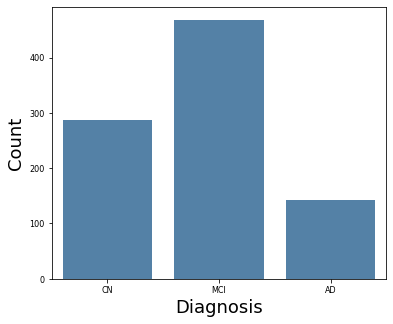

In [32]:
#Diagnosis bar plot
df_ADNIMERGE = pd.merge(df,ADNIMERGE,on='RID')

df_ADNIMERGE_groupped = df_ADNIMERGE.copy()
df_ADNIMERGE_groupped['DX_bl'] = df_ADNIMERGE['DX_bl'].replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

#calculate sum of values by group
df_dx = df_ADNIMERGE_groupped.groupby(['DX_bl']).agg(Count=("RID", 'count'))
df_dx = df_dx.reset_index()

#print barplot
fig = plt.figure(figsize=(6,5))

sns.barplot(x="DX_bl",
           y="Count",
           data=df_dx,
           color='steelblue',
           order=["CN","MCI","AD"])

plt.xlabel("Diagnosis")
plt.ylabel("Count")

plt.show()

In [33]:
import warnings
warnings.filterwarnings('ignore')

#Count number of instances in each group
df_CN = pd.merge(df,df_ADNIMERGE_groupped[df_ADNIMERGE_groupped["DX_bl"]=='CN'],on='RID')
df_MCI = pd.merge(df,df_ADNIMERGE_groupped[df_ADNIMERGE_groupped["DX_bl"]=='MCI'],on='RID')
df_AD = pd.merge(df,df_ADNIMERGE_groupped[df_ADNIMERGE_groupped["DX_bl"]=='AD'],on='RID')

print("Number of controls: ", df_CN.shape[0])
print("Number of MCI subjects: ", df_MCI.shape[0])
print("Number of AD subjects: ", df_AD.shape[0])

Number of controls:  288
Number of MCI subjects:  468
Number of AD subjects:  142


#### Age distribution

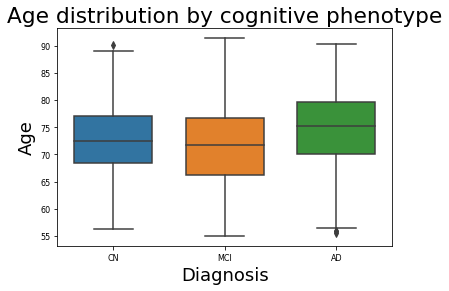

In [34]:
#Age Distribution 

sns.boxplot(x=df_ADNIMERGE_groupped["DX_bl"], y=df_ADNIMERGE["AGE"], width=0.7,
           order=["CN","MCI","AD"])
plt.title("Age distribution by cognitive phenotype")
plt.xlabel("Diagnosis")
plt.ylabel("Age")
plt.show()

#### Kruskal-Wallis test

In [35]:
#Kruskal-Wallis test
KW_age = stats.kruskal(df_CN['AGE'].values.tolist(), df_MCI['AGE'].values.tolist(), df_AD['AGE'].values.tolist())
KW_age

KruskalResult(statistic=18.92772829201439, pvalue=7.760612946005333e-05)

#### Mann-Whitney tests

In [36]:
#Mann-Whitney tests
print("Controls-MCI: ", stats.mannwhitneyu(df_CN['AGE'].values.tolist(),df_MCI['AGE'].values.tolist()))
print("Controls-AD: ", stats.mannwhitneyu(df_CN['AGE'].values.tolist(),df_AD['AGE'].values.tolist()))

Controls-MCI:  MannwhitneyuResult(statistic=74409.5, pvalue=0.016107078598488866)
Controls-AD:  MannwhitneyuResult(statistic=17240.0, pvalue=0.008130636399248574)


These results indicate that the MCI group does not have the same age distribution than the controls. Thus, it does not supports a normalization based on age. 

#### Shapiro-Wilk test for normality

In [37]:
#Shapiro-Wilk test for normality
print("Controls: ", stats.shapiro(df_CN['AGE'].values.tolist()))
print("MCI: ", stats.shapiro(df_MCI['AGE'].values.tolist()))
print("AD: ", stats.shapiro(df_AD['AGE'].values.tolist()))

Controls:  ShapiroResult(statistic=0.9843282699584961, pvalue=0.003074418054893613)
MCI:  ShapiroResult(statistic=0.9916391968727112, pvalue=0.009754721075296402)
AD:  ShapiroResult(statistic=0.9782914519309998, pvalue=0.02337193489074707)


The controls are the only group that have a normal distribution for the age. 

#### Sex distribution

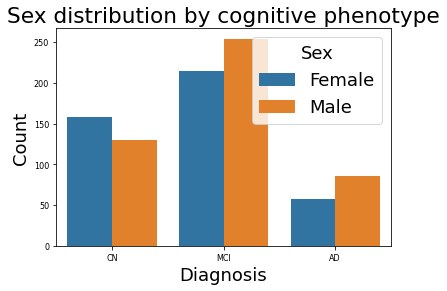

In [38]:
#Sex distribution

#calculate sum of values by group
df_sex = df_ADNIMERGE_groupped.groupby(['DX_bl', 'PTGENDER']).agg(Count=("RID", 'count'))
df_sex = df_sex.reset_index()

#print barplot
sns.barplot(x="DX_bl",
           y="Count",
           hue="PTGENDER",
           data=df_sex,
           order=["CN","MCI","AD"])

plt.title("Sex distribution by cognitive phenotype")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.legend(title='Sex')

plt.show()

#### Ethnicity distribution

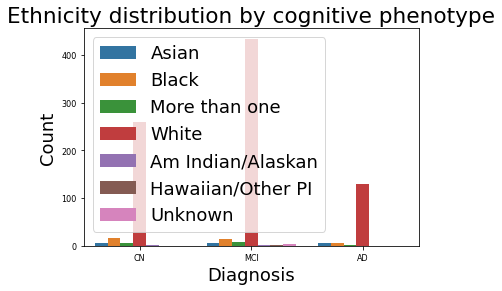

In [39]:
#Ethnic distribution

#calculate sum of values by group
df_eth = df_ADNIMERGE_groupped.groupby(['DX_bl', 'PTRACCAT']).agg(Count=("RID", 'count'))
df_eth = df_eth.reset_index()

#print barplot
sns.barplot(x="DX_bl",
           y="Count",
           hue="PTRACCAT",
           data=df_eth,
           order=["CN","MCI","AD"])

plt.title("Ethnicity distribution by cognitive phenotype")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.legend(title='Ethnic group')
plt.legend(loc='upper left')

plt.show()

#### Years of education distribution

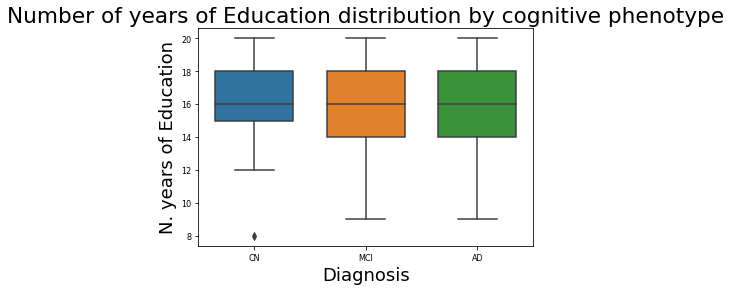

In [40]:
#Age Distribution 

sns.boxplot(x=df_ADNIMERGE_groupped["DX_bl"], y=df_ADNIMERGE_groupped["PTEDUCAT"], width=0.7,
           order=["CN","MCI","AD"])

plt.title("Number of years of Education distribution by cognitive phenotype")
plt.xlabel("Diagnosis")
plt.ylabel("N. years of Education")
plt.show()

#### Kruskal-Wallis test

In [41]:
#Kruskal-Wallis test
KW_ed = stats.kruskal(df_CN['PTEDUCAT'].values.tolist(), df_MCI['PTEDUCAT'].values.tolist(), df_AD['PTEDUCAT'].values.tolist())
KW_ed

KruskalResult(statistic=9.896557267476583, pvalue=0.007095612570655553)

#### Mann-Whitney tests

In [42]:
#Mann-Whitney tests
print("Controls-MCI: ", stats.mannwhitneyu(df_CN['PTEDUCAT'].values.tolist(),df_MCI['PTEDUCAT'].values.tolist()))
print("Controls-AD: ", stats.mannwhitneyu(df_CN['PTEDUCAT'].values.tolist(),df_AD['PTEDUCAT'].values.tolist()))

Controls-MCI:  MannwhitneyuResult(statistic=73997.5, pvalue=0.021741205962535988)
Controls-AD:  MannwhitneyuResult(statistic=23998.0, pvalue=0.0029532980234029554)


These results indicate that the MCI group does not have the same age distribution than the controls.

#### Shapiro-Wilk test for normality

In [43]:
#Shapiro-Wilk test for normality
print("Controls: ", stats.shapiro(df_CN['PTEDUCAT'].values.tolist()))
print("MCI: ", stats.shapiro(df_MCI['PTEDUCAT'].values.tolist()))
print("AD: ", stats.shapiro(df_AD['PTEDUCAT'].values.tolist()))

Controls:  ShapiroResult(statistic=0.9217047095298767, pvalue=3.799967285278427e-11)
MCI:  ShapiroResult(statistic=0.9340997338294983, pvalue=1.6230387259869028e-13)
AD:  ShapiroResult(statistic=0.9455486536026001, pvalue=2.3768745450070128e-05)


The education level does not follow a normal distribution. 

## 4. DATA PREPROCESSING

In [44]:
from sklearn.preprocessing import StandardScaler

#### Plot z-scores by cognitive domain

1. Compute averages of each test
2. Group by NC domain
3. Compute the average of each domain

In [45]:
def zscores_means(X, dx, metadata_path):
    """Function to generate a table with the means by domain and diagnostic group.
    It takes a list with the zscore df variable names for each diagnostic group"""
    #Compute the test means
    means_df = X.mean(axis=0).to_frame()
    means_df.columns = ["Mean"]
    means_df['ADNI column'] = means_df.index

    #Import the test-cognitive domain relations    
    metadata = pd.read_csv(metadata_path, sep=";", 
                            usecols = ['ADNI column', 'Cognitive Domain'])

    means_df = means_df.join(metadata.set_index('ADNI column'))[['Cognitive Domain', 'Mean']]

    #Compute NC domain means
    means_df = means_df.groupby(['Cognitive Domain'])['Mean'].mean().to_frame()
    means_df.reset_index(inplace=True)

    #Add diagnostic group
    means_df["Diagnostic"] = dx
    
    return(means_df)

### 4.1. ADAS-Cog

In [46]:
#get test results for the controls
ADAS_CN = ADAS[ADAS.RID.isin(ADNIMERGE[ADNIMERGE["DX_bl"]=='CN'].RID)]
print("Number of controls: ", ADAS_CN.shape[0])

Number of controls:  311


#### Control data

In [47]:
#filter table to show only tests results
ADAS_CN = ADAS_CN[ADAS_columns]
ADAS_CN.head()

Q1SCORE  Q2SCORE  Q3SCORE  Q4SCORE  Q5SCORE  Q6SCORE  Q7SCORE  Q8SCORE  \
484      2.0      0.0      1.0      2.0      0.0      0.0      0.0      3.0   
489      4.0      0.0      0.0      3.0      0.0      0.0      0.0      2.0   
494      1.0      0.0      0.0      2.0      0.0      0.0      0.0      1.0   
507      2.0      0.0      0.0      1.0      0.0      0.0      1.0      0.0   
508      5.0      0.0      0.0      6.0      0.0      0.0      0.0      4.0   

     Q9SCORE  Q10SCORE  Q11SCORE  Q12SCORE  Q13SCORE  
484      0.0       0.0       0.0       0.0       0.0  
489      0.0       0.0       0.0       0.0       1.0  
494      0.0       0.0       0.0       0.0       0.0  
507      0.0       0.0       0.0       0.0       1.0  
508      0.0       0.0       0.0       0.0       1.0

In [48]:
#Control statistics
ADAS_CN.describe()

Q1SCORE     Q2SCORE     Q3SCORE     Q4SCORE     Q5SCORE     Q6SCORE  \
count  311.000000  311.000000  311.000000  311.000000  311.000000  311.000000   
mean     2.842347    0.067524    0.398714    2.681672    0.054662    0.070740   
std      1.308845    0.357329    0.552296    1.846955    0.227686    0.280804   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    0.000000    1.000000    0.000000    0.000000   
50%      3.000000    0.000000    0.000000    2.000000    0.000000    0.000000   
75%      4.000000    0.000000    1.000000    4.000000    0.000000    0.000000   
max      6.670000    5.000000    2.000000   10.000000    1.000000    2.000000   

          Q7SCORE     Q8SCORE     Q9SCORE    Q10SCORE    Q11SCORE    Q12SCORE  \
count  311.000000  311.000000  311.000000  311.000000  311.000000  311.000000   
mean     0.096463    1.926045    0.016077    0.012862    0.045016    0.019293   
std      0.326793    1.888248    0.149403    0.112860    0.236710    0.159477   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    3.000000    0.000000    0.000000    0.000000    0.000000   
max      3.000000   12.000000    2.000000    1.000000    2.000000    2.000000   

         Q13SCORE  
count  311.000000  
mean     0.389068  
std      0.686090  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      5.000000

#### Fit the scaler with the controls data

In [49]:
scaler = StandardScaler()
scaler.fit(ADAS_CN)

StandardScaler()

#### Transform data

In [50]:
ADAS_DX = pd.merge(ADAS,ADNIMERGE,on='RID')

X_ADAS = ADAS_DX[ADAS_columns] #tests scores
Y_ADAS = pd.DataFrame(ADAS_DX["DX_bl"]) #diagnosis

#scale data
X_ADAS = scaler.transform(X_ADAS)

#Convert into pandas dataframe
X_ADAS = pd.DataFrame(X_ADAS,columns=ADAS_columns)
X_ADAS.head()

Q1SCORE   Q2SCORE   Q3SCORE   Q4SCORE   Q5SCORE   Q6SCORE   Q7SCORE  \
0 -1.409881 -0.189274 -0.723084 -0.369674 -0.240464 -0.252324 -0.295656   
1  0.120646 -0.189274  1.090458 -0.369674 -0.240464 -0.252324 -0.295656   
2 -0.644618 -0.189274 -0.723084  0.172631 -0.240464 -0.252324 -0.295656   
3  0.120646 -0.189274  1.090458 -0.369674 -0.240464 -0.252324 -0.295656   
4  0.885910 -0.189274  1.090458 -0.369674 -0.240464 -0.252324 -0.295656   

    Q8SCORE   Q9SCORE  Q10SCORE  Q11SCORE  Q12SCORE  Q13SCORE  
0 -0.491216 -0.107783 -0.114146 -0.190481 -0.121169 -0.567994  
1  0.569674 -0.107783 -0.114146 -0.190481 -0.121169 -0.567994  
2 -0.491216 -0.107783 -0.114146 -0.190481 -0.121169 -0.567994  
3 -1.021661 -0.107783 -0.114146 -0.190481 -0.121169  0.891891  
4  0.569674 -0.107783 -0.114146 -0.190481 -0.121169  0.891891

#### Divide data by diagnostic group

In [51]:
#Get indexes of subjects belonging to each group
ADAS_indexes = {} #Create empty dictionary
dx_groups = ["CN","MCI", "AD"] #diagnostic groups list

Y_ADAS = Y_ADAS.replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

for dx in dx_groups:
    ADAS_indexes[dx] = Y_ADAS.index[Y_ADAS['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_ADAS_CN = X_ADAS.iloc[ADAS_indexes["CN"]]
X_ADAS_MCI = X_ADAS.iloc[ADAS_indexes["MCI"]]
X_ADAS_AD = X_ADAS.iloc[ADAS_indexes["AD"]]

print("Number of instances CN: ", X_ADAS_CN.shape[0])
print("Number of instances MCI: ", X_ADAS_MCI.shape[0])
print("Number of instances AD: ", X_ADAS_AD.shape[0])

Number of instances CN:  659
Number of instances MCI:  699
Number of instances AD:  219


#### Plot z-scores by domain

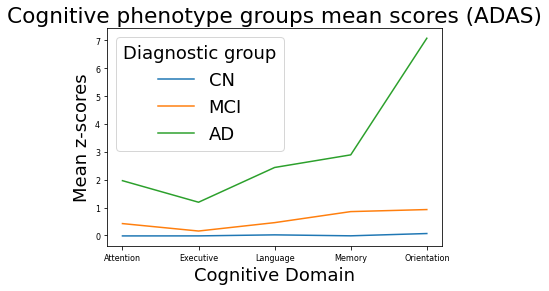

In [52]:
metadata_path = "./Tests/ADAS_Metadata.csv"
#Compute zscores means for each cognitive domain by diagnostic group
ADAS_means_CN = zscores_means(X_ADAS_CN, "CN", metadata_path)
ADAS_means_MCI = zscores_means(X_ADAS_MCI, "MCI", metadata_path)
ADAS_means_AD = zscores_means(X_ADAS_AD, "AD", metadata_path)

#Concanetate all dataframes
ADAS_means_df = pd.concat([ADAS_means_CN, ADAS_means_MCI, ADAS_means_AD])
ADAS_means_df.index = range(len(ADAS_means_df))

#plot dataframe
sns.lineplot(data=ADAS_means_df, x='Cognitive Domain', y='Mean', hue='Diagnostic')
plt.title("Cognitive phenotype groups mean scores (ADAS)")
plt.ylabel("Mean z-scores")
plt.legend(title="Diagnostic group")
plt.show()

### 4.2. MMSE

In [53]:
#get test results for the controls
MMSE_CN = MMSE[MMSE.RID.isin(ADNIMERGE[ADNIMERGE["DX_bl"]=='CN'].RID)]
print("Number of controls: ", MMSE_CN.shape[0])

Number of controls:  417


In [54]:
#filter table to show only tests results
MMSE_CN = MMSE_CN[MMSE_columns]
MMSE_CN.head()

MMDATE  MMYEAR  MMMONTH  MMDAY  MMSEASON  MMHOSPIT  MMFLOOR  MMCITY  \
0      1.0     1.0      1.0    1.0       1.0       1.0      1.0     1.0   
4      1.0     1.0      1.0    1.0       1.0       1.0      1.0     1.0   
7      1.0     1.0      1.0    1.0       1.0       1.0      1.0     1.0   
10     1.0     1.0      1.0    1.0       1.0       1.0      1.0     1.0   
11     1.0     1.0      1.0    1.0       2.0       1.0      1.0     1.0   

    MMAREA  MMSTATE  MMBALL  MMFLAG  MMTREE  MMD  MML  MMR  MMO  MMW  \
0      1.0      1.0     1.0     1.0     1.0  1.0  1.0  1.0  1.0  1.0   
4      1.0      1.0     1.0     1.0     1.0  1.0  1.0  1.0  1.0  1.0   
7      1.0      1.0     1.0     1.0     1.0  1.0  1.0  1.0  1.0  1.0   
10     1.0      1.0     1.0     1.0     1.0  1.0  1.0  1.0  1.0  1.0   
11     1.0      1.0     1.0     1.0     1.0  1.0  1.0  1.0  1.0  1.0   

    MMBALLDL  MMFLAGDL  MMTREEDL  MMWATCH  MMPENCIL  MMREPEAT  MMHAND  MMFOLD  \
0        2.0       1.0       2.0      1.0       1.0       1.0     1.0     1.0   
4        1.0       1.0       1.0      1.0       1.0       1.0     2.0     1.0   
7        2.0       1.0       2.0      1.0       1.0       1.0     1.0     1.0   
10       1.0       2.0       1.0      1.0       1.0       1.0     1.0     1.0   
11       1.0       1.0       2.0      1.0       1.0       1.0     1.0     1.0   

    MMONFLR  MMREAD  MMWRITE  MMDRAW  
0       1.0     1.0      1.0     1.0  
4       1.0     1.0      1.0     1.0  
7       1.0     1.0      1.0     1.0  
10      1.0     1.0      1.0     1.0  
11      1.0     1.0      1.0     1.0

In [55]:
#Control summary statistics
MMSE_CN.describe()

MMDATE  MMYEAR  MMMONTH       MMDAY    MMSEASON    MMHOSPIT  \
count  417.000000   417.0    417.0  417.000000  417.000000  417.000000   
mean     1.033573     1.0      1.0    1.002398    1.067146    1.016787   
std      0.180344     0.0      0.0    0.048970    0.250576    0.128625   
min      1.000000     1.0      1.0    1.000000    1.000000    1.000000   
25%      1.000000     1.0      1.0    1.000000    1.000000    1.000000   
50%      1.000000     1.0      1.0    1.000000    1.000000    1.000000   
75%      1.000000     1.0      1.0    1.000000    1.000000    1.000000   
max      2.000000     1.0      1.0    2.000000    2.000000    2.000000   

          MMFLOOR      MMCITY      MMAREA  MMSTATE  MMBALL      MMFLAG  \
count  417.000000  417.000000  417.000000    417.0   417.0  417.000000   
mean     1.038369    1.016787    1.052758      1.0     1.0    1.002398   
std      0.192317    0.128625    0.223818      0.0     0.0    0.048970   
min      1.000000    1.000000    1.000000      1.0     1.0    1.000000   
25%      1.000000    1.000000    1.000000      1.0     1.0    1.000000   
50%      1.000000    1.000000    1.000000      1.0     1.0    1.000000   
75%      1.000000    1.000000    1.000000      1.0     1.0    1.000000   
max      2.000000    2.000000    2.000000      1.0     1.0    2.000000   

           MMTREE         MMD         MML         MMR         MMO         MMW  \
count  417.000000  417.000000  417.000000  417.000000  417.000000  417.000000   
mean     1.002398    1.002398    1.019185    1.071942    1.064748    1.009592   
std      0.048970    0.048970    0.137338    0.258703    0.246377    0.097587   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
50%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      2.000000    2.000000    2.000000    2.000000    2.000000    2.000000   

         MMBALLDL    MMFLAGDL    MMTREEDL  MMWATCH    MMPENCIL    MMREPEAT  \
count  417.000000  417.000000  417.000000    417.0  417.000000  417.000000   
mean     1.028777    1.127098    1.124700      1.0    1.002398    1.091127   
std      0.167380    0.333483    0.330776      0.0    0.048970    0.288135   
min      1.000000    1.000000    1.000000      1.0    1.000000    1.000000   
25%      1.000000    1.000000    1.000000      1.0    1.000000    1.000000   
50%      1.000000    1.000000    1.000000      1.0    1.000000    1.000000   
75%      1.000000    1.000000    1.000000      1.0    1.000000    1.000000   
max      2.000000    2.000000    2.000000      1.0    2.000000    2.000000   

           MMHAND      MMFOLD     MMONFLR  MMREAD     MMWRITE      MMDRAW  
count  417.000000  417.000000  417.000000   417.0  417.000000  417.000000  
mean     1.064748    1.002398    1.007194     1.0    1.007194    1.071942  
std      0.246377    0.048970    0.084615     0.0    0.084615    0.258703  
min      1.000000    1.000000    1.000000     1.0    1.000000    1.000000  
25%      1.000000    1.000000    1.000000     1.0    1.000000    1.000000  
50%      1.000000    1.000000    1.000000     1.0    1.000000    1.000000  
75%      1.000000    1.000000    1.000000     1.0    1.000000    1.000000  
max      2.000000    2.000000    2.000000     1.0    2.000000    2.000000

#### Fit the scaler with the controls data

In [56]:
scaler = StandardScaler()

scaler.fit(MMSE_CN)

StandardScaler()

#### Transform data

In [57]:
MMSE_DX = pd.merge(MMSE,ADNIMERGE,on='RID')

X_MMSE = MMSE_DX[MMSE_columns] #tests scores
Y_MMSE = pd.DataFrame(MMSE_DX["DX_bl"]) #diagnosis

#scale data
X_MMSE = scaler.transform(X_MMSE)


#Convert into pandas dataframe
X_MMSE = pd.DataFrame(X_MMSE,columns=MMSE_columns)
X_MMSE.head()

MMDATE  MMYEAR  MMMONTH      MMDAY  MMSEASON  MMHOSPIT   MMFLOOR  \
0 -0.186385     0.0      0.0  -0.049029 -0.268290 -0.130664 -0.199750   
1  5.365232     0.0      1.0  20.396078  3.727312 -0.130664  5.006246   
2 -0.186385     0.0      0.0  -0.049029 -0.268290 -0.130664 -0.199750   
3 -0.186385     0.0      0.0  -0.049029 -0.268290 -0.130664 -0.199750   
4  5.365232     1.0      0.0  -0.049029 -0.268290  7.653197 -0.199750   

     MMCITY  MMAREA  MMSTATE  MMBALL    MMFLAG    MMTREE       MMD       MML  \
0 -0.130664  -0.236      0.0     0.0 -0.049029 -0.049029 -0.049029 -0.139857   
1 -0.130664  -0.236      0.0     0.0 -0.049029 -0.049029 -0.049029 -0.139857   
2 -0.130664  -0.236      0.0     0.0 -0.049029 -0.049029 -0.049029 -0.139857   
3 -0.130664  -0.236      0.0     0.0 -0.049029 -0.049029 -0.049029 -0.139857   
4 -0.130664  -0.236      0.0     0.0 -0.049029 -0.049029 -0.049029  7.150175   

        MMR       MMO        MMW  MMBALLDL  MMFLAGDL  MMTREEDL  MMWATCH  \
0 -0.278423 -0.263117  -0.098414  5.809475 -0.381581  2.649383      0.0   
1 -0.278423  3.800585  10.161201  5.809475  2.620673  2.649383      0.0   
2 -0.278423 -0.263117  -0.098414 -0.172133  2.620673  2.649383      0.0   
3 -0.278423 -0.263117  -0.098414 -0.172133 -0.381581 -0.377446      0.0   
4  3.591657  3.800585  -0.098414  5.809475  2.620673  2.649383      0.0   

   MMPENCIL  MMREPEAT    MMHAND    MMFOLD   MMONFLR  MMREAD   MMWRITE  \
0 -0.049029 -0.316645 -0.263117 -0.049029 -0.085126     0.0 -0.085126   
1 -0.049029 -0.316645 -0.263117 -0.049029 -0.085126     0.0 -0.085126   
2 -0.049029 -0.316645 -0.263117 -0.049029 -0.085126     0.0 -0.085126   
3 -0.049029 -0.316645  3.800585 -0.049029 -0.085126     0.0 -0.085126   
4 -0.049029 -0.316645 -0.263117 -0.049029 -0.085126     0.0 -0.085126   

     MMDRAW  
0 -0.278423  
1 -0.278423  
2  3.591657  
3 -0.278423  
4  3.591657

#### Divide data by diagnostic group

In [58]:
#Get indexes of subjects belonging to each group
MMSE_indexes = {} #Create empty dictionary
dx_groups = ["CN","MCI", "AD"] #diagnostic groups list

Y_MMSE = Y_MMSE.replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

for dx in dx_groups:
    MMSE_indexes[dx] = Y_MMSE.index[Y_MMSE['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_MMSE_CN = X_MMSE.iloc[MMSE_indexes["CN"]]
X_MMSE_MCI = X_MMSE.iloc[MMSE_indexes["MCI"]]
X_MMSE_AD = X_MMSE.iloc[MMSE_indexes["AD"]]

print("Number of instances CN: ", X_MMSE_CN.shape[0])
print("Number of instances MCI: ", X_MMSE_MCI.shape[0])
print("Number of instances AD: ", X_MMSE_AD.shape[0])

Number of instances CN:  523
Number of instances MCI:  878
Number of instances AD:  339


#### Plot z-scores by domain

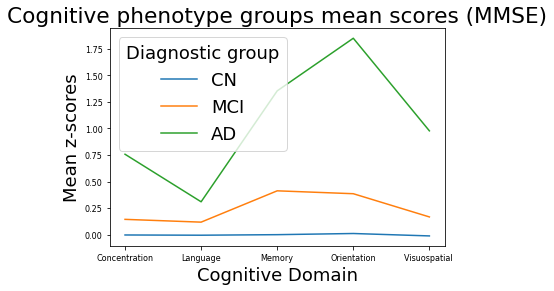

In [59]:
metadata_path = "./Tests/MMSE_Metadata.csv"
#Compute zscores means for each cognitive domain by diagnostic group
MMSE_means_CN = zscores_means(X_MMSE_CN, "CN", metadata_path)
MMSE_means_MCI = zscores_means(X_MMSE_MCI, "MCI", metadata_path)
MMSE_means_AD = zscores_means(X_MMSE_AD, "AD", metadata_path)

#Concanetate all dataframes
MMSE_means_df = pd.concat([MMSE_means_CN, MMSE_means_MCI, MMSE_means_AD])
MMSE_means_df.index = range(len(MMSE_means_df))

#plot dataframe
sns.lineplot(data=MMSE_means_df, x='Cognitive Domain', y='Mean', hue='Diagnostic')
plt.title("Cognitive phenotype groups mean scores (MMSE)")
plt.ylabel("Mean z-scores")
plt.legend(title="Diagnostic group")
plt.show()

### 4.3. MOCA

In [60]:
#get test results for the controls
MOCA_CN = MOCA[MOCA.RID.isin(ADNIMERGE[ADNIMERGE["DX_bl"]=='CN'].RID)]
print("Number of controls: ", MOCA_CN.shape[0])

Number of controls:  306


In [61]:
#filter table to show only tests results
MOCA_CN = MOCA_CN[MOCA_columns]
MOCA_CN.head()

TRAILS  CUBE  CLOCKCON  CLOCKNO  CLOCKHAN  LION  RHINO  CAMEL  IMMT1W1  \
484     1.0   0.0       1.0      0.0       1.0   1.0    0.0    1.0      1.0   
489     1.0   1.0       1.0      1.0       1.0   1.0    1.0    1.0      1.0   
494     1.0   1.0       1.0      1.0       1.0   1.0    1.0    1.0      1.0   
507     1.0   1.0       1.0      1.0       1.0   1.0    1.0    1.0      1.0   
508     1.0   1.0       1.0      1.0       1.0   1.0    1.0    1.0      0.0   

     IMMT1W2  IMMT1W3  IMMT1W4  IMMT1W5  IMMT2W1  IMMT2W2  IMMT2W3  IMMT2W4  \
484      1.0      0.0      1.0      1.0      1.0      1.0      1.0      1.0   
489      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
494      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
507      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
508      1.0      1.0      1.0      1.0      0.0      1.0      1.0      1.0   

     IMMT2W5  DIGFOR  DIGBACK  LETTERS  SERIAL1  SERIAL2  SERIAL3  SERIAL4  \
484      1.0     1.0      1.0      0.0      1.0      1.0      0.0      0.0   
489      1.0     1.0      0.0      0.0      1.0      1.0      1.0      1.0   
494      1.0     1.0      1.0      0.0      1.0      1.0      1.0      1.0   
507      1.0     1.0      1.0      0.0      1.0      1.0      1.0      1.0   
508      1.0     0.0      1.0      0.0      1.0      1.0      1.0      1.0   

     SERIAL5  REPEAT1  REPEAT2  FFLUENCY  ABSTRAN  ABSMEAS  DELW1  DELW2  \
484      0.0      1.0      1.0      17.0      1.0      0.0    1.0    1.0   
489      1.0      1.0      1.0      15.0      1.0      1.0    3.0    2.0   
494      1.0      1.0      1.0      22.0      1.0      1.0    1.0    3.0   
507      1.0      1.0      0.0      20.0      1.0      1.0    1.0    1.0   
508      1.0      1.0      1.0      13.0      1.0      1.0    3.0    3.0   

     DELW3  DELW4  DELW5  DATE  MONTH  YEAR  DAY  PLACE  CITY  
484    1.0    1.0    1.0   1.0    1.0   1.0  1.0    1.0   1.0  
489    3.0    3.0    3.0   1.0    1.0   1.0  1.0    1.0   1.0  
494    3.0    2.0    2.0   1.0    1.0   1.0  1.0    1.0   1.0  
507    1.0    1.0    1.0   1.0    1.0   1.0  1.0    1.0   1.0  
508    3.0    3.0    3.0   1.0    1.0   1.0  1.0    1.0   1.0

In [62]:
#Control summary statistics
MOCA_CN.describe()

TRAILS        CUBE    CLOCKCON     CLOCKNO    CLOCKHAN        LION  \
count  306.000000  306.000000  306.000000  306.000000  306.000000  306.000000   
mean     0.921569    0.705882    0.993464    0.924837    0.826797    0.996732   
std      0.269290    0.456391    0.080713    0.264087    0.379042    0.057166   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    0.000000    1.000000    1.000000    1.000000    1.000000   
50%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

            RHINO       CAMEL     IMMT1W1     IMMT1W2     IMMT1W3     IMMT1W4  \
count  306.000000  306.000000  306.000000  306.000000  306.000000  306.000000   
mean     0.918301    0.996732    0.937908    0.960784    0.931373    0.911765   
std      0.274355    0.057166    0.241717    0.194426    0.253234    0.284101   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
50%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

          IMMT1W5     IMMT2W1     IMMT2W2     IMMT2W3     IMMT2W4     IMMT2W5  \
count  306.000000  306.000000  306.000000  306.000000  306.000000  306.000000   
mean     0.977124    0.960784    0.983660    0.986928    0.977124    0.990196   
std      0.149752    0.194426    0.126987    0.113769    0.149752    0.098690   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
50%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           DIGFOR     DIGBACK     LETTERS     SERIAL1     SERIAL2     SERIAL3  \
count  306.000000  306.000000  306.000000  306.000000  306.000000  306.000000   
mean     0.960784    0.934641    0.209150    0.993464    0.905229    0.901961   
std      0.194426    0.247564    0.568617    0.080713    0.293378    0.297855   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    1.000000    0.000000    1.000000    1.000000    1.000000   
50%      1.000000    1.000000    0.000000    1.000000    1.000000    1.000000   
75%      1.000000    1.000000    0.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    5.000000    1.000000    1.000000    1.000000   

          SERIAL4     SERIAL5     REPEAT1     REPEAT2    FFLUENCY     ABSTRAN  \
count  306.000000  306.000000  306.000000  306.000000  306.000000  306.000000   
mean     0.901961    0.892157    0.944444    0.800654   14.725490    0.947712   
std      0.297855    0.310690    0.229437    0.400163    4.786916    0.222971   
min      0.000000    0.000000    0.000000    0.000000    1.000000    0.000000   
25%      1.000000    1.000000    1.000000    1.000000   11.250000    1.000000   
50%      1.000000    1.000000    1.000000    1.000000   15.000000    1.000000   
75%      1.000000    1.000000    1.000000    1.000000   18.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000   28.000000    1.000000   

          ABSMEAS       DELW1       DELW2       DELW3       DELW4       DELW5  \
count  306.000000  306.000000  306.000000  306.000000  306.000000  306.000000   
mean     0.898693    1.411765    1.457516    1.591503    1.552288    1.437908   
std      0.302229    0.988653    0.797430    1.001536    0.901117    0.731762   
min      0.000000    0.000000    0.00

#### Fit the scaler with the controls data

In [63]:
scaler = StandardScaler()

scaler.fit(MOCA_CN)

StandardScaler()

#### Transform data

In [64]:
MOCA_DX = pd.merge(MOCA,ADNIMERGE,on='RID')

X_MOCA = MOCA_DX[MOCA_columns] #tests scores
Y_MOCA = pd.DataFrame(MOCA_DX["DX_bl"]) #diagnosis

#scale data
X_MOCA = scaler.transform(X_MOCA)

#Convert into pandas dataframe
X_MOCA = pd.DataFrame(X_MOCA,columns=MOCA_columns)
X_MOCA.head()

TRAILS      CUBE  CLOCKCON   CLOCKNO  CLOCKHAN     LION     RHINO  \
0  0.29173  0.645497  0.081111  0.285083  0.457697  0.05726  0.298275   
1  0.29173 -1.549193  0.081111  0.285083  0.457697  0.05726  0.298275   
2  0.29173 -1.549193  0.081111  0.285083  0.457697  0.05726  0.298275   
3  0.29173  0.645497  0.081111  0.285083  0.457697  0.05726  0.298275   
4  0.29173 -1.549193  0.081111  0.285083  0.457697  0.05726  0.298275   

     CAMEL   IMMT1W1   IMMT1W2   IMMT1W3   IMMT1W4   IMMT1W5   IMMT2W1  \
0  0.05726  0.257298  0.202031  0.271448  0.311086  0.153008  0.202031   
1  0.05726  0.257298  0.202031  0.271448  0.311086  0.153008  0.202031   
2  0.05726  0.257298  0.202031  0.271448  0.311086  0.153008  0.202031   
3  0.05726  0.257298  0.202031  0.271448  0.311086  0.153008  0.202031   
4  0.05726  0.257298  0.202031  0.271448  0.311086  0.153008  0.202031   

    IMMT2W2   IMMT2W3   IMMT2W4   IMMT2W5    DIGFOR   DIGBACK   LETTERS  \
0  0.128885  0.115087  0.153008  0.099504  0.202031  0.264443  1.393107   
1  0.128885  0.115087  0.153008  0.099504  0.202031  0.264443  1.393107   
2  0.128885  0.115087  0.153008  0.099504  0.202031  0.264443 -0.368425   
3  0.128885  0.115087  0.153008  0.099504  0.202031  0.264443 -0.368425   
4  0.128885  0.115087  0.153008  0.099504  0.202031  0.264443 -0.368425   

    SERIAL1   SERIAL2  SERIAL3  SERIAL4   SERIAL5   REPEAT1   REPEAT2  \
0  0.081111  0.323563  0.32969  0.32969  0.347677  0.242536  0.498979   
1  0.081111  0.323563  0.32969  0.32969  0.347677  0.242536  0.498979   
2  0.081111  0.323563  0.32969  0.32969  0.347677  0.242536  0.498979   
3  0.081111  0.323563  0.32969  0.32969  0.347677  0.242536  0.498979   
4  0.081111 -3.090586 -3.03315 -3.03315 -2.876235  0.242536  0.498979   

   FFLUENCY   ABSTRAN   ABSMEAS     DELW1     DELW2     DELW3     DELW4  \
0  3.196114  0.234888  0.335749  0.595961 -0.574679  0.408538 -0.613896   
1  1.103665 -4.257347  0.335749 -1.430307  0.681405 -1.591665  1.609208   
2  0.685175  0.234888  0.335749 -0.417173 -0.574679 -1.591665 -1.725448   
3  1.522155  0.234888  0.335749  1.609095  1.937488  0.408538  0.497656   
4 -0.151805  0.234888  0.335749  0.595961 -0.574679 -1.591665  0.497656   

      DELW5      DATE     MONTH     YEAR  DAY    PLACE      CITY  
0 -0.599410  0.193101  0.081111  0.05726  0.0  0.05726  0.099504  
1 -1.968212  0.193101  0.081111  0.05726  0.0  0.05726  0.099504  
2 -0.599410  0.193101  0.081111  0.05726  0.0  0.05726  0.099504  
3  0.769392  0.193101  0.081111  0.05726  0.0  0.05726  0.099504  
4 -0.599410  0.193101  0.081111  0.05726  0.0  0.05726  0.099504

#### Plot z-scores by domain

#### Divide data by diagnostic group

In [65]:
#Get indexes of subjects belonging to each group
MOCA_indexes = {} #Create empty dictionary
dx_groups = ["CN","MCI", "AD"] #diagnostic groups list

Y_MOCA = Y_MOCA.replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

for dx in dx_groups:
    MOCA_indexes[dx] = Y_MOCA.index[Y_MOCA['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_MOCA_CN = X_MOCA.iloc[MOCA_indexes["CN"]]
X_MOCA_MCI = X_MOCA.iloc[MOCA_indexes["MCI"]]
X_MOCA_AD = X_MOCA.iloc[MOCA_indexes["AD"]]

print("Number of instances CN: ", X_MOCA_CN.shape[0])
print("Number of instances MCI: ", X_MOCA_MCI.shape[0])
print("Number of instances AD: ", X_MOCA_AD.shape[0])

Number of instances CN:  645
Number of instances MCI:  684
Number of instances AD:  212


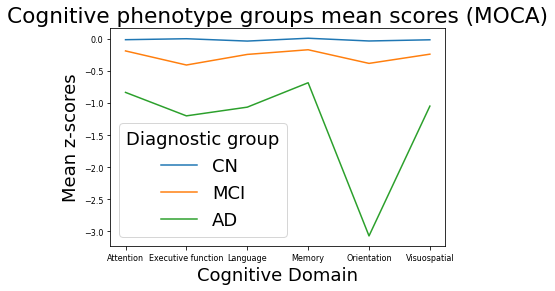

In [66]:
metadata_path = "./Tests/MOCA_Metadata.csv"
#Compute zscores means for each cognitive domain by diagnostic group
MOCA_means_CN = zscores_means(X_MOCA_CN, "CN", metadata_path)
MOCA_means_MCI = zscores_means(X_MOCA_MCI, "MCI", metadata_path)
MOCA_means_AD = zscores_means(X_MOCA_AD, "AD", metadata_path)

#Concanetate all dataframes
MOCA_means_df = pd.concat([MOCA_means_CN, MOCA_means_MCI, MOCA_means_AD])
MOCA_means_df.index = range(len(MOCA_means_df))

#plot dataframe
sns.lineplot(data=MOCA_means_df, x='Cognitive Domain', y='Mean', hue='Diagnostic')
plt.title("Cognitive phenotype groups mean scores (MOCA)")
plt.ylabel("Mean z-scores")
plt.legend(title="Diagnostic group")
plt.show()

### 4.4. Merged data

In [67]:
#get test results for the controls
merged_CN = df[df.RID.isin(ADNIMERGE[ADNIMERGE["DX_bl"]=='CN'].RID)]
print("Number of controls: ", merged_CN.shape[0])

Number of controls:  184


In [68]:
#filter table to show only tests results
merged_columns = ADAS_columns + MMSE_columns + MOCA_columns
merged_CN = merged_CN[merged_columns]
merged_CN.head()

Q1SCORE  Q2SCORE  Q3SCORE  Q4SCORE  Q5SCORE  Q6SCORE  Q7SCORE  Q8SCORE  \
127      2.0      0.0      1.0      2.0      0.0      0.0      0.0      3.0   
129      4.0      0.0      0.0      3.0      0.0      0.0      0.0      2.0   
131      1.0      0.0      0.0      2.0      0.0      0.0      0.0      1.0   
137      2.0      0.0      0.0      1.0      0.0      0.0      1.0      0.0   
138      5.0      0.0      0.0      6.0      0.0      0.0      0.0      4.0   

     Q9SCORE  Q10SCORE  Q11SCORE  Q12SCORE  Q13SCORE  MMDATE  MMYEAR  MMMONTH  \
127      0.0       0.0       0.0       0.0       0.0     1.0     1.0      1.0   
129      0.0       0.0       0.0       0.0       1.0     1.0     1.0      1.0   
131      0.0       0.0       0.0       0.0       0.0     1.0     1.0      1.0   
137      0.0       0.0       0.0       0.0       1.0     1.0     1.0      1.0   
138      0.0       0.0       0.0       0.0       1.0     1.0     1.0      1.0   

     MMDAY  MMSEASON  MMHOSPIT  MMFLOOR  MMCITY  MMAREA  MMSTATE  MMBALL  \
127    1.0       1.0       1.0      1.0     1.0     1.0      1.0     1.0   
129    1.0       1.0       1.0      1.0     1.0     1.0      1.0     1.0   
131    1.0       1.0       1.0      1.0     1.0     1.0      1.0     1.0   
137    1.0       1.0       1.0      1.0     1.0     1.0      1.0     1.0   
138    1.0       1.0       1.0      1.0     1.0     2.0      1.0     1.0   

     MMFLAG  MMTREE  MMD  MML  MMR  MMO  MMW  MMBALLDL  MMFLAGDL  MMTREEDL  \
127     1.0     1.0  1.0  1.0  1.0  1.0  1.0       1.0       1.0       1.0   
129     1.0     1.0  1.0  1.0  1.0  1.0  1.0       1.0       1.0       1.0   
131     1.0     1.0  1.0  1.0  1.0  1.0  1.0       1.0       1.0       2.0   
137     1.0     1.0  1.0  1.0  1.0  1.0  1.0       1.0       1.0       1.0   
138     1.0     1.0  1.0  1.0  1.0  1.0  1.0       1.0       1.0       1.0   

     MMWATCH  MMPENCIL  MMREPEAT  MMHAND  MMFOLD  MMONFLR  MMREAD  MMWRITE  \
127      1.0       1.0       1.0     2.0     1.0      1.0     1.0      1.0   
129      1.0       1.0       1.0     1.0     1.0      1.0     1.0      1.0   
131      1.0       1.0       1.0     1.0     1.0      1.0     1.0      1.0   
137      1.0       1.0       1.0     1.0     1.0      1.0     1.0      1.0   
138      1.0       1.0       1.0     1.0     1.0      1.0     1.0      1.0   

     MMDRAW  TRAILS  CUBE  CLOCKCON  CLOCKNO  CLOCKHAN  LION  RHINO  CAMEL  \
127     1.0     1.0   0.0       1.0      0.0       1.0   1.0    0.0    1.0   
129     1.0     1.0   1.0       1.0      1.0       1.0   1.0    1.0    1.0   
131     1.0     1.0   1.0       1.0      1.0       1.0   1.0    1.0    1.0   
137     1.0     1.0   1.0       1.0      1.0       1.0   1.0    1.0    1.0   
138     1.0     1.0   1.0       1.0      1.0       1.0   1.0    1.0    1.0   

     IMMT1W1  IMMT1W2  IMMT1W3  IMMT1W4  IMMT1W5  IMMT2W1  IMMT2W2  IMMT2W3  \
127      1.0      1.0      0.0      1.0      1.0      1.0      1.0      1.0   
129      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
131      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
137      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
138      0.0      1.0      1.0      1.0      1.0      0.0      1.0      1.0   

     IMMT2W4  IMMT2W5  DIGFOR  DIGBACK  LETTERS  SERIAL1  SERIAL2  SERIAL3  \
127      1.0      1.0     1.0      1.0      0.0      1.0      1.0      0.0   
129      1.0      1.0     1.0      0.0      0.0      1.0      1.0      1.0   
131      1.0      1.0     1.0      1.0      0.0      1.0      1.0      1.0   
137      1.0      1.0     1.0      1.0      0.0      1.0      1.0      1.0   
138      1.0      1.0     0.0      1.0      0.0      1.0      1.0      1.0   

     SERIAL4  SERIAL5  REPEAT1  REPEAT2  FFLUENCY  ABSTRAN  ABSMEAS  DELW1  \
127      0.0      0.0      1.0      1.0      17.0      1.0      0.0    1.0   
129      1.0      1.0      1.0      1.0      15.0      1.0      1.0    3.0   
1

#### Fit the scaler with the controls data

In [69]:
scaler = StandardScaler()

scaler.fit(merged_CN)

StandardScaler()

#### Transform data

In [70]:
merged_DX = pd.merge(df,ADNIMERGE,on='RID')

X_merged = merged_DX[merged_columns] #tests scores
Y_merged = pd.DataFrame(merged_DX["DX_bl"]) #diagnosis

#scale data
X_merged = scaler.transform(X_merged)

#Convert into pandas dataframe
X_merged = pd.DataFrame(X_merged,columns=merged_columns)
X_merged.head()

Q1SCORE  Q2SCORE   Q3SCORE   Q4SCORE   Q5SCORE   Q6SCORE   Q7SCORE  \
0 -1.508121 -0.19027 -0.711416 -0.480655 -0.286972 -0.273434 -0.312115   
1  0.020773 -0.19027  1.185693 -0.480655 -0.286972 -0.273434 -0.312115   
2 -0.743674 -0.19027 -0.711416  0.065274 -0.286972 -0.273434 -0.312115   
3  0.020773 -0.19027  1.185693 -0.480655 -0.286972 -0.273434 -0.312115   
4  0.785220 -0.19027  1.185693 -0.480655 -0.286972 -0.273434 -0.312115   

    Q8SCORE   Q9SCORE  Q10SCORE  Q11SCORE  Q12SCORE  Q13SCORE    MMDATE  \
0 -0.515572 -0.140692 -0.149071 -0.226779 -0.158334 -0.676418 -0.183597   
1  0.550329 -0.140692 -0.149071 -0.226779 -0.158334 -0.676418 -0.183597   
2 -0.515572 -0.140692 -0.149071 -0.226779 -0.158334 -0.676418 -0.183597   
3 -1.048522 -0.140692 -0.149071 -0.226779 -0.158334  0.961225 -0.183597   
4  0.550329 -0.140692 -0.149071 -0.226779 -0.158334  0.961225 -0.183597   

   MMYEAR  MMMONTH  MMDAY  MMSEASON  MMHOSPIT   MMFLOOR    MMCITY    MMAREA  \
0     0.0      0.0    0.0 -0.286972 -0.149071 -0.183597 -0.149071 -0.239732   
1     0.0      0.0    0.0 -0.286972 -0.149071 -0.183597 -0.149071 -0.239732   
2     0.0      0.0    0.0 -0.286972 -0.149071 -0.183597 -0.149071 -0.239732   
3     0.0      0.0    0.0 -0.286972 -0.149071 -0.183597 -0.149071 -0.239732   
4     0.0      0.0    0.0 -0.286972 -0.149071 -0.183597  6.708204 -0.239732   

   MMSTATE  MMBALL  MMFLAG  MMTREE       MMD       MML       MMR       MMO  \
0      0.0     0.0     0.0     0.0 -0.073922  5.446712 -0.329293 -0.286972   
1      0.0     0.0     0.0     0.0 -0.073922 -0.183597 -0.329293 -0.286972   
2      0.0     0.0     0.0     0.0 -0.073922 -0.183597 -0.329293 -0.286972   
3      0.0     0.0     0.0     0.0 -0.073922 -0.183597  3.036811  3.484660   
4      0.0     0.0     0.0     0.0 -0.073922 -0.183597 -0.329293 -0.286972   

        MMW  MMBALLDL  MMFLAGDL  MMTREEDL  MMWATCH  MMPENCIL  MMREPEAT  \
0 -0.104828 -0.167132  2.713602 -0.329293      0.0 -0.073922 -0.349215   
1 -0.104828 -0.167132 -0.368514 -0.329293      0.0 -0.073922 -0.349215   
2 -0.104828 -0.167132 -0.368514 -0.329293      0.0 -0.073922 -0.349215   
3 -0.104828 -0.167132 -0.368514  3.036811      0.0 -0.073922 -0.349215   
4 -0.104828 -0.167132 -0.368514  3.036811      0.0 -0.073922 -0.349215   

     MMHAND  MMFOLD   MMONFLR  MMREAD    MMWRITE    MMDRAW    TRAILS  \
0 -0.252158     0.0 -0.073922     0.0  -0.073922 -0.264135  0.308607   
1  3.965763     0.0 -0.073922     0.0  -0.073922 -0.264135  0.308607   
2 -0.252158     0.0 -0.073922     0.0  -0.073922 -0.264135  0.308607   
3 -0.252158     0.0 -0.073922     0.0  -0.073922 -0.264135  0.308607   
4 -0.252158     0.0 -0.073922     0.0  13.527749 -0.264135  0.308607   

       CUBE  CLOCKCON   CLOCKNO  CLOCKHAN  LION     RHINO  CAMEL   IMMT1W1  \
0  0.644503  0.104828  0.319055  0.501698   0.0  0.308607    0.0  0.275723   
1 -1.551582  0.104828  0.319055  0.501698   0.0  0.308607    0.0  0.275723   
2 -1.551582  0.104828  0.319055  0.501698   0.0  0.308607    0.0  0.275723   
3  0.644503  0.104828  0.319055  0.501698   0.0  0.308607    0.0  0.275723   
4 -1.551582  0.104828  0.319055  0.501698   0.0  0.308607    0.0  0.275723   

    IMMT1W2   IMMT1W3   IMMT1W4   IMMT1W5   IMMT2W1   IMMT2W2   IMMT2W3  \
0  0.183597  0.319055  0.319055  0.167132  0.198867  0.149071  0.104828   
1  0.183597  0.319055  0.319055  0.167132  0.198867  0.149071  0.104828   
2  0.183597  0.319055  0.319055  0.167132  0.198867  0.149071  0.104828   
3  0.183597  0.319055  0.319055  0.167132  0.198867  0.149071  0.104828   
4  0.183597  0.319055  0.319055  0.167132  0.198867  0.149071  0.104828   

    IMMT2W4   IMMT2W5    DIGFOR   DIGBACK   LETTERS  SERIAL1   SERIAL2  \
0  0.183597  0.128742  0.183597  0.286972  1.133893      0.0  0.319055   
1  0.183597  0.128742  0.183597  0.286972  1.133893      0.0  0.319055   
2  0.183597  0.128742  0.183597  0.286972 -0.377964      0.0  0.319055   
3  0.183597  0.128742  0.183597  0.286972 -0.377964      0.0  0.319055

#### Divide data by diagnostic group

In [71]:
#Get indexes of subjects belonging to each group
merged_indexes = {} #Create empty dictionary
dx_groups = ["CN","MCI", "AD"] #diagnostic groups list

Y_merged = Y_merged.replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

for dx in dx_groups:
    merged_indexes[dx] = Y_merged.index[Y_merged['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_merged_CN = X_merged.iloc[merged_indexes["CN"]]
X_merged_MCI = X_merged.iloc[merged_indexes["MCI"]]
X_merged_AD = X_merged.iloc[merged_indexes["AD"]]

print("Number of instances CN: ", X_merged_CN.shape[0])
print("Number of instances MCI: ", X_merged_MCI.shape[0])
print("Number of instances AD: ", X_merged_AD.shape[0])

Number of instances CN:  288
Number of instances MCI:  468
Number of instances AD:  142


#### Plot z-scores by domain

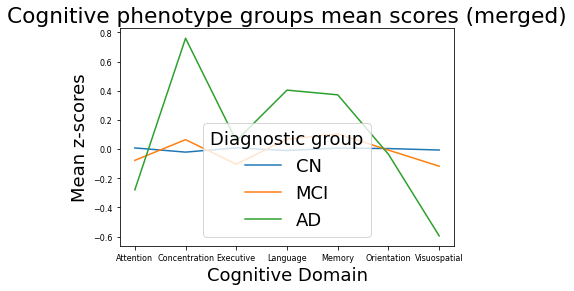

In [72]:
metadata_path = "./Tests/merged_Metadata.csv"
#Compute zscores means for each cognitive domain by diagnostic group
merged_means_CN = zscores_means(X_merged_CN, "CN", metadata_path)
merged_means_MCI = zscores_means(X_merged_MCI, "MCI", metadata_path)
merged_means_AD = zscores_means(X_merged_AD, "AD", metadata_path)

#Concanetate all dataframes
merged_means_df = pd.concat([merged_means_CN, merged_means_MCI, merged_means_AD])
merged_means_df.index = range(len(merged_means_df))

#plot dataframe
sns.lineplot(data=merged_means_df, x='Cognitive Domain', y='Mean', hue='Diagnostic')
plt.title("Cognitive phenotype groups mean scores (merged)")
plt.ylabel("Mean z-scores")
plt.legend(title="Diagnostic group")
plt.show()

## 5. ADJACENCY MATRIX

Simple correlation (a.k.a. Pearson correlation coefficient) may not give a complete picture while trying to understand the relationship between two variables (A and B) especially when there exist other influencing variables that affect A (and/or) B.
In fact, simple correlation mainly focuses on finding the influence of each variable on the other.

Whereas **partial correlation** is used to find the refined relationship between two variables with the effect of the other influencing variables being excluded/controlled.

#### Import required packages

In [73]:
#!pip install pingouin

In [74]:
from pingouin import partial_corr

#### Create partial correlation function

In [75]:
def par_corr(data_df):
    """
    Compute partial pairwise correlation of columns. 
    When a pair of columns are picked, then all other columns are treated as control variables. 
    
    @param data_df DataFrame
    @return DataFrame, whose data is a symmetric matrix
    """ 
    
    n = data_df.shape[1] #total number of tests
    mat = np.empty((n, n)) #empty matrix to store results 
    np.fill_diagonal(mat, 1) #diagonal elements have correlation equal to 1.0
    
    for i in range(n):
        for j in range(i + 1, n):
            #get columns names
            x = data_df.columns[i]
            y = data_df.columns[j]
            xy_colnames = [data_df.columns[index] for index in [i,j]]
            covar = [ var for var in data_df.columns if var not in xy_colnames]
            
            #partial correlation
            corr_df = partial_corr(data=data_df, x=x, y=y, covar=covar, method='pearson') #partial correlation stats
            corr = corr_df.iloc[0]['r'] #get partial correlation value

            #store results
            mat[i, j] = corr
            mat[j, i] = corr
            
    return pd.DataFrame(mat, index=data_df.columns, columns=data_df.columns)

In [76]:
def plot_adjacency_mx(CN_mx, MCI_mx, AD_mx, battery_name):
    
    fig, axes = plt.subplots(1,3, figsize=(20,6))

    sns.heatmap(ax=axes[0],data=CN_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)
    sns.heatmap(ax=axes[1],data=MCI_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)
    sns.heatmap(ax=axes[2],data=AD_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)

    #add titles to subfigures
    fig.suptitle('Adjacency matrixes (' + battery_name + ')')
    axes[0].title.set_text("Controls")
    axes[1].title.set_text("MCI")
    axes[2].title.set_text("AD")

    plt.show()

### ADAS-Cog

#### Divide data by diagnostic group

In [77]:
#Get indexes of subjects belonging to each group
ADAS_indexes = {} #Create empty dictionary
dx_groups = ["CN","MCI", "AD"] #diagnostic groups list

Y_ADAS = Y_ADAS.replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

for dx in dx_groups:
    ADAS_indexes[dx] = Y_ADAS.index[Y_ADAS['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_ADAS_CN = X_ADAS.iloc[ADAS_indexes["CN"]]
X_ADAS_MCI = X_ADAS.iloc[ADAS_indexes["MCI"]]
X_ADAS_AD = X_ADAS.iloc[ADAS_indexes["AD"]]

print("Number of instances CN: ", X_ADAS_CN.shape[0])
print("Number of instances MCI: ", X_ADAS_MCI.shape[0])
print("Number of instances AD: ", X_ADAS_AD.shape[0])

Number of instances CN:  659
Number of instances MCI:  699
Number of instances AD:  219


#### Compute adjacency matrixes

In [78]:
ADAS_CN_mx = par_corr(X_ADAS_CN)
ADAS_MCI_mx = par_corr(X_ADAS_MCI)
ADAS_AD_mx = par_corr(X_ADAS_AD)

#### Plot correlation matrixes as heatmaps

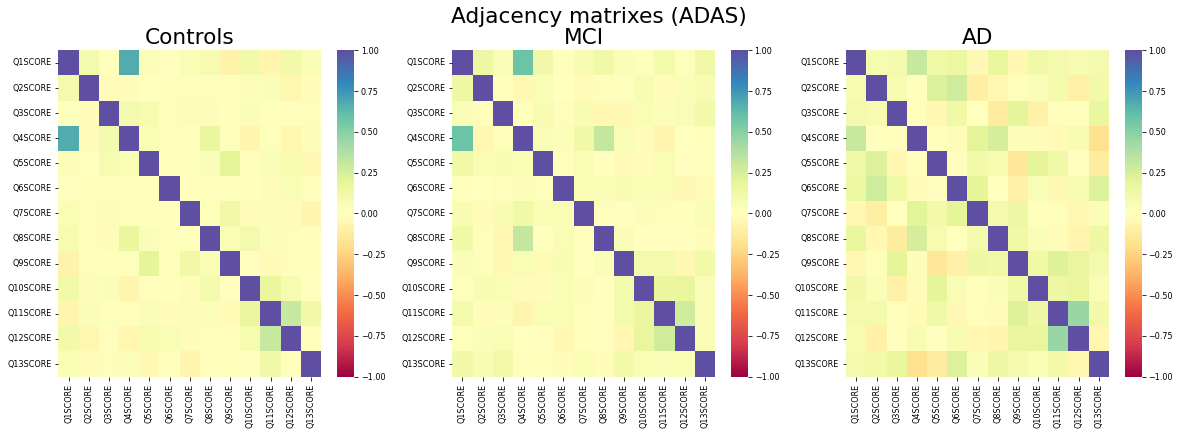

In [79]:
plot_adjacency_mx(ADAS_CN_mx, ADAS_MCI_mx, ADAS_AD_mx, 'ADAS')

### MMSE

#### Divide data by diagnostic group

In [80]:
#Get indexes of subjects belonging to each group
MMSE_indexes = {} #Create empty dictionary
dx_groups = ["CN","MCI", "AD"] #diagnostic groups list

Y_MMSE = Y_MMSE.replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

for dx in dx_groups:
    MMSE_indexes[dx] = Y_MMSE.index[Y_MMSE['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_MMSE_CN = X_MMSE.iloc[MMSE_indexes["CN"]]
X_MMSE_MCI = X_MMSE.iloc[MMSE_indexes["MCI"]]
X_MMSE_AD = X_MMSE.iloc[MMSE_indexes["AD"]]

print("Number of instances CN: ", X_MMSE_CN.shape[0])
print("Number of instances MCI: ", X_MMSE_MCI.shape[0])
print("Number of instances AD: ", X_MMSE_AD.shape[0])

Number of instances CN:  523
Number of instances MCI:  878
Number of instances AD:  339


#### Compute adjacency matrixes

In [81]:
MMSE_CN_mx = par_corr(X_MMSE_CN)
MMSE_MCI_mx = par_corr(X_MMSE_MCI)
MMSE_AD_mx = par_corr(X_MMSE_AD)

#### Plot correlation matrixes as heatmaps

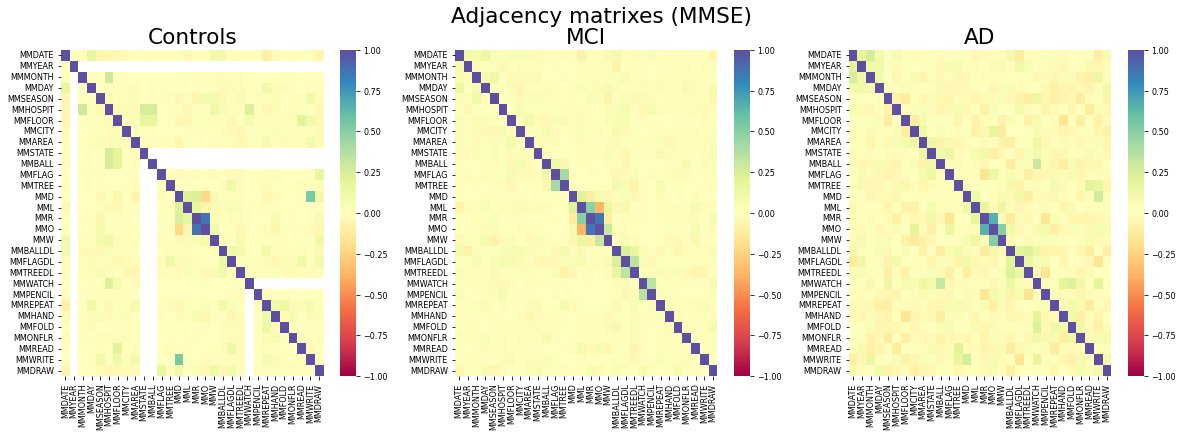

In [82]:
plot_adjacency_mx(MMSE_CN_mx, MMSE_MCI_mx, MMSE_AD_mx, 'MMSE')

Blank variables are those that are constant in the controls. Thus, the standard deviation is 0 (and the mean) is 0 and when computing the partial correlation matrixes it will raise an error. 

### MOCA

#### Divide data by diagnostic group

In [83]:
#Get indexes of subjects belonging to each group
MOCA_indexes = {} #Create empty dictionary
dx_groups = ["CN","MCI", "AD"] #diagnostic groups list

Y_MOCA = Y_MOCA.replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

for dx in dx_groups:
    MOCA_indexes[dx] = Y_MOCA.index[Y_MOCA['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_MOCA_CN = X_MOCA.iloc[MOCA_indexes["CN"]]
X_MOCA_MCI = X_MOCA.iloc[MOCA_indexes["MCI"]]
X_MOCA_AD = X_MOCA.iloc[MOCA_indexes["AD"]]

print("Number of instances CN: ", X_MOCA_CN.shape[0])
print("Number of instances MCI: ", X_MOCA_MCI.shape[0])
print("Number of instances AD: ", X_MOCA_AD.shape[0])

Number of instances CN:  645
Number of instances MCI:  684
Number of instances AD:  212


#### Compute adjacency matrixes

In [84]:
MOCA_CN_mx = par_corr(X_MOCA_CN)
MOCA_MCI_mx = par_corr(X_MOCA_MCI)
MOCA_AD_mx = par_corr(X_MOCA_AD)

#### Plot correlation matrixes as heatmaps

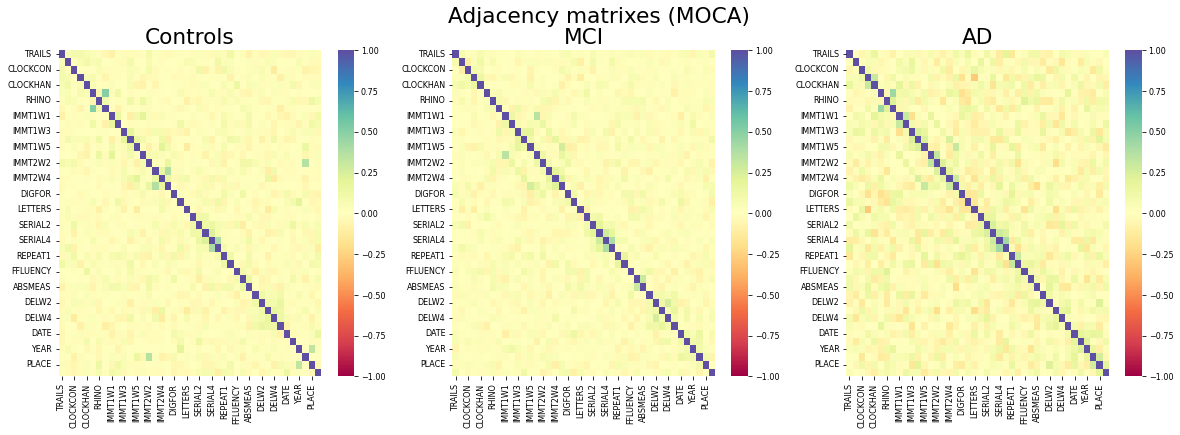

In [85]:
plot_adjacency_mx(MOCA_CN_mx, MOCA_MCI_mx, MOCA_AD_mx, 'MOCA')

He encontrado un artículo que puede ser interesante (hacen algo parecido a lo que queremos hacer), aunque todavía no he tenido tiempo de leerlo: https://doi.org/10.3390/healthcare10102045. Se centra especialmente en métodos de clasificación de Machine Learning clásicos usando ADAS-cog. Sin embargo, también realizan una matriz de correlaciones. 

### MOCA

#### Divide data by diagnostic group

In [86]:
#Get indexes of subjects belonging to each group
merged_indexes = {} #Create empty dictionary
dx_groups = ["CN","MCI", "AD"] #diagnostic groups list

Y_merged = Y_merged.replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

for dx in dx_groups:
    merged_indexes[dx] = Y_merged.index[Y_merged['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_merged_CN = X_merged.iloc[merged_indexes["CN"]]
X_merged_MCI = X_merged.iloc[merged_indexes["MCI"]]
X_merged_AD = X_merged.iloc[merged_indexes["AD"]]

print("Number of instances CN: ", X_merged_CN.shape[0])
print("Number of instances MCI: ", X_merged_MCI.shape[0])
print("Number of instances AD: ", X_merged_AD.shape[0])

Number of instances CN:  288
Number of instances MCI:  468
Number of instances AD:  142


#### Compute adjacency matrixes

In [87]:
merged_CN_mx = par_corr(X_merged_CN)
merged_MCI_mx = par_corr(X_merged_MCI)
merged_AD_mx = par_corr(X_merged_AD)

#### Plot correlation matrixes as heatmaps

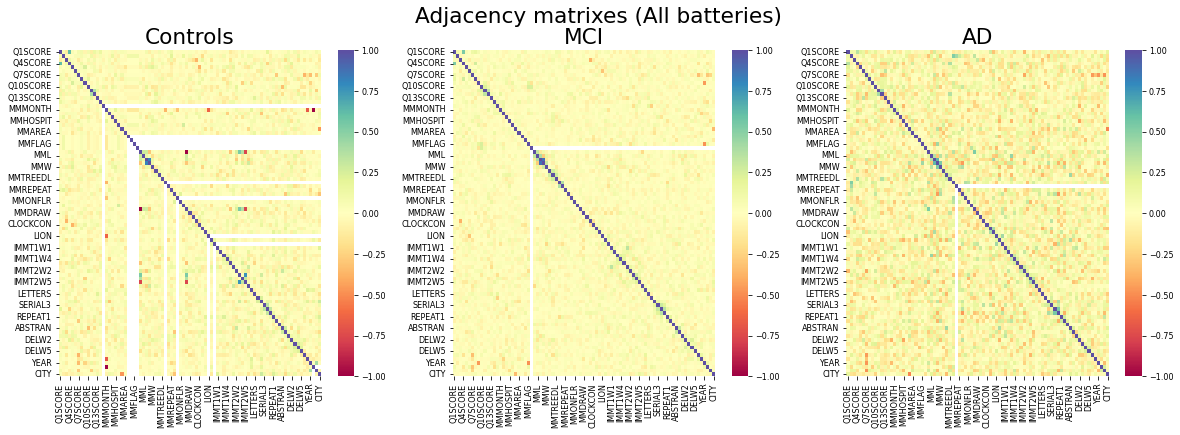

In [88]:
plot_adjacency_mx(merged_CN_mx, merged_MCI_mx, merged_AD_mx, 'All batteries')

## 6. GRAPH CONSTRUCTION

In [89]:
import networkx as nx

In [90]:
def cognitive_network(mx):
    """Function to remove diagonal elements and convert scores into absolute values. It returns a networkx graph"""

    for i in range(mx.shape[1]): #iterate matrix elements
        colname = mx.columns[i]
        #Remove diagonal elements
        mx[colname] =np.where((mx[colname]==1.0) | (mx[colname].isnull()),0, mx[colname]) 
        #Convert negative correlations in positive ones
        mx[colname] = np.where((mx[colname]<0),-1*mx[colname], mx[colname]) 
    
    #Create graph from adjacency matrix
    g = nx.from_numpy_array(mx.to_numpy())
    
    return g

In [91]:
def node_attributes(metadata_path, graphs_ls): 
    """Function to add attributes to the nodes of the graph"""
    
    attribute_ls = ['Node', 'ADNI column', 'Test', 'Cognitive Domain']
    
    #Import node metadata
    metadata_df = pd.read_csv(metadata_path, sep=";", 
                                usecols = attribute_ls)
    
    #Add attributes
    for graph in graphs_ls:
        for attribute in attribute_ls:
            nx.set_node_attributes(graph, dict(zip(metadata_df.Node, metadata_df[attribute])), name=attribute)

In [92]:
def draw_graph(graphs_ls, test_labels, pos, mapping, battery_name):
    
    #Color by NC domain
    ATTRIBUTE_NAME = 'Cognitive Domain'
    
    colors=[]
    for node in list(graphs_ls[0].nodes()): #iterate each node
        domain = graphs_ls[0].nodes[node][ATTRIBUTE_NAME]
        colors.append(mapping[domain])

    #Plot
    fig, axes = plt.subplots(1,3, figsize=(20,6))
    
    for i in range(len(graphs_ls)):
        
        graph = graphs_ls[i]

        #get edges weights
        weights = list(nx.get_edge_attributes(graph,'weight').values())
        
        if test_labels is not None: 
            nx.draw(ax=axes[i], G=graph, pos=pos, labels=test_labels, with_labels=True, node_color=colors, 
                   edge_color=weights, edge_cmap=plt.cm.Greys, width=[ x*10 for x in weights])
        
        else:
            nx.draw(ax=axes[i], G=graph, pos=pos, with_labels=True, node_color=colors, 
                   edge_color=weights, edge_cmap=plt.cm.Greys, width=[ x*10 for x in weights])
    

    #add title to subfigures
    axes[0].title.set_text("Controls")
    axes[1].title.set_text("MCI")
    axes[2].title.set_text("AD")
    
    figure_path = "./Results/Figures/Graphs/"+ battery_name + ".svg"

    plt.savefig(figure_path, format="svg")
    plt.show()

### ADAS-Cog

#### 6.1 Compute graph

In [93]:
import networkx as nx

#convert adjacency matrix into graph
ADAS_CN_graph = cognitive_network(ADAS_CN_mx)
ADAS_MCI_graph = cognitive_network(ADAS_MCI_mx)
ADAS_AD_graph = cognitive_network(ADAS_AD_mx)

In [94]:
#count nodes and edges
print("CN-------------------------")
print("- Number of nodes: ", ADAS_CN_graph.number_of_nodes())
print("- Number of edges: ", ADAS_CN_graph.number_of_edges())
print()
print("MCI-------------------------")
print("- Number of nodes: ", ADAS_MCI_graph.number_of_nodes())
print("- Number of edges: ", ADAS_MCI_graph.number_of_edges())
print()
print("AD-------------------------")
print("- Number of nodes: ", ADAS_AD_graph.number_of_nodes())
print("- Number of edges: ", ADAS_AD_graph.number_of_edges())

CN-------------------------
- Number of nodes:  13
- Number of edges:  78

MCI-------------------------
- Number of nodes:  13
- Number of edges:  78

AD-------------------------
- Number of nodes:  13
- Number of edges:  78


#### 6.2. Add node attributes

As the nodes represent different tests they are going to have the following attributes:

- ADNI column: name of the test in the ADNI database
- Test description
- Cognitive domain

In [95]:
metadata_path = "./Tests/ADAS_Metadata.csv"
graphs_ls = [ADAS_CN_graph, ADAS_MCI_graph, ADAS_AD_graph]

node_attributes(metadata_path, graphs_ls)

#### 6.3. Draw graph

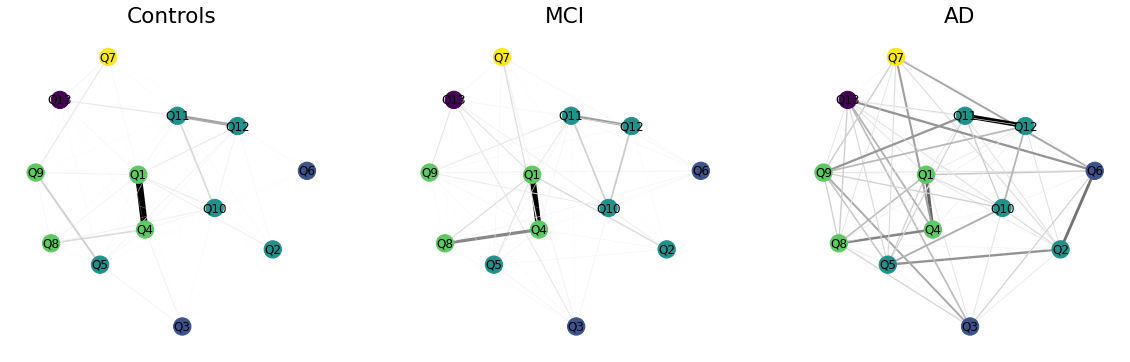

In [96]:
#Node labels
test_labels = {0:"Q1", 1:"Q2", 2:"Q3", 3:"Q4", 4:"Q5", 5: "Q6", 6:"Q7",
              7:"Q8",8:"Q9", 9:"Q10", 10:"Q11", 11:"Q12", 12:"Q13"}

#convert domains into numeric keys
mapping_ADAS = {'Attention':0, 'Executive':1, 'Language':2, 'Memory':3, 'Orientation':4} 

#fix position
pos_ADAS=nx.spring_layout(ADAS_CN_graph, weight='weight', seed=0)

draw_graph(graphs_ls, test_labels, pos_ADAS, mapping_ADAS, 'ADAS')

#### Edges weights

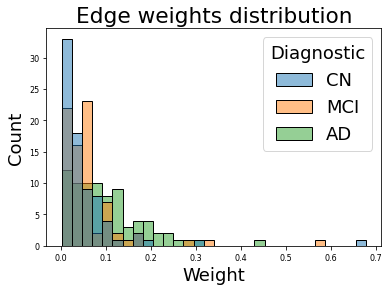

In [97]:
#Create dataframe with weights
weights_df_CN = pd.DataFrame(list(nx.get_edge_attributes(ADAS_CN_graph,'weight').values()), columns=["Weight"])
weights_df_CN['Diagnostic'] = "CN"
weights_df_MCI = pd.DataFrame(list(nx.get_edge_attributes(ADAS_MCI_graph,'weight').values()), columns=["Weight"])
weights_df_MCI['Diagnostic'] = "MCI"
weights_df_AD = pd.DataFrame(list(nx.get_edge_attributes(ADAS_AD_graph,'weight').values()), columns=["Weight"])
weights_df_AD['Diagnostic'] = "AD"

#merge all
weights_df = pd.concat([weights_df_CN, weights_df_MCI, weights_df_AD], ignore_index=True)

#plot histogram
sns.histplot(data=weights_df, x="Weight", hue="Diagnostic")
plt.title("Edge weights distribution")
plt.savefig("./Figures/ADAS_weights.png", format="png")
plt.show()

### MMSE

#### 6.1 Compute graph

In [98]:
import networkx as nx

#convert adjacency matrix into graph
MMSE_CN_graph = cognitive_network(MMSE_CN_mx)
MMSE_MCI_graph = cognitive_network(MMSE_MCI_mx)
MMSE_AD_graph = cognitive_network(MMSE_AD_mx)

In [99]:
#count nodes and edges
print("CN-------------------------")
print("- Number of nodes: ", MMSE_CN_graph.number_of_nodes())
print("- Number of edges: ", MMSE_CN_graph.number_of_edges())
print()
print("MCI-------------------------")
print("- Number of nodes: ", MMSE_MCI_graph.number_of_nodes())
print("- Number of edges: ", MMSE_MCI_graph.number_of_edges())
print()
print("AD-------------------------")
print("- Number of nodes: ", MMSE_AD_graph.number_of_nodes())
print("- Number of edges: ", MMSE_AD_graph.number_of_edges())

CN-------------------------
- Number of nodes:  30
- Number of edges:  360

MCI-------------------------
- Number of nodes:  30
- Number of edges:  435

AD-------------------------
- Number of nodes:  30
- Number of edges:  435


#### 6.2. Add node attributes

As the nodes represent different tests they are going to have the following attributes:

- ADNI column: name of the test in the ADNI database
- Test description
- Cognitive domain

In [100]:
metadata_path = "./Tests/MMSE_Metadata.csv"
graphs_ls = [MMSE_CN_graph, MMSE_MCI_graph, MMSE_AD_graph]

node_attributes(metadata_path, graphs_ls)

#### 6.3. Draw graph

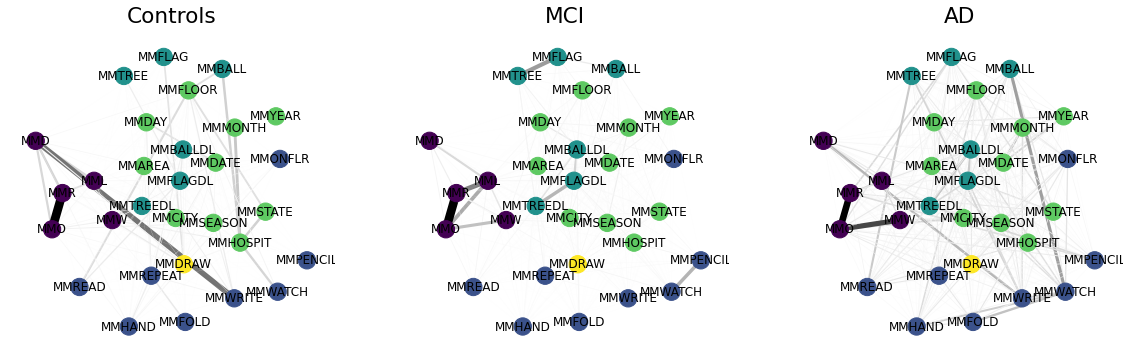

In [101]:
#Node labels
test_labels = {} #create empty dictionary

for i in range(MMSE_CN_mx.shape[1]):
    test_labels[i] = MMSE_CN_mx.columns[i]

#convert domains into numeric keys
mapping_MMSE = {'Concentration':0, 'Language':1, 'Memory':2, 'Orientation':3, 'Visuospatial ':4} 

#fix position
pos_MMSE=nx.spring_layout(MMSE_MCI_graph, weight='weight', seed=0)

draw_graph(graphs_ls, test_labels, pos_MMSE, mapping_MMSE, 'MMSE')

#### Edges weights

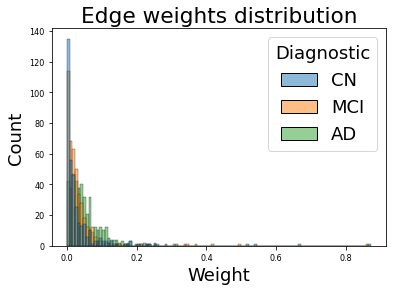

In [102]:
#Create dataframe with weights
weights_df_CN = pd.DataFrame(list(nx.get_edge_attributes(MMSE_CN_graph,'weight').values()), columns=["Weight"])
weights_df_CN['Diagnostic'] = "CN"
weights_df_MCI = pd.DataFrame(list(nx.get_edge_attributes(MMSE_MCI_graph,'weight').values()), columns=["Weight"])
weights_df_MCI['Diagnostic'] = "MCI"
weights_df_AD = pd.DataFrame(list(nx.get_edge_attributes(MMSE_AD_graph,'weight').values()), columns=["Weight"])
weights_df_AD['Diagnostic'] = "AD"

#merge all
weights_df = pd.concat([weights_df_CN, weights_df_MCI, weights_df_AD], ignore_index=True)

#plot histogram
sns.histplot(data=weights_df, x="Weight", hue="Diagnostic")
plt.title("Edge weights distribution")
plt.savefig("./Figures/MMSE_weights.png", format="png")
plt.show()

### MOCA

#### 6.1 Compute graph

In [103]:
import networkx as nx

#convert adjacency matrix into graph
MOCA_CN_graph = cognitive_network(MOCA_CN_mx)
MOCA_MCI_graph = cognitive_network(MOCA_MCI_mx)
MOCA_AD_graph = cognitive_network(MOCA_AD_mx)

In [104]:
#count nodes and edges
print("CN-------------------------")
print("- Number of nodes: ", MOCA_CN_graph.number_of_nodes())
print("- Number of edges: ", MOCA_CN_graph.number_of_edges())
print()
print("MCI-------------------------")
print("- Number of nodes: ", MOCA_MCI_graph.number_of_nodes())
print("- Number of edges: ", MOCA_MCI_graph.number_of_edges())
print()
print("AD-------------------------")
print("- Number of nodes: ", MOCA_AD_graph.number_of_nodes())
print("- Number of edges: ", MOCA_AD_graph.number_of_edges())

CN-------------------------
- Number of nodes:  42
- Number of edges:  861

MCI-------------------------
- Number of nodes:  42
- Number of edges:  861

AD-------------------------
- Number of nodes:  42
- Number of edges:  861


#### 6.2. Add node attributes

As the nodes represent different tests they are going to have the following attributes:

- ADNI column: name of the test in the ADNI database
- Test description
- Cognitive domain

In [105]:
metadata_path = "./Tests/MOCA_Metadata.csv"
graphs_ls = [MOCA_CN_graph, MOCA_MCI_graph, MOCA_AD_graph]

node_attributes(metadata_path, graphs_ls)

#### 6.3. Draw graph

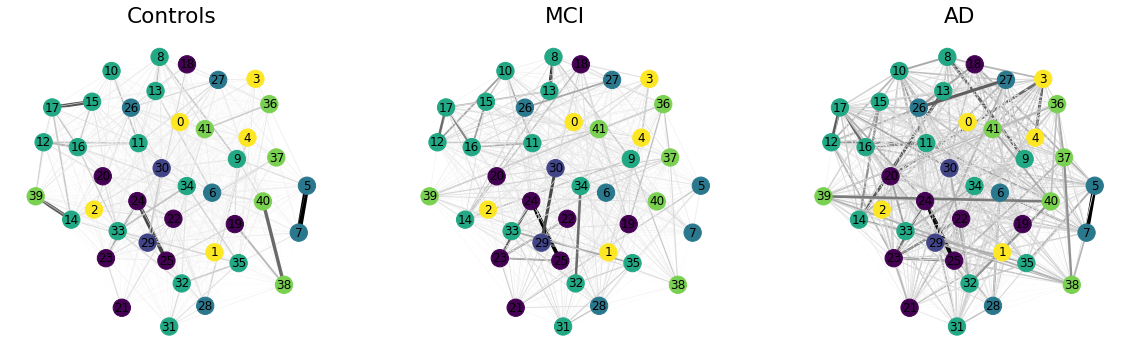

In [106]:
#Node labels
test_labels = None

#convert domains into numeric keys
mapping_MOCA = {'Attention':0, 'Executive function':1, 'Language':2, 'Memory':3, 'Orientation':4, 
          'Visuospatial':5}  

#fix position
pos_MOCA=nx.spring_layout(MOCA_CN_graph, weight='weight', seed=0)

draw_graph(graphs_ls, test_labels, pos_MOCA, mapping_MOCA, 'MOCA')

#### Edges weights

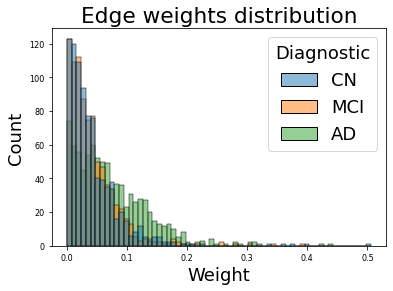

In [107]:
#Create dataframe with weights
weights_df_CN = pd.DataFrame(list(nx.get_edge_attributes(MOCA_CN_graph,'weight').values()), columns=["Weight"])
weights_df_CN['Diagnostic'] = "CN"
weights_df_MCI = pd.DataFrame(list(nx.get_edge_attributes(MOCA_MCI_graph,'weight').values()), columns=["Weight"])
weights_df_MCI['Diagnostic'] = "MCI"
weights_df_AD = pd.DataFrame(list(nx.get_edge_attributes(MOCA_AD_graph,'weight').values()), columns=["Weight"])
weights_df_AD['Diagnostic'] = "AD"

#merge all
weights_df = pd.concat([weights_df_CN, weights_df_MCI, weights_df_AD], ignore_index=True)

#plot histogram
sns.histplot(data=weights_df, x="Weight", hue="Diagnostic")
plt.title("Edge weights distribution")
plt.savefig("./Figures/MOCA_weights.png", format="png")
plt.show()

### Merged

#### 6.1 Compute graph

In [108]:
import networkx as nx

#convert adjacency matrix into graph
merged_CN_graph = cognitive_network(merged_CN_mx)
merged_MCI_graph = cognitive_network(merged_MCI_mx)
merged_AD_graph = cognitive_network(merged_AD_mx)

In [109]:
#count nodes and edges
print("CN-------------------------")
print("- Number of nodes: ", merged_CN_graph.number_of_nodes())
print("- Number of edges: ", merged_CN_graph.number_of_edges())
print()
print("MCI-------------------------")
print("- Number of nodes: ", merged_MCI_graph.number_of_nodes())
print("- Number of edges: ", merged_MCI_graph.number_of_edges())
print()
print("AD-------------------------")
print("- Number of nodes: ", merged_AD_graph.number_of_nodes())
print("- Number of edges: ", merged_AD_graph.number_of_edges())

CN-------------------------
- Number of nodes:  85
- Number of edges:  3090

MCI-------------------------
- Number of nodes:  85
- Number of edges:  3511

AD-------------------------
- Number of nodes:  85
- Number of edges:  3521


#### 6.2. Add node attributes

As the nodes represent different tests they are going to have the following attributes:

- ADNI column: name of the test in the ADNI database
- Test description
- Cognitive domain

In [110]:
metadata_path = "./Tests/merged_Metadata.csv"
graphs_ls = [merged_CN_graph, merged_MCI_graph, merged_AD_graph]

node_attributes(metadata_path, graphs_ls)

#### 6.3. Draw graph

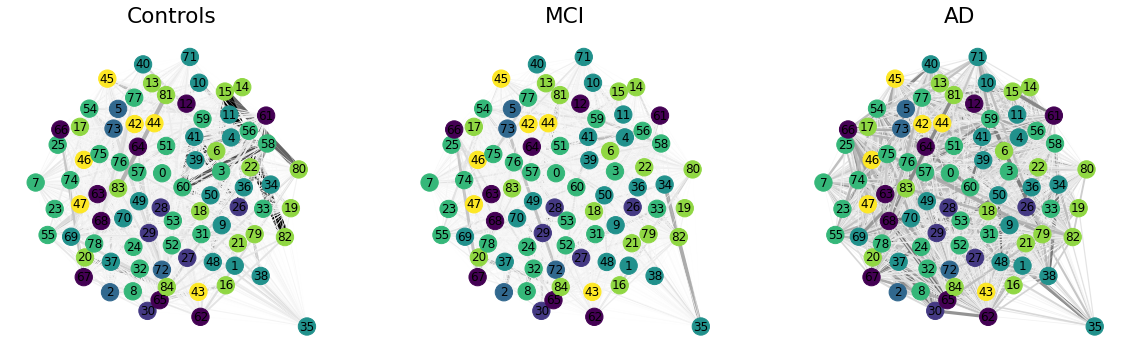

In [111]:
#Node labels
test_labels = None

#convert domains into numeric keys
mapping_merged = {'Attention':0, 'Concentration':1, 'Executive':2, 'Language':3, 'Memory':4,
          'Orientation':5, 'Visuospatial':6} 

#fix position
pos_merged=nx.spring_layout(merged_AD_graph, weight='weight', seed=0)

draw_graph(graphs_ls, test_labels, pos_merged, mapping_merged, 'merged')

#### Edges weights

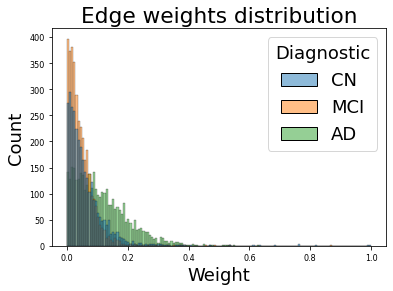

In [112]:
#Create dataframe with weights
weights_df_CN = pd.DataFrame(list(nx.get_edge_attributes(merged_CN_graph,'weight').values()), columns=["Weight"])
weights_df_CN['Diagnostic'] = "CN"
weights_df_MCI = pd.DataFrame(list(nx.get_edge_attributes(merged_MCI_graph,'weight').values()), columns=["Weight"])
weights_df_MCI['Diagnostic'] = "MCI"
weights_df_AD = pd.DataFrame(list(nx.get_edge_attributes(merged_AD_graph,'weight').values()), columns=["Weight"])
weights_df_AD['Diagnostic'] = "AD"

#merge all
weights_df = pd.concat([weights_df_CN, weights_df_MCI, weights_df_AD], ignore_index=True)

#plot histogram
sns.histplot(data=weights_df, x="Weight", hue="Diagnostic")
plt.title("Edge weights distribution")
plt.savefig("./Figures/merged_weights.png", format="png")
plt.show()

## 7. NETWORK ANALYSIS

#### 1. CENTRALITY MEASURES

#### Degree Centrality

In network analysis, measures of the importance of nodes are referred to as **centrality** measures. **Degree** is the simplest and the most common way of finding important nodes. A node’s degree is the sum of its edges between all the possible connections. This is the centrality measure used in the epilepsy paper. 

#### Other centrality measures

- **Closeness centrality**: is a way of detecting nodes that are able to spread information very efficiently through a graph. The closeness centrality of a node measures its average farness (inverse distance) to all other nodes. 
- **Eigenvector centrality**: is a kind of extension of degree—it looks at a combination of a node’s edges and the edges of that node’s neighbors. Eigenvector centrality cares if you are a hub, but it also cares how many hubs you are connected to. It’s calculated as a value from 0 to 1: the closer to one, the greater the centrality. Eigenvector centrality is useful for understanding which nodes can get information to many other nodes quickly. 
- **Betweenness centrality**: t doesn’t care about the number of edges any one node or set of nodes has. Betweenness centrality looks at all the shortest paths that pass through a particular node (see above). Betweenness centrality, which is also expressed on a scale of 0 to 1, is fairly good at finding nodes that connect two otherwise disparate parts of a network.

In [113]:
def centrality(graph,columns):
    
    """Function to compute a table with the different centrality measures for each node."""
    
    #compute edges distances based on weights
    g_distance_dict = {(e1, e2): 1/weight for e1, e2, weight in graph.edges(data='weight')}
    nx.set_edge_attributes(graph, g_distance_dict, 'distance')
    
    #DC = nx.degree_centrality(graph) #degree centrality
    #CC = nx.closeness_centrality(graph) #closeness centrality     
    DC = [graph.degree(n, weight='weight') for n in graph.nodes()] #degree centrality
    CC = nx.closeness_centrality(graph, distance='distance')
    EC = nx.eigenvector_centrality(graph, weight='weight') #eigenvector centrality
    BC = nx.betweenness_centrality(graph, weight='weight') #betweenness centrality
    
    
    centrality_df = pd.DataFrame() #create empty dataframe
    
    for node in BC:
        centrality_df.at[node, "Degree_Centrality"] = DC[node] / (len(DC) - 1)
        centrality_df.at[node, "Closeness_Centrality"] = CC[node] 
        centrality_df.at[node, "Eigenvector_Centrality"] = EC[node] 
        centrality_df.at[node, "Betweenness_Centrality"] = BC[node] 
    
    centrality_df.index = columns
        
    return centrality_df

In [114]:
### Plot degree centrality

def plot_centrality_top5(graph_CN, graph_MCI, graph_AD, columns, centrality_metric):
    #Compute centrality measures
    df_CN = centrality(graph_CN, columns)
    df_MCI = centrality(graph_MCI, columns)
    df_AD = centrality(graph_AD, columns)
    
    #Order dataframe by centrality
    df_CN = df_CN.sort_values(by=[centrality_metric],ascending = False)
    df_MCI = df_MCI.sort_values(by=[centrality_metric],ascending = False)
    df_AD = df_AD.sort_values(by=[centrality_metric],ascending = False)
    
    #Truncate table to show only top 5 tests by centrality measure
    top_CN = df_CN.iloc[0:5]
    top_MCI = df_MCI.iloc[0:5] 
    top_AD = df_AD.iloc[0:5] 
    
    #Plot 
    fig, ax = plt.subplots(1,3, figsize=(20,6))
    
    sns.barplot(ax=ax[0], x=top_CN.index, y=centrality_metric, data=top_CN, palette=['#1f77b4']) 
    sns.barplot(ax=ax[1], x=top_MCI.index, y=centrality_metric, data=top_MCI, palette=['#ff7f0e']) 
    sns.barplot(ax=ax[2], x=top_AD.index, y=centrality_metric, data=top_AD, palette=['#2ca02c']) 
    
    for i in range(3):
        ax[i].set_xlabel("Test")
    
    plt.show()

In [115]:
def plot_centrality(graph_CN, graph_MCI, graph_AD, columns, centrality_metric):
    #Compute centrality measures
    df_CN = centrality(graph_CN, columns)
    df_MCI = centrality(graph_MCI, columns)
    df_AD = centrality(graph_AD, columns)
    
    #Order dataframe by centrality
    df_CN = df_CN.sort_values(by=[centrality_metric],ascending = False)
    df_MCI = df_MCI.sort_values(by=[centrality_metric],ascending = False)
    df_AD = df_AD.sort_values(by=[centrality_metric],ascending = False)
    
    
    #Plot 
    fig, ax = plt.subplots(1,3, figsize=(24,10))
    
    sns.barplot(ax=ax[0], x=centrality_metric, y=df_CN.index, data=df_CN, palette=['#1f77b4']) 
    sns.barplot(ax=ax[1], x=centrality_metric, y=df_MCI.index, data=df_MCI, palette=['#ff7f0e']) 
    sns.barplot(ax=ax[2], x=centrality_metric, y=df_AD.index, data=df_AD, palette=['#2ca02c']) 
    
    for i in range(3):
        ax[i].set_ylabel("Test")
    
    plt.show()

In [116]:
#print(sns.color_palette().as_hex()[0])
#print(sns.color_palette().as_hex()[1])
#print(sns.color_palette().as_hex()[2])

#### 2. GLOBAL METRICS

#### Average clustering coefficient

In graph theory, a **clustering coefficient** is a measure of the degree to which nodes in a graph tend to cluster together. Two versions of this measure exist: the global and the local. The global version was designed to give an overall indication of the clustering in the network, whereas the local gives an indication of the embeddedness of single nodes. In this work we are computing **global measures**.

The clustering coefficient for the graph is the average,

$$
    C = \frac{1}{n}\sum_{v \in G}c_v
$$

where $n$ is the number of nodes in the graph $G$.

#### Global efficiency

The **efficiency** of a pair of nodes in a graph is the multiplicative inverse of the shortest path distance between the nodes. The average global efficiency of a graph is the average efficiency of all pairs of nodes. Edge weights are ignored when computing the shortest path distances.

Note than in the epilepsy paper they computed *normalized global efficiencies*.

#### Global measures summary

The following global metrics are going to be computed:

- **Number of nodes**: number of entities
- **Number of edges**: pairs of connected entities
- **Diameter**: the diameter of a graph is definded as the largest shortest path distance in the graph. It is the maximum value of $d(u,v)$ overf all $u,v$ pairs, where $d(u,v)$ denotes the shortest path distance from vertex $u$ to vertex $v$.
- **Density**: it is the ratio of actual edges in the network to all possible connections between the entities of the network. Network density gives you a quick sense of how closely knit your network is. It is also know as the *sparsity* of the graph and ranges between 0 and 1. Low values would indicate a network with a few specific conexions, whereas high values are indicative of a low specificity. 
- **Average degree**: The average degree of an undirected graph is used to measure the number of edges compared to the number of nodes. To do this we simply divide the summation of all nodes' degree by the total number of nodes. 
- **Transitivity**: it is the ratio of all triangles over all possible triangles. So transitivity, like density, expresses how interconnected a graph is in terms of a ratio of actual over possible connections. 
- **Average clustering coefficient**: In graph theory, a clustering coefficient is a measure of the degree to which nodes in a graph tend to cluster together. The global clustering coefficient is based on triplets of nodes. The global clustering coefficient is the number of closed triplets (or 3 x triangles) over the total number of triplets (both open and closed). 
- **Glogbal Efficiency**: In network science, the efficiency of a network is a measure of how efficiently it exchanges information and it is also called *communication efficiency*. The global efficiency is the average inverse shortest path length in the network.

In [117]:
def global_metrics(graphs_ls):
    
    """Function to compute a table with some global metrics of the graphs. 
    It returns a pandas DataFrame object."""
    
    columns = ['NNodes', 'NEdges', 'Diameter', 'Density', 'AvDegree', 'Transitivity','AvCC', 'AvGE']
    index = ['CN', 'MCI', 'AD']
    
    df = pd.DataFrame(columns = columns,
                     index = index) #empty dataframe
    
    #GLOBAL METRICS
    
    for i in range(len(index)): 
        graph = graphs_ls[i]
        dx = index[i]
        
        df.loc[dx,'NNodes'] = graph.number_of_nodes() #number of nodes
        df.loc[dx,'NEdges'] = graph.number_of_edges() #number of edges
        df.loc[dx,'Diameter'] = nx.diameter(graph) #diameter of graph
        df.loc[dx,'Density'] = nx.density(graph) #density of graph
        df.loc[dx,'AvDegree'] = sum(dict(graph.degree(weight='weight')).values())/graph.number_of_nodes() #average degree
        df.loc[dx,'Transitivity'] = nx.transitivity(graph) #transitivity of graph
        df.loc[dx,'AvCC'] = nx.average_clustering(graph,weight='weight') #average clustering coefficient
        df.loc[dx,'AvGE'] = nx.global_efficiency(graph) #average global efficiency (shortest path)
    
    return df

In [118]:
def plot_global_metrics(gm, battery_name):
    """Function to plot global metrics."""

    fig, ax = plt.subplots(2, 3, figsize=(22,13))

    sns.barplot(ax=ax[0,0], x="index", y="NEdges", data=gm) 
    sns.barplot(ax=ax[0,1], x="index", y="Diameter", data=gm)
    sns.barplot(ax=ax[0,2], x="index", y="Density", data=ADAS_gm) 
    sns.barplot(ax=ax[1,0], x="index", y="AvDegree", data=gm) 
    sns.barplot(ax=ax[1,1], x="index", y="AvCC", data=gm)
    sns.barplot(ax=ax[1,2], x="index", y="AvGE",  data=gm)

    fig.suptitle("Global metrics (" + battery_name +")", fontsize=20)

    rows, cols = 2, 3
    for i in range(rows):
        for j in range(cols):
            ax[i, j].set_xlabel('Diagnostic group')

    plt.show()

### 7.1. ADAS-Cog

#### 7.1.1. CENTRALITY MEASURES

In [119]:
print("Controls----------------------------------")
display(centrality(ADAS_CN_graph, ADAS_columns))
print("MCI----------------------------------")
display(centrality(ADAS_MCI_graph, ADAS_columns))
print("AD----------------------------------")
display(centrality(ADAS_AD_graph, ADAS_columns))

Controls----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
Q1SCORE            0.113799              0.076836                0.582181   
Q2SCORE            0.029878              0.044734                0.127868   
Q3SCORE            0.031307              0.046929                0.114702   
Q4SCORE            0.104715              0.072066                0.567820   
Q5SCORE            0.051513              0.053238                0.158364   
Q6SCORE            0.023169              0.030750                0.069866   
Q7SCORE            0.035291              0.043765                0.115688   
Q8SCORE            0.047211              0.055251                0.221951   
Q9SCORE            0.051111              0.054787                0.160274   
Q10SCORE           0.052997              0.058839                0.221447   
Q11SCORE           0.077852              0.062297                0.247239   
Q12SCORE           0.066807              0.066778                0.253174   
Q13SCORE           0.035931              0.048707                0.128769   

          Betweenness_Centrality  
Q1SCORE                 0.045455  
Q2SCORE                 0.060606  
Q3SCORE                 0.090909  
Q4SCORE                 0.000000  
Q5SCORE                 0.030303  
Q6SCORE                 0.121212  
Q7SCORE                 0.015152  
Q8SCORE                 0.030303  
Q9SCORE                 0.060606  
Q10SCORE                0.181818  
Q11SCORE                0.000000  
Q12SCORE                0.000000  
Q13SCORE                0.090909

MCI----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
Q1SCORE            0.115296              0.085790                0.534275   
Q2SCORE            0.042381              0.058060                0.178868   
Q3SCORE            0.048528              0.051819                0.155963   
Q4SCORE            0.114639              0.081710                0.547846   
Q5SCORE            0.041520              0.054241                0.169094   
Q6SCORE            0.036392              0.044901                0.118619   
Q7SCORE            0.043812              0.057895                0.178873   
Q8SCORE            0.055461              0.069768                0.308446   
Q9SCORE            0.053954              0.056289                0.175201   
Q10SCORE           0.064316              0.060803                0.178655   
Q11SCORE           0.077970              0.069813                0.244152   
Q12SCORE           0.061876              0.060181                0.174578   
Q13SCORE           0.056202              0.064885                0.188673   

          Betweenness_Centrality  
Q1SCORE                 0.000000  
Q2SCORE                 0.212121  
Q3SCORE                 0.000000  
Q4SCORE                 0.000000  
Q5SCORE                 0.106061  
Q6SCORE                 0.121212  
Q7SCORE                 0.106061  
Q8SCORE                 0.575758  
Q9SCORE                 0.000000  
Q10SCORE                0.075758  
Q11SCORE                0.000000  
Q12SCORE                0.318182  
Q13SCORE                0.000000

AD----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
Q1SCORE            0.115206              0.109707                0.302012   
Q2SCORE            0.101458              0.103135                0.272089   
Q3SCORE            0.080166              0.102614                0.222299   
Q4SCORE            0.098152              0.102907                0.264116   
Q5SCORE            0.098587              0.114944                0.265239   
Q6SCORE            0.106552              0.109997                0.283358   
Q7SCORE            0.085265              0.106450                0.232144   
Q8SCORE            0.095906              0.097723                0.256204   
Q9SCORE            0.120092              0.116501                0.315818   
Q10SCORE           0.088467              0.096520                0.246081   
Q11SCORE           0.113247              0.103804                0.317883   
Q12SCORE           0.108462              0.095756                0.305007   
Q13SCORE           0.114520              0.115527                0.301714   

          Betweenness_Centrality  
Q1SCORE                 0.000000  
Q2SCORE                 0.000000  
Q3SCORE                 0.348485  
Q4SCORE                 0.318182  
Q5SCORE                 0.333333  
Q6SCORE                 0.181818  
Q7SCORE                 0.257576  
Q8SCORE                 0.045455  
Q9SCORE                 0.000000  
Q10SCORE                0.000000  
Q11SCORE                0.000000  
Q12SCORE                0.181818  
Q13SCORE                0.000000

#### Plot centrality metrics

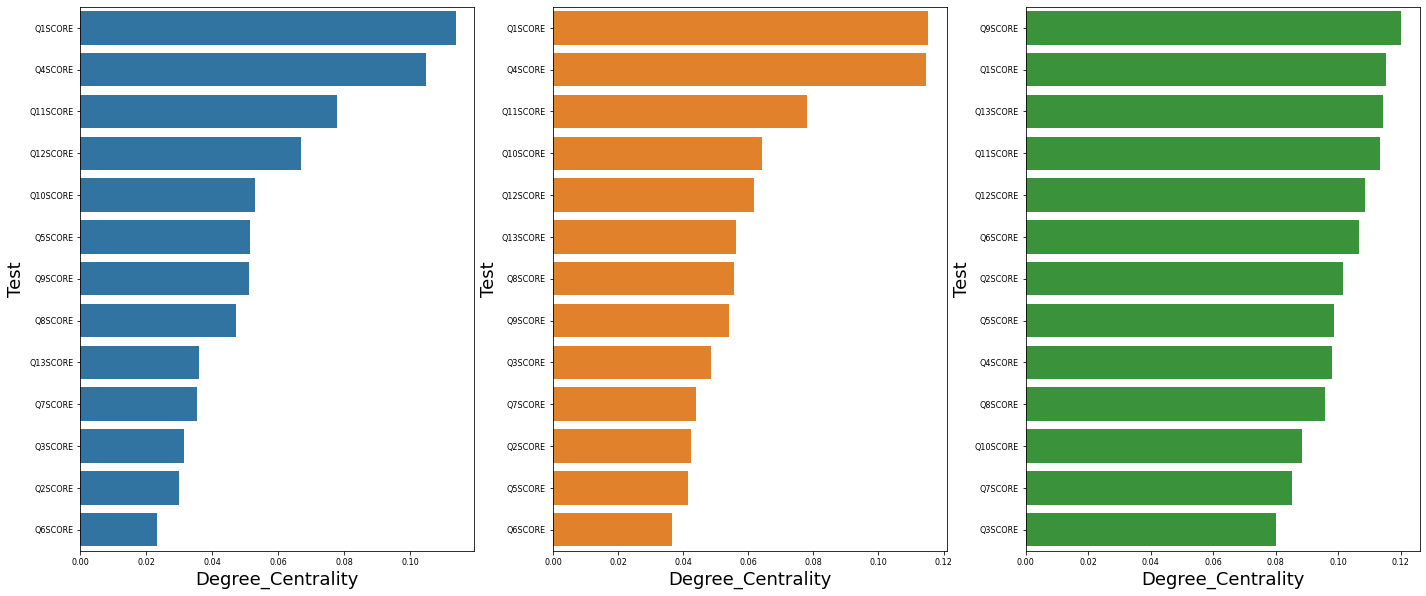

In [120]:
plot_centrality(ADAS_CN_graph, ADAS_MCI_graph, ADAS_AD_graph, ADAS_columns, "Degree_Centrality")

#### Relation between node degree and betweenness centrality

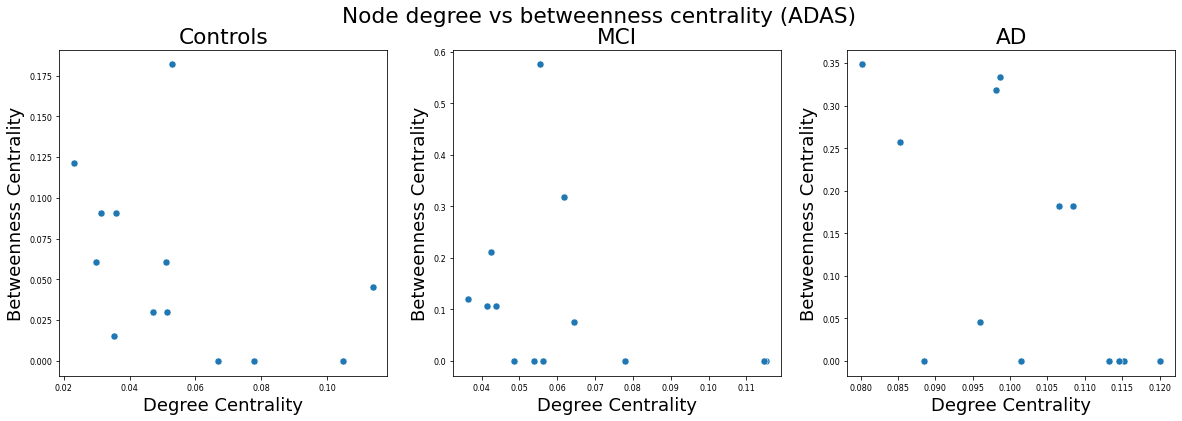

In [121]:
#Get centrality metrics table
ADAS_CN_centrality = centrality(ADAS_CN_graph, ADAS_columns)
ADAS_MCI_centrality = centrality(ADAS_MCI_graph, ADAS_columns)
ADAS_AD_centrality = centrality(ADAS_AD_graph, ADAS_columns)

#Plot
fig, axes = plt.subplots(1,3, figsize=(20,6))


sns.scatterplot(ax=axes[0],data=ADAS_CN_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[1],data=ADAS_MCI_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[2],data=ADAS_AD_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)

#labels
axes[0].set_ylabel("Betweenness Centrality")
axes[1].set_ylabel("Betweenness Centrality")
axes[2].set_ylabel("Betweenness Centrality")
axes[0].set_xlabel("Degree Centrality")
axes[1].set_xlabel("Degree Centrality")
axes[2].set_xlabel("Degree Centrality")

#add title
fig.suptitle('Node degree vs betweenness centrality (ADAS)')

#add title to subfigures
axes[0].title.set_text("Controls")
axes[1].title.set_text("MCI")
axes[2].title.set_text("AD")


plt.show()

#### 7.1.2. GLOBAL METRICS

In [122]:
ADAS_gm = global_metrics([ADAS_CN_graph, ADAS_MCI_graph, ADAS_AD_graph])
ADAS_gm.reset_index(inplace=True)
ADAS_gm

index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE
0    CN     13     78        1     1.0  0.666075          1.0  0.056999  1.0
1   MCI     13     78        1     1.0  0.749859          1.0  0.075989  1.0
2    AD     13     78        1     1.0  1.224074          1.0  0.175316  1.0

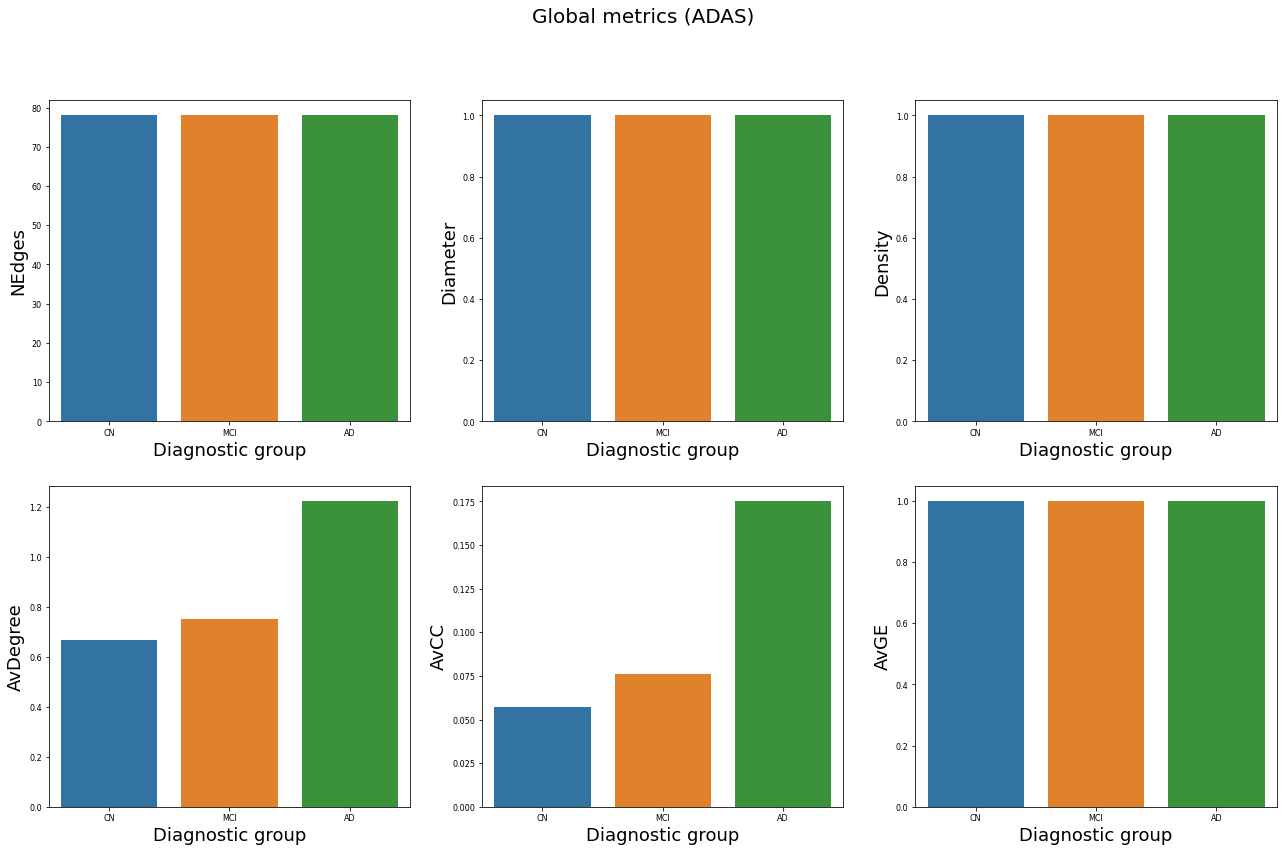

In [123]:
plot_global_metrics(ADAS_gm, 'ADAS')

### 7.2. MMSE

#### 7.2.1. CENTRALITY MEASURES

In [124]:
print("Controls----------------------------------")
display(centrality(MMSE_CN_graph, MMSE_columns))
print("MCI----------------------------------")
display(centrality(MMSE_MCI_graph, MMSE_columns))
print("AD----------------------------------")
display(centrality(MMSE_AD_graph, MMSE_columns))

Controls----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
MMDATE             0.034140              0.035895                0.094132   
MMYEAR             0.000204              0.005238                0.000461   
MMMONTH            0.015085              0.032334                0.045316   
MMDAY              0.018793              0.031602                0.051558   
MMSEASON           0.032056              0.035735                0.153703   
MMHOSPIT           0.057612              0.036273                0.113623   
MMFLOOR            0.046639              0.037669                0.130155   
MMCITY             0.014900              0.023023                0.046604   
MMAREA             0.027091              0.033012                0.100312   
MMSTATE            0.016527              0.035103                0.046769   
MMBALL             0.016527              0.035103                0.046769   
MMFLAG             0.011316              0.030820                0.046293   
MMTREE             0.010691              0.028605                0.029249   
MMD                0.059822              0.039155                0.397238   
MML                0.030070              0.035633                0.213930   
MMR                0.057482              0.037243                0.521971   
MMO                0.058372              0.037371                0.518355   
MMW                0.033286              0.038740                0.155115   
MMBALLDL           0.029077              0.036734                0.080027   
MMFLAGDL           0.036854              0.037070                0.096176   
MMTREEDL           0.028161              0.033181                0.102105   
MMWATCH            0.014060              0.032058                0.040047   
MMPENCIL           0.004908              0.011239                0.014231   
MMREPEAT           0.038754              0.037641                0.113482   
MMHAND             0.029294              0.033118                0.120433   
MMFOLD             0.012496              0.030090                0.038138   
MMONFLR            0.012649              0.024053                0.038180   
MMREAD             0.018762              0.035394                0.058604   
MMWRITE            0.040397              0.039696                0.245390   
MMDRAW             0.037456              0.037522                0.150808   

          Betweenness_Centrality  
MMDATE                  0.068966  
MMYEAR                  0.000000  
MMMONTH                 0.029557  
MMDAY                   0.192118  
MMSEASON                0.000000  
MMHOSPIT                0.046798  
MMFLOOR                 0.066502  
MMCITY                  0.000000  
MMAREA                  0.014778  
MMSTATE                 0.000000  
MMBALL                  0.000000  
MMFLAG                  0.645320  
MMTREE                  0.059113  
MMD                     0.007389  
MML                     0.000000  
MMR                     0.184729  
MMO                     0.071429  
MMW                     0.000000  
MMBALLDL                0.073892  
MMFLAGDL                0.000000  
MMTREEDL                0.000000  
MMWATCH                 0.004926  
MMPENCIL                0.093596  
MMREPEAT                0.000000  
MMHAND                  0.009852  
MMFOLD                  0.165025  
MMONFLR                 0.123153  
MMREAD                  0.004926  
MMWRITE                 0.379310  
MMDRAW                  0.000000

MCI----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
MMDATE             0.041163              0.047351                0.094609   
MMYEAR             0.020581              0.036043                0.046887   
MMMONTH            0.028517              0.036720                0.062198   
MMDAY              0.032178              0.042413                0.087084   
MMSEASON           0.029142              0.037345                0.073364   
MMHOSPIT           0.028048              0.037012                0.054957   
MMFLOOR            0.028895              0.038138                0.059558   
MMCITY             0.027358              0.037528                0.063607   
MMAREA             0.029427              0.034600                0.058519   
MMSTATE            0.022937              0.033834                0.049593   
MMBALL             0.025574              0.033121                0.051825   
MMFLAG             0.037180              0.037122                0.055747   
MMTREE             0.034140              0.039043                0.051845   
MMD                0.024315              0.036636                0.167710   
MML                0.066119              0.043891                0.435853   
MMR                0.066603              0.043032                0.548917   
MMO                0.067360              0.042968                0.545071   
MMW                0.046182              0.041764                0.255374   
MMBALLDL           0.049721              0.050984                0.099116   
MMFLAGDL           0.054092              0.052792                0.127499   
MMTREEDL           0.044096              0.050306                0.089771   
MMWATCH            0.029086              0.033463                0.044860   
MMPENCIL           0.027147              0.033275                0.039874   
MMREPEAT           0.023329              0.033748                0.040763   
MMHAND             0.019856              0.026286                0.053952   
MMFOLD             0.019829              0.032763                0.047605   
MMONFLR            0.020220              0.029200                0.040057   
MMREAD             0.022563              0.033860                0.099612   
MMWRITE            0.017489              0.027954                0.033923   
MMDRAW             0.032333              0.041281                0.089761   

          Betweenness_Centrality  
MMDATE                  0.024631  
MMYEAR                  0.009852  
MMMONTH                 0.000000  
MMDAY                   0.000000  
MMSEASON                0.044335  
MMHOSPIT                0.000000  
MMFLOOR                 0.150246  
MMCITY                  0.000000  
MMAREA                  0.000000  
MMSTATE                 0.000000  
MMBALL                  0.246305  
MMFLAG                  0.027094  
MMTREE                  0.295567  
MMD                     0.280788  
MML                     0.000000  
MMR                     0.078818  
MMO                     0.184729  
MMW                     0.000000  
MMBALLDL                0.000000  
MMFLAGDL                0.000000  
MMTREEDL                0.000000  
MMWATCH                 0.256158  
MMPENCIL                0.219212  
MMREPEAT                0.211823  
MMHAND                  0.039409  
MMFOLD                  0.091133  
MMONFLR                 0.000000  
MMREAD                  0.041872  
MMWRITE                 0.086207  
MMDRAW                  0.083744

AD----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
MMDATE             0.048223              0.061670                0.140692   
MMYEAR             0.045889              0.056706                0.134618   
MMMONTH            0.051610              0.063326                0.150683   
MMDAY              0.047037              0.053602                0.137079   
MMSEASON           0.055302              0.066501                0.168419   
MMHOSPIT           0.046426              0.061169                0.144502   
MMFLOOR            0.048291              0.064209                0.150616   
MMCITY             0.048893              0.063810                0.166966   
MMAREA             0.053198              0.067303                0.167826   
MMSTATE            0.049651              0.062141                0.165594   
MMBALL             0.055843              0.071274                0.179072   
MMFLAG             0.049308              0.061584                0.170343   
MMTREE             0.047757              0.063922                0.144956   
MMD                0.042727              0.069061                0.134836   
MML                0.046393              0.062954                0.151999   
MMR                0.075695              0.073723                0.287709   
MMO                0.090491              0.074255                0.332809   
MMW                0.062883              0.069489                0.232846   
MMBALLDL           0.071775              0.084604                0.229494   
MMFLAGDL           0.059036              0.074030                0.181752   
MMTREEDL           0.053569              0.072813                0.166677   
MMWATCH            0.075214              0.080792                0.233171   
MMPENCIL           0.048882              0.061035                0.165632   
MMREPEAT           0.051070              0.062447                0.160503   
MMHAND             0.054383              0.062516                0.169676   
MMFOLD             0.048255              0.066147                0.157336   
MMONFLR            0.055697              0.062830                0.173467   
MMREAD             0.054378              0.064600                0.164977   
MMWRITE            0.069314              0.082131                0.206966   
MMDRAW             0.044082              0.059965                0.139007   

          Betweenness_Centrality  
MMDATE                  0.160099  
MMYEAR                  0.155172  
MMMONTH                 0.096059  
MMDAY                   0.056650  
MMSEASON                0.115764  
MMHOSPIT                0.125616  
MMFLOOR                 0.093596  
MMCITY                  0.066502  
MMAREA                  0.000000  
MMSTATE                 0.039409  
MMBALL                  0.226601  
MMFLAG                  0.059113  
MMTREE                  0.014778  
MMD                     0.290640  
MML                     0.083744  
MMR                     0.108374  
MMO                     0.041872  
MMW                     0.000000  
MMBALLDL                0.219212  
MMFLAGDL                0.056650  
MMTREEDL                0.051724  
MMWATCH                 0.019704  
MMPENCIL                0.000000  
MMREPEAT                0.007389  
MMHAND                  0.133005  
MMFOLD                  0.049261  
MMONFLR                 0.032020  
MMREAD                  0.000000  
MMWRITE                 0.162562  
MMDRAW                  0.140394

#### Plot centrality metrics

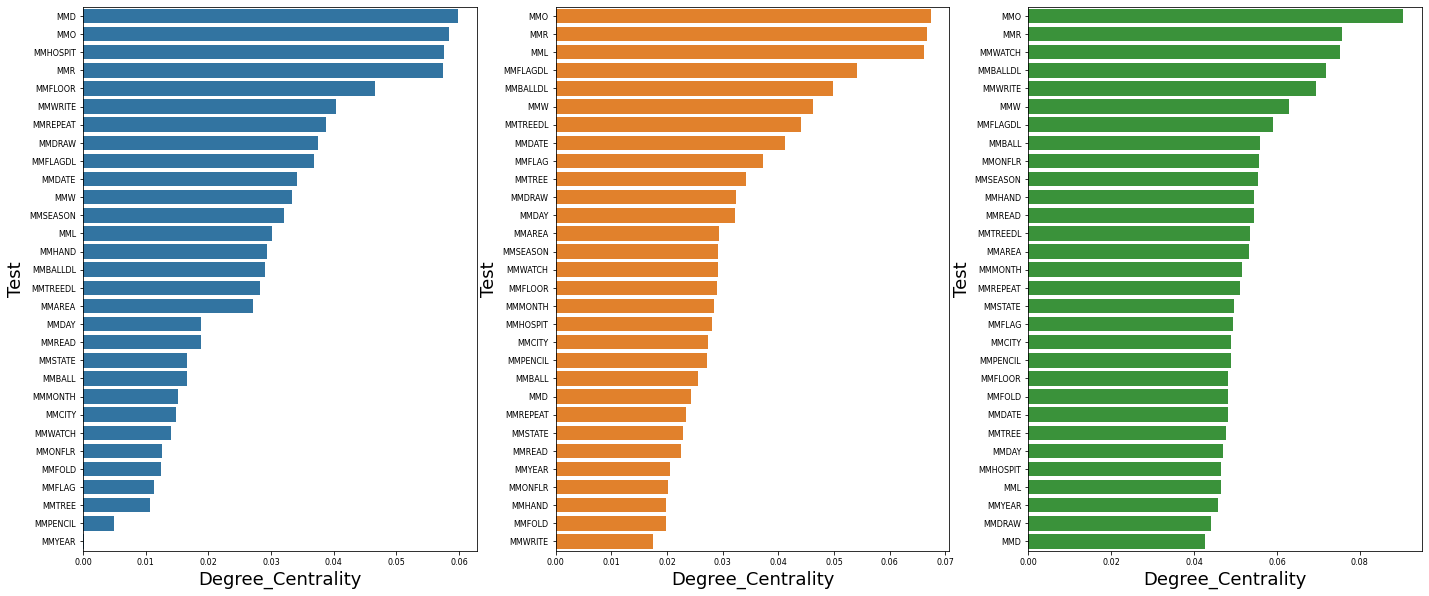

In [125]:
plot_centrality(MMSE_CN_graph, MMSE_MCI_graph, MMSE_AD_graph, MMSE_columns, "Degree_Centrality")

#### Relation between node degree and betweenness centrality

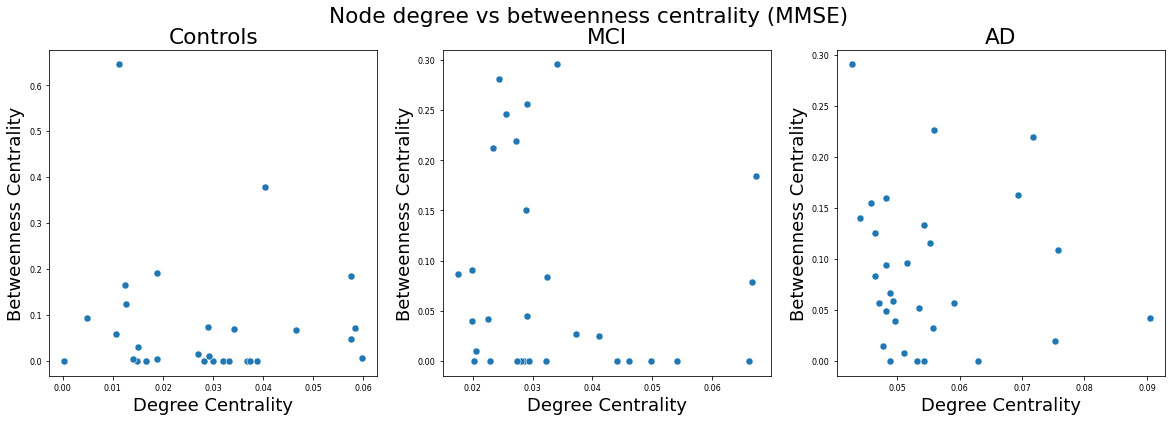

In [126]:
#Get centrality metrics table
MMSE_CN_centrality = centrality(MMSE_CN_graph, MMSE_columns)
MMSE_MCI_centrality = centrality(MMSE_MCI_graph, MMSE_columns)
MMSE_AD_centrality = centrality(MMSE_AD_graph, MMSE_columns)

#Plot
fig, axes = plt.subplots(1,3, figsize=(20,6))


sns.scatterplot(ax=axes[0],data=MMSE_CN_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[1],data=MMSE_MCI_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[2],data=MMSE_AD_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)

#labels
axes[0].set_ylabel("Betweenness Centrality")
axes[1].set_ylabel("Betweenness Centrality")
axes[2].set_ylabel("Betweenness Centrality")
axes[0].set_xlabel("Degree Centrality")
axes[1].set_xlabel("Degree Centrality")
axes[2].set_xlabel("Degree Centrality")

#add title
fig.suptitle('Node degree vs betweenness centrality (MMSE)')

#add title to subfigures
axes[0].title.set_text("Controls")
axes[1].title.set_text("MCI")
axes[2].title.set_text("AD")


plt.show()

#### 7.1.2. GLOBAL METRICS

In [127]:
MMSE_gm = global_metrics([MMSE_CN_graph, MMSE_MCI_graph, MMSE_AD_graph])
MMSE_gm.reset_index(inplace=True)
MMSE_gm

index NNodes NEdges Diameter   Density  AvDegree Transitivity      AvCC  \
0    CN     30    360        2  0.827586  0.815365     0.945685  0.019928   
1   MCI     30    435        1       1.0  0.981629          1.0  0.024891   
2    AD     30    435        1       1.0  1.596229          1.0  0.061916   

       AvGE  
0  0.913793  
1       1.0  
2       1.0

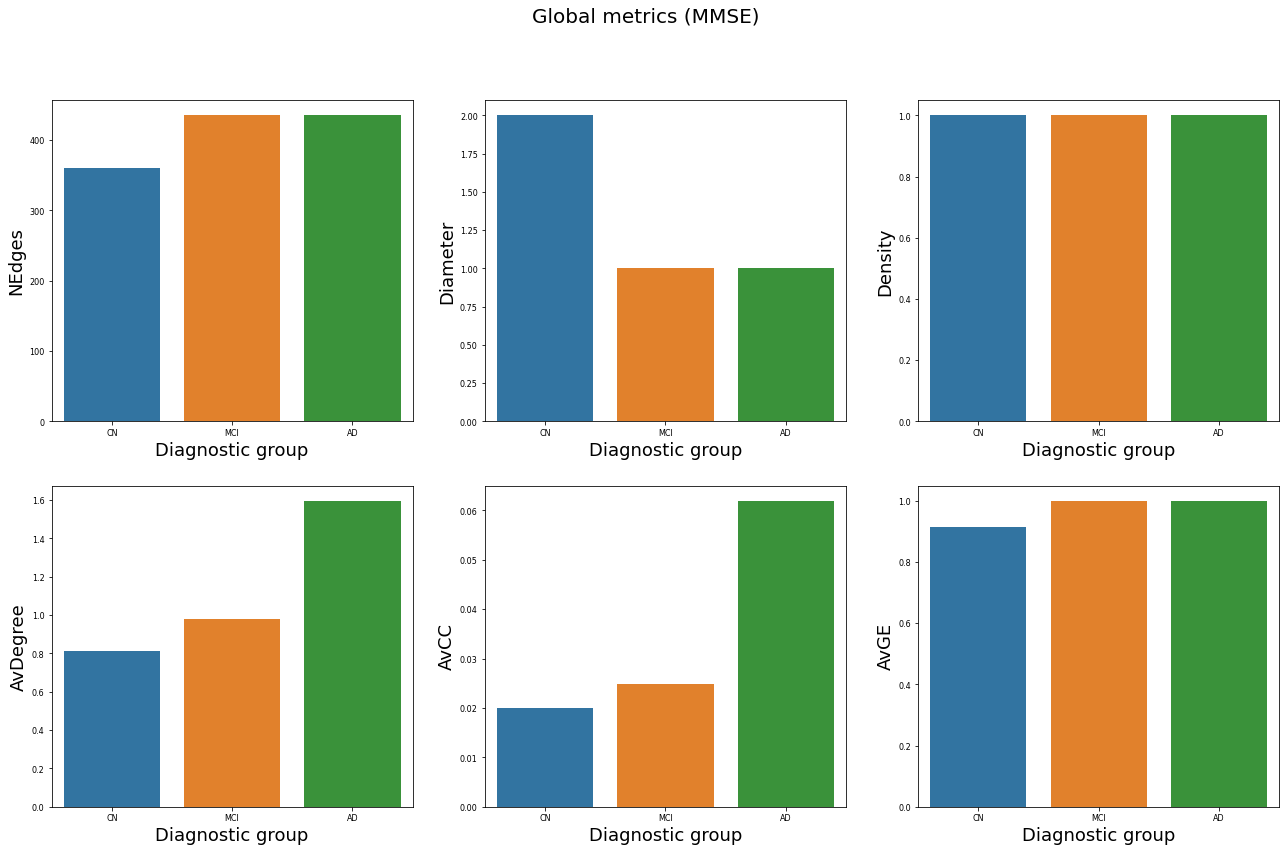

In [128]:
plot_global_metrics(MMSE_gm, 'MMSE')

### 7.3. MoCA

#### 7.1.1. CENTRALITY MEASURES

In [129]:
print("Controls----------------------------------")
display(centrality(MOCA_CN_graph, MOCA_columns))
print("MCI----------------------------------")
display(centrality(MOCA_MCI_graph, MOCA_columns))
print("AD----------------------------------")
display(centrality(MOCA_AD_graph, MOCA_columns))

Controls----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
TRAILS             0.040703              0.050855                0.144254   
CUBE               0.033792              0.053058                0.121278   
CLOCKCON           0.039506              0.056203                0.149464   
CLOCKNO            0.031470              0.044894                0.110046   
CLOCKHAN           0.037613              0.049785                0.129206   
LION               0.041683              0.052131                0.141696   
RHINO              0.045596              0.059542                0.162468   
CAMEL              0.038262              0.052618                0.132204   
IMMT1W1            0.044002              0.059297                0.161041   
IMMT1W2            0.041278              0.055961                0.146909   
IMMT1W3            0.037346              0.053546                0.140094   
IMMT1W4            0.056452              0.068107                0.200782   
IMMT1W5            0.041396              0.059543                0.156340   
IMMT2W1            0.043840              0.058375                0.160411   
IMMT2W2            0.051168              0.058233                0.184189   
IMMT2W3            0.043230              0.055359                0.158861   
IMMT2W4            0.049045              0.060983                0.183829   
IMMT2W5            0.042284              0.055458                0.160659   
DIGFOR             0.034274              0.049837                0.123666   
DIGBACK            0.041455              0.054731                0.144784   
LETTERS            0.034766              0.050125                0.126296   
SERIAL1            0.027543              0.044841                0.099786   
SERIAL2            0.051766              0.057838                0.180634   
SERIAL3            0.047108              0.058689                0.176429   
SERIAL4            0.051590              0.062854                0.198512   
SERIAL5            0.048879              0.060795                0.182432   
REPEAT1            0.050102              0.061739                0.182172   
REPEAT2            0.042205              0.057345                0.152079   
FFLUENCY           0.034361              0.052793                0.122747   
ABSTRAN            0.042942              0.057085                0.154459   
ABSMEAS            0.050656              0.062306                0.182883   
DELW1              0.033971              0.046430                0.119623   
DELW2              0.041702              0.052915                0.149169   
DELW3              0.050404              0.057826                0.181839   
DELW4              0.050002              0.060596                0.178096   
DELW5              0.041926              0.055216                0.148272   
DATE               0.035674              0.048432                0.127525   
MONTH              0.033415              0.048988                0.121224   
YEAR               0.035011              0.051433                0.122708   
DAY                0.040875              0.054946                0.154315   
PLACE              0.046000              0.054614                0.157667   
CITY               0.046216              0.053901                0.166375   

          Betweenness_Centrality  
TRAILS                  0.000000  
CUBE                    0.010976  
CLOCKCON                0.043902  
CLOCKNO                 0.060976  
CLOCKHAN                0.018293  
LION                    0.080488  
RHINO                   0.008537  
CAMEL                   0.262195  
IMMT1W1                 0.081707  
IMMT1W2                 0.060976  
IMMT1W3                 0.010976  
IMMT1W4                 0.001220  
IMMT1W5                 0.136585  
IMMT2W1                 0.042683  
IMMT2W2                 0.032927  
IMMT2W3                 0.002439  
IMMT2W4                 0.037805  
IMMT2W5                 0.248780  
DIGFOR                  0.010976 

MCI----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
TRAILS             0.035788              0.047137                0.128710   
CUBE               0.038404              0.049375                0.135257   
CLOCKCON           0.031354              0.048206                0.113795   
CLOCKNO            0.038086              0.050558                0.134305   
CLOCKHAN           0.034896              0.050070                0.127154   
LION               0.031625              0.047117                0.113864   
RHINO              0.039720              0.051507                0.144109   
CAMEL              0.035476              0.047232                0.129909   
IMMT1W1            0.044741              0.055202                0.164407   
IMMT1W2            0.038349              0.051711                0.143554   
IMMT1W3            0.048338              0.061611                0.180725   
IMMT1W4            0.046677              0.059786                0.177048   
IMMT1W5            0.052887              0.061701                0.197876   
IMMT2W1            0.043324              0.056595                0.163115   
IMMT2W2            0.049614              0.058004                0.182020   
IMMT2W3            0.043290              0.058024                0.162657   
IMMT2W4            0.046025              0.060555                0.172064   
IMMT2W5            0.050701              0.062437                0.189162   
DIGFOR             0.045176              0.058867                0.167043   
DIGBACK            0.042846              0.055623                0.158223   
LETTERS            0.034991              0.051723                0.126675   
SERIAL1            0.040889              0.050801                0.146252   
SERIAL2            0.036590              0.047019                0.134589   
SERIAL3            0.045396              0.052989                0.169605   
SERIAL4            0.049194              0.054944                0.187497   
SERIAL5            0.047201              0.054138                0.177563   
REPEAT1            0.040519              0.055510                0.149552   
REPEAT2            0.040527              0.053404                0.147860   
FFLUENCY           0.048438              0.059402                0.171778   
ABSTRAN            0.043072              0.052278                0.155926   
ABSMEAS            0.042854              0.052030                0.154903   
DELW1              0.043017              0.051500                0.156467   
DELW2              0.042864              0.051636                0.154462   
DELW3              0.038879              0.049896                0.141209   
DELW4              0.038421              0.053061                0.139866   
DELW5              0.038785              0.047202                0.139129   
DATE               0.042468              0.052292                0.156400   
MONTH              0.044798              0.054176                0.158119   
YEAR               0.035836              0.047248                0.130702   
DAY                0.041892              0.050549                0.152940   
PLACE              0.035962              0.048869                0.130775   
CITY               0.042921              0.054066                0.157391   

          Betweenness_Centrality  
TRAILS                  0.004878  
CUBE                    0.004878  
CLOCKCON                0.148780  
CLOCKNO                 0.112195  
CLOCKHAN                0.001220  
LION                    0.004878  
RHINO                   0.058537  
CAMEL                   0.123171  
IMMT1W1                 0.000000  
IMMT1W2                 0.056098  
IMMT1W3                 0.054878  
IMMT1W4                 0.095122  
IMMT1W5                 0.042683  
IMMT2W1                 0.136585  
IMMT2W2                 0.000000  
IMMT2W3                 0.204878  
IMMT2W4                 0.064634  
IMMT2W5                 0.028049  
DIGFOR                  0.059756 

AD----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
TRAILS             0.061312              0.083510                0.129225   
CUBE               0.056690              0.081896                0.118102   
CLOCKCON           0.063275              0.083314                0.131638   
CLOCKNO            0.080251              0.101088                0.169620   
CLOCKHAN           0.077760              0.096352                0.161747   
LION               0.080831              0.093606                0.166536   
RHINO              0.084814              0.095335                0.172098   
CAMEL              0.072665              0.095050                0.157034   
IMMT1W1            0.067567              0.093219                0.137869   
IMMT1W2            0.070387              0.089210                0.144454   
IMMT1W3            0.086312              0.102134                0.175195   
IMMT1W4            0.072747              0.097662                0.156242   
IMMT1W5            0.072793              0.096478                0.156670   
IMMT2W1            0.057400              0.085984                0.120977   
IMMT2W2            0.078138              0.092563                0.158530   
IMMT2W3            0.063297              0.090613                0.134273   
IMMT2W4            0.081169              0.100332                0.169926   
IMMT2W5            0.092542              0.105234                0.192234   
DIGFOR             0.070439              0.092890                0.150137   
DIGBACK            0.072456              0.088054                0.150979   
LETTERS            0.089609              0.099869                0.185909   
SERIAL1            0.068203              0.083142                0.141336   
SERIAL2            0.071438              0.091860                0.148826   
SERIAL3            0.087229              0.103994                0.183340   
SERIAL4            0.087536              0.101996                0.188128   
SERIAL5            0.085068              0.099019                0.181616   
REPEAT1            0.082245              0.100519                0.171796   
REPEAT2            0.080523              0.101934                0.167954   
FFLUENCY           0.063600              0.086757                0.134687   
ABSTRAN            0.075789              0.092610                0.160478   
ABSMEAS            0.070989              0.093220                0.146873   
DELW1              0.064142              0.083604                0.133051   
DELW2              0.069409              0.095208                0.141275   
DELW3              0.076427              0.091751                0.156763   
DELW4              0.066128              0.082960                0.133716   
DELW5              0.059041              0.089129                0.125303   
DATE               0.064569              0.086191                0.135859   
MONTH              0.065357              0.086012                0.135534   
YEAR               0.075591              0.086080                0.157903   
DAY                0.072905              0.091674                0.151812   
PLACE              0.079070              0.096568                0.163297   
CITY               0.062603              0.082117                0.132053   

          Betweenness_Centrality  
TRAILS                  0.056098  
CUBE                    0.073171  
CLOCKCON                0.103659  
CLOCKNO                 0.169512  
CLOCKHAN                0.010976  
LION                    0.004878  
RHINO                   0.000000  
CAMEL                   0.432927  
IMMT1W1                 0.047561  
IMMT1W2                 0.080488  
IMMT1W3                 0.001220  
IMMT1W4                 0.071951  
IMMT1W5                 0.039024  
IMMT2W1                 0.281707  
IMMT2W2                 0.000000  
IMMT2W3                 0.007317  
IMMT2W4                 0.067073  
IMMT2W5                 0.014634  
DIGFOR                  0.115854 

#### Plot centrality metrics

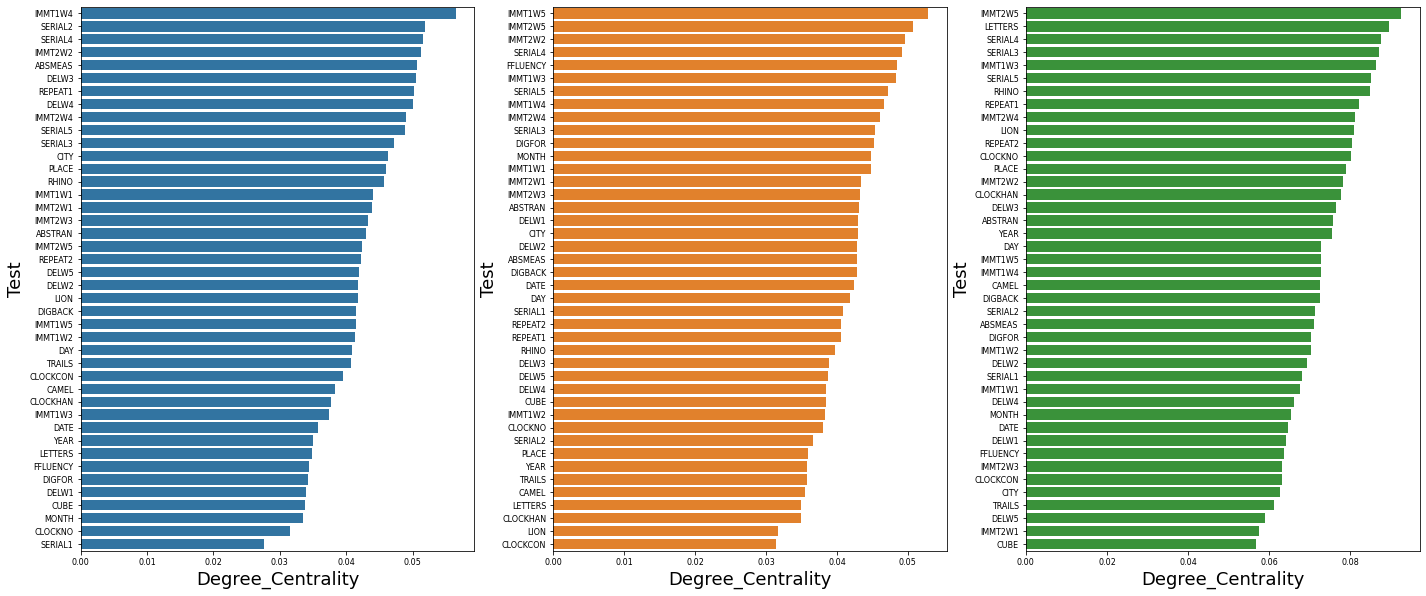

In [130]:
plot_centrality(MOCA_CN_graph, MOCA_MCI_graph, MOCA_AD_graph, MOCA_columns, "Degree_Centrality")

#### Relation between node degree and betweenness centrality

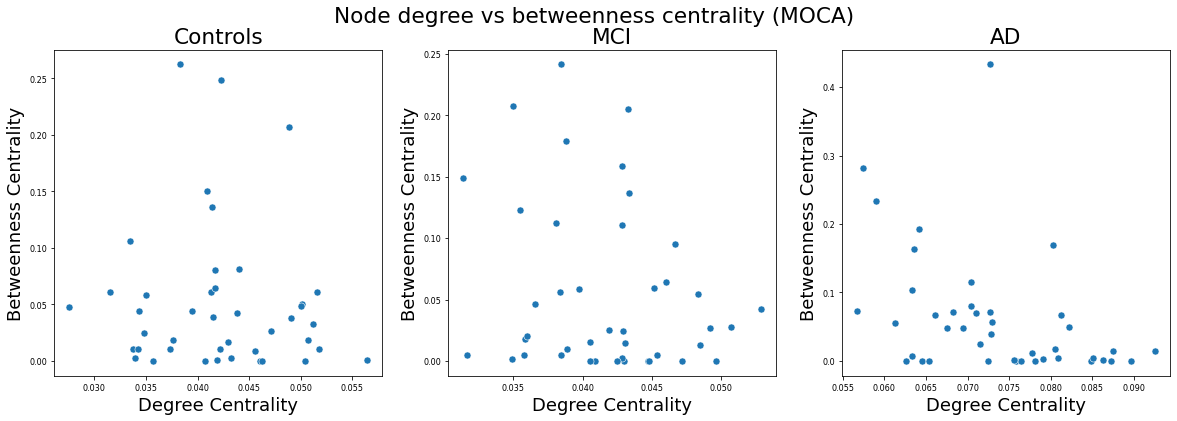

In [131]:
#Get centrality metrics table
MOCA_CN_centrality = centrality(MOCA_CN_graph, MOCA_columns)
MOCA_MCI_centrality = centrality(MOCA_MCI_graph, MOCA_columns)
MOCA_AD_centrality = centrality(MOCA_AD_graph, MOCA_columns)

#Plot
fig, axes = plt.subplots(1,3, figsize=(20,6))


sns.scatterplot(ax=axes[0],data=MOCA_CN_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[1],data=MOCA_MCI_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[2],data=MOCA_AD_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)

#labels
axes[0].set_ylabel("Betweenness Centrality")
axes[1].set_ylabel("Betweenness Centrality")
axes[2].set_ylabel("Betweenness Centrality")
axes[0].set_xlabel("Degree Centrality")
axes[1].set_xlabel("Degree Centrality")
axes[2].set_xlabel("Degree Centrality")

#add title
fig.suptitle('Node degree vs betweenness centrality (MOCA)')

#add title to subfigures
axes[0].title.set_text("Controls")
axes[1].title.set_text("MCI")
axes[2].title.set_text("AD")


plt.show()

#### 7.1.2. GLOBAL METRICS

In [132]:
MOCA_gm = global_metrics([MOCA_CN_graph, MOCA_MCI_graph, MOCA_AD_graph])
MOCA_gm.reset_index(inplace=True)
MOCA_gm

index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE
0    CN     42    861        1     1.0  1.729332          1.0  0.061572  1.0
1   MCI     42    861        1     1.0  1.711097          1.0  0.079289  1.0
2    AD     42    861        1     1.0  3.006975          1.0  0.129508  1.0

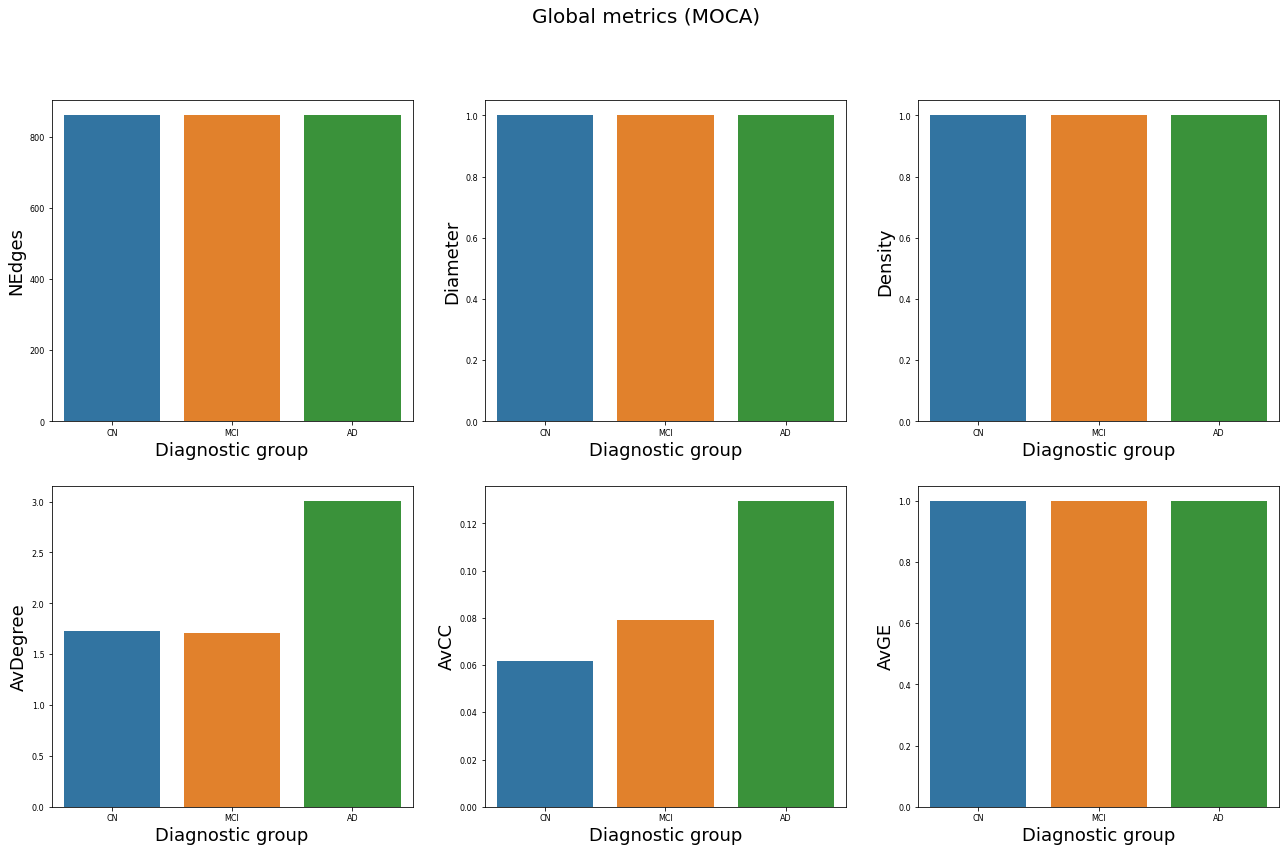

In [133]:
plot_global_metrics(MOCA_gm, 'MOCA')

### 7.4. Merged

#### 7.1.1. CENTRALITY MEASURES

In [134]:
print("Controls----------------------------------")
display(centrality(merged_CN_graph, merged_columns))
print("MCI----------------------------------")
display(centrality(merged_MCI_graph, merged_columns))
print("AD----------------------------------")
display(centrality(merged_AD_graph, merged_columns))

Controls----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
Q1SCORE           0.055995              0.077683                0.102213   
Q2SCORE           0.056134              0.078938                0.091013   
Q3SCORE           0.064334              0.088477                0.117510   
Q4SCORE           0.058812              0.081642                0.112898   
Q5SCORE           0.066045              0.088027                0.124687   
...                    ...                   ...                     ...   
MONTH             0.041644              0.089822                0.081891   
YEAR              0.053538              0.084160                0.097740   
DAY               0.043676              0.088068                0.086435   
PLACE             0.045201              0.079844                0.083255   
CITY              0.071727              0.098469                0.133917   

         Betweenness_Centrality  
Q1SCORE                0.044177  
Q2SCORE                0.011761  
Q3SCORE                0.055651  
Q4SCORE                0.093804  
Q5SCORE                0.008893  
...                         ...  
MONTH                  0.133678  
YEAR                   0.068560  
DAY                    0.000000  
PLACE                  0.155766  
CITY                   0.000287  

[85 rows x 4 columns]

MCI----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
Q1SCORE           0.049536              0.067896                0.117948   
Q2SCORE           0.032725              0.053791                0.079023   
Q3SCORE           0.045032              0.061161                0.103309   
Q4SCORE           0.053436              0.069867                0.126449   
Q5SCORE           0.048224              0.065506                0.112430   
...                    ...                   ...                     ...   
MONTH             0.046444              0.066946                0.109075   
YEAR              0.048349              0.068958                0.118158   
DAY               0.050950              0.073125                0.122532   
PLACE             0.036968              0.062026                0.089392   
CITY              0.047927              0.063282                0.113616   

         Betweenness_Centrality  
Q1SCORE                0.077740  
Q2SCORE                0.099541  
Q3SCORE                0.000000  
Q4SCORE                0.000000  
Q5SCORE                0.021515  
...                         ...  
MONTH                  0.007745  
YEAR                   0.003155  
DAY                    0.138267  
PLACE                  0.003729  
CITY                   0.010040  

[85 rows x 4 columns]

AD----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
Q1SCORE           0.106064              0.141246                0.100583   
Q2SCORE           0.124004              0.150563                0.116348   
Q3SCORE           0.099566              0.134771                0.096542   
Q4SCORE           0.127494              0.153886                0.119570   
Q5SCORE           0.107313              0.140271                0.100491   
...                    ...                   ...                     ...   
MONTH             0.076882              0.117660                0.073930   
YEAR              0.110095              0.148089                0.107717   
DAY               0.086585              0.127980                0.080099   
PLACE             0.131750              0.168331                0.128102   
CITY              0.107900              0.143995                0.104710   

         Betweenness_Centrality  
Q1SCORE                0.019793  
Q2SCORE                0.002008  
Q3SCORE                0.057085  
Q4SCORE                0.000000  
Q5SCORE                0.249283  
...                         ...  
MONTH                  0.049627  
YEAR                   0.063970  
DAY                    0.057946  
PLACE                  0.095812  
CITY                   0.064831  

[85 rows x 4 columns]

#### Plot centrality metrics

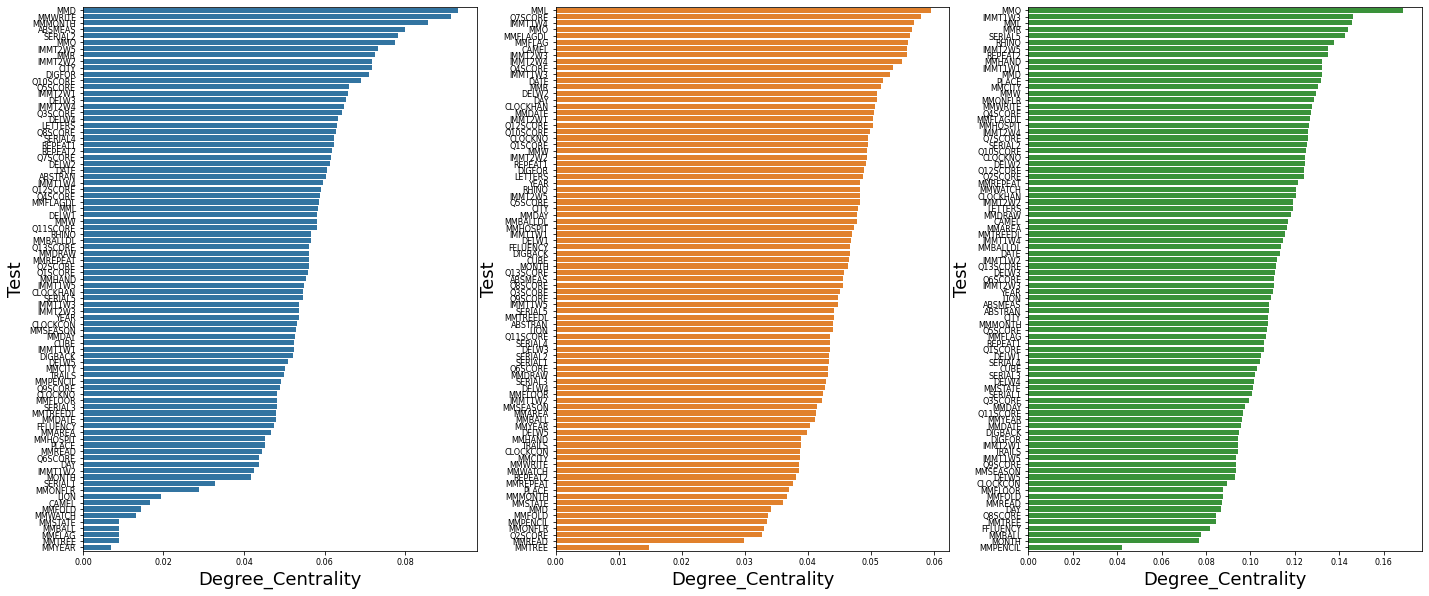

In [135]:
plot_centrality(merged_CN_graph, merged_MCI_graph, merged_AD_graph, merged_columns, "Degree_Centrality")

#### Relation between node degree and betweenness centrality

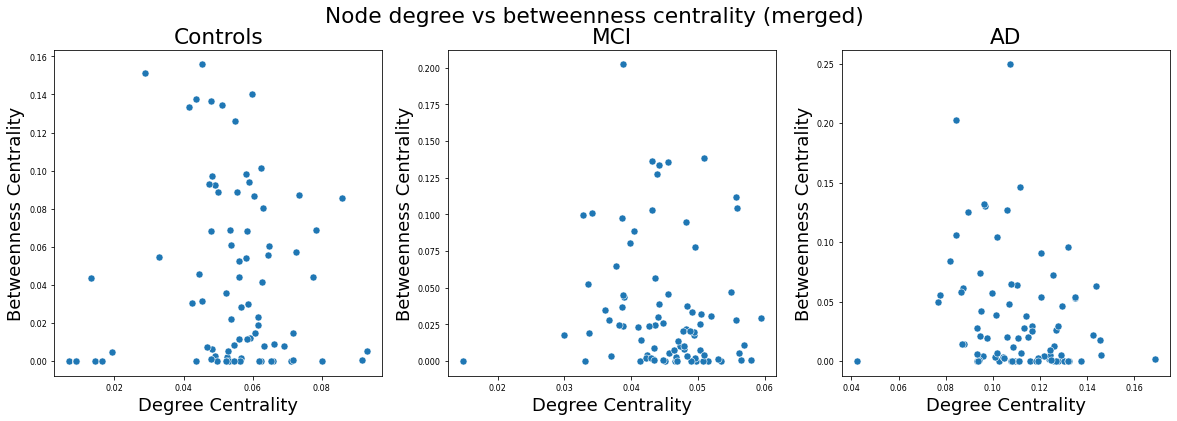

In [136]:
#Get centrality metrics table
merged_CN_centrality = centrality(merged_CN_graph, merged_columns)
merged_MCI_centrality = centrality(merged_MCI_graph, merged_columns)
merged_AD_centrality = centrality(merged_AD_graph, merged_columns)

#Plot
fig, axes = plt.subplots(1,3, figsize=(20,6))


sns.scatterplot(ax=axes[0],data=merged_CN_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[1],data=merged_MCI_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[2],data=merged_AD_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)

#labels
axes[0].set_ylabel("Betweenness Centrality")
axes[1].set_ylabel("Betweenness Centrality")
axes[2].set_ylabel("Betweenness Centrality")
axes[0].set_xlabel("Degree Centrality")
axes[1].set_xlabel("Degree Centrality")
axes[2].set_xlabel("Degree Centrality")

#add title
fig.suptitle('Node degree vs betweenness centrality (merged)')

#add title to subfigures
axes[0].title.set_text("Controls")
axes[1].title.set_text("MCI")
axes[2].title.set_text("AD")


plt.show()

#### 7.1.2. GLOBAL METRICS

In [137]:
merged_gm = global_metrics([merged_CN_graph, merged_MCI_graph, merged_AD_graph])
merged_gm.reset_index(inplace=True)
merged_gm

index NNodes NEdges Diameter   Density  AvDegree Transitivity      AvCC  \
0    CN     85   3090        2  0.865546  4.445507      0.94836  0.042708   
1   MCI     85   3511        2  0.983473  3.792544     0.994883  0.039543   
2    AD     85   3521        2  0.986275   9.35383     0.994073  0.142687   

       AvGE  
0  0.932773  
1  0.991737  
2  0.993137

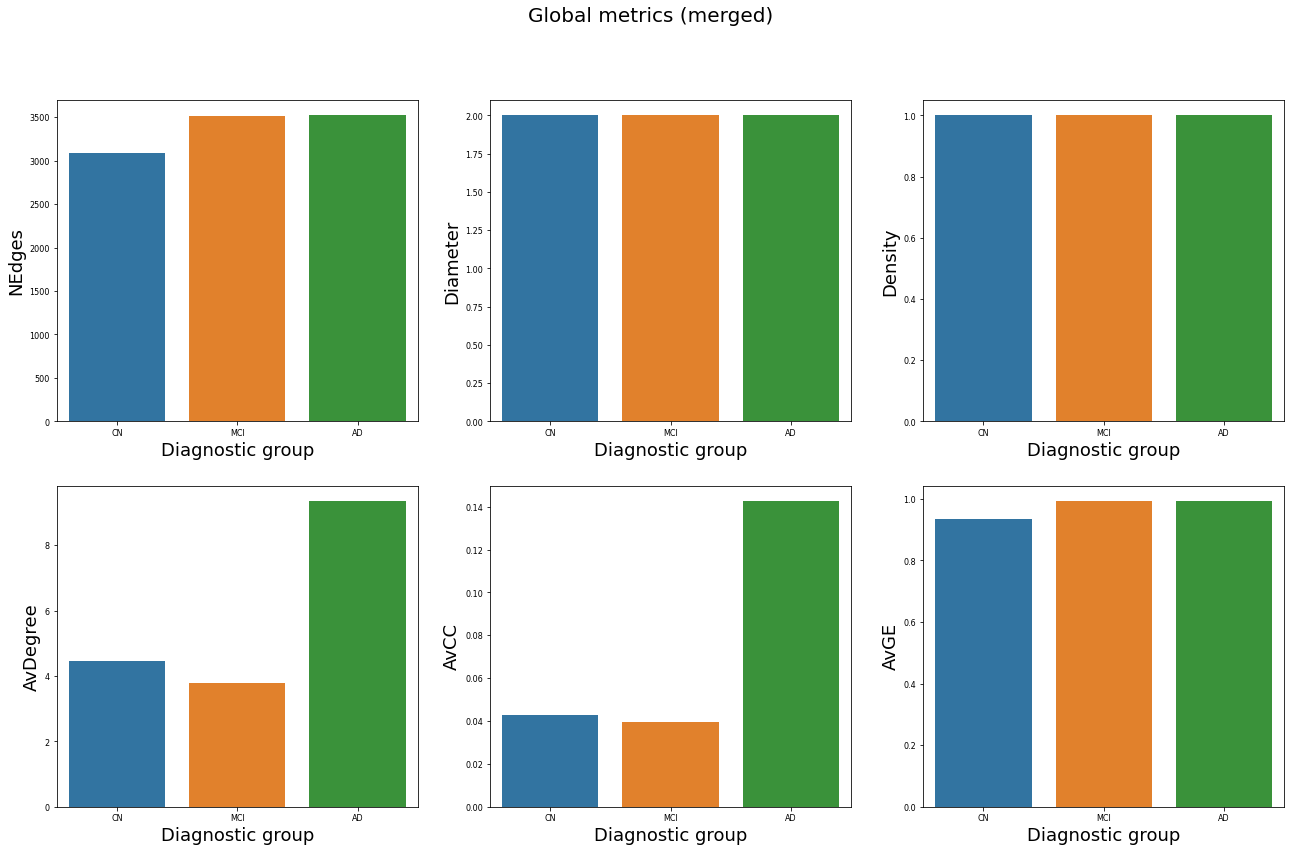

In [138]:
plot_global_metrics(merged_gm, 'merged')

## 8. COMMUNITY DETECTION

In [139]:
import networkx.algorithms.community as nx_comm

#### 1. PARTITIONS

#### 1.1. Louvain algorithm:

**Louvain Community Detection Algorithm** is a simple method to extract the community structure of a network. This is a heuristic method based on modularity optimization. 

The community structure of a network indexes the sub-division of such a network into segregated communities ormodules that contribute to the same processes while alsoallowing for a visual inspection of the network

Note that the order in which the nodes are considered can affect the final output. In the algorithm the ordering happens using a random shuffle. 

- In the epilepsy paper they calculated modularity 1,000 times for each group, and the highest proportion was chosen as the number of modules in that group. 

- Furthermore, in order to be certain regarding the module assignment for each node, they created a script that calculated the proportion of module assignment for each node in order to have each node assigned to the module with the highest probability. 

#### 1.2. Greedy modularity algorithm

This function uses **Clauset-Newman-Moore greedy modularity maximization** to find the community partition with the largest modularity.

Greedy modularity maximization begins with each node in its own community and repeatedly joins the pair of communities that lead to the largest modularity until no further increase in modularity is possible (a maximum).

#### 1.3. Kernighan-Lin bisection algorithm

This function uses **Kernighan-Lin bipartition algorithm** to partition a graph into two blocks.

This algorithm partitions a network into two sets by iteratively swapping pairs of nodes to reduce the edge cut between the two sets. The pairs are chosen according to a modified form of Kernighan-Lin, which moves node individually, alternating between sides to keep the bisection balanced.

#### 1.4. Modularity index (Label propagation)

This function uses the **asynchronous label propagation algorithm** which is probabilistic and the found communities may vary on different executions.

The algorithm proceeds as follows. After initializing each node with a unique label, the algorithm repeatedly sets the label of a node to be the label that appears most frequently among that nodes neighbors. The algorithm halts when each node has the label that appears most frequently among its neighbors. The algorithm is asynchronous because each node is updated without waiting for updates on the remaining nodes.

In [140]:
def community_detection(graphs_ls, algorithm):
    
    print("--------------------------------")
    print(algorithm, "algorithm")
    print("--------------------------------")
      
    partition_ls = []
    dx_ls = ['CN', 'MCI', 'AD']
    
    for i in range(len(graphs_ls)):
        if algorithm == "Louvain": 
            partition = nx_comm.louvain_communities(graphs_ls[i], weight='weight',seed=0)
            
        elif algorithm == "Greedy":
            partition = nx_comm.greedy_modularity_communities(graphs_ls[i], weight='weight')
        
        elif algorithm == "Bisection":
            partition = nx_comm.kernighan_lin_bisection(graphs_ls[i], weight='weight', seed=0)
            
        elif algorithm == "Label Propagation":
            partition = list(nx_comm.asyn_lpa_communities(graphs_ls[i], weight='weight', seed=0))
        
        else:
            print("This algorithm is not implemented. Please, try again.")
            break
            
        partition_ls.append(partition) #partitions
        print(dx_ls[i], ": ", partition)
        
        MI = nx_comm.modularity(graphs_ls[i], partition, weight='weight') #modularity index  
        print("Modularity Index: ", MI, "\n")
    
    return partition_ls

#### 2. DRAW GRAPH BY COMMUNITIES

In [141]:
def color_communities(graph, partition):
    
    colors = {} #create empty node dictionary
    
    #Convert set of partitions into node dictionary
    for i in range(len(partition)): #iterate for each group
        for node in partition[i]:
            colors[node] = i
            
    #Sort dictionary by keys
    node_list = list(colors.keys())
    node_list.sort()
    sorted_colors = {i: colors[i] for i in node_list}
            
    return list(sorted_colors.values())

In [142]:
def draw_graph_communities(graphs_ls, partition_ls, test_labels, pos, battery_name, algorithm):

    #Plot
    fig, axes = plt.subplots(1,3, figsize=(20,6))
    
    for i in range(len(graphs_ls)):
        
        graph = graphs_ls[i]
        partition = partition_ls[i]
        
        #node colors
        colors = color_communities(graph, partition)

        #get edges weights
        weights = list(nx.get_edge_attributes(graph,'weight').values())
        
        if test_labels is not None: 
            nx.draw(ax=axes[i], G=graph, pos=pos, labels=test_labels, with_labels=True, node_color=colors, 
                   edge_color=weights, edge_cmap=plt.cm.Greys, width=[ x*10 for x in weights])
        
        else:
            nx.draw(ax=axes[i], G=graph, pos=pos, with_labels=True, node_color=colors, 
                   edge_color=weights, edge_cmap=plt.cm.Greys, width=[ x*10 for x in weights])
    

    #add title to subfigures
    fig.suptitle(algorithm + " (" + battery_name +")", fontsize=20)
    axes[0].title.set_text("Controls")
    axes[1].title.set_text("MCI")
    axes[2].title.set_text("AD")
    
    figure_path = "./Results/Figures/Modularity/"+ battery_name + "/"+ algorithm +".svg"

    plt.savefig(figure_path, format="svg")
    plt.show()

#### 3. COMMUNITY SUBGRAPH METRICS

Each community detected by an algorithm is going to be considered as a subgraph. 

In [143]:
def metrics(graph):
    """Function to create a dictionary with all the metrics computed for a community"""
    
    metrics_dict = {}
    
    #GLOBAL METRICS
    #Compute the number of nodes 
    metrics_dict['NNodes'] = graph.number_of_nodes()
    #Compute the number of edges 
    metrics_dict['NEdges'] = graph.number_of_edges()
    #Compute the diameter of the graph
    metrics_dict['Diameter'] = nx.diameter(graph)
    #Compute the density of the graph
    metrics_dict['Density'] = nx.density(graph)
    #Compute the average degree of the network  
    metrics_dict['AvDegree'] = sum(dict(graph.degree(weight='weight')).values())/graph.number_of_nodes()
    #Compute the transitivity of the graph
    metrics_dict['Transitivity'] = nx.transitivity(graph)
    #Compute the average clustering coefficient
    metrics_dict['AvCC'] = nx.average_clustering(graph,weight='weight')
    #Compute the average global efficiency (shortest path)
    metrics_dict['AvGE'] = nx.global_efficiency(graph)
    
    #TESTS BELONGING TO THE COMMUNITY
    metrics_dict['Tests'] = list(dict(graph.nodes(data="Test")).values())
    
    return metrics_dict

In [144]:
def community_metrics(graph, partition):
    
    """Function to create a dataframe with all the metrics computed for each of the communities"""
    
    domains_list = list(dict(graph.nodes(data="Cognitive Domain")).values())
    domains = [*set(domains_list)] #unique list of domains
    
    df = pd.DataFrame(columns = ['Index','NNodes', 'NEdges', 'Diameter', 'Density', 'AvDegree', 
                                 'Transitivity','AvCC', 'AvGE', 'Tests'] + domains) #empty dataframe
    
    for i in range(len(partition)): #iterate for each community
        #create subgraph for this community
        subgraph = graph.subgraph(partition[i]) 
        #compute metrics for the subgraph 
        metrics_dict = metrics(subgraph)
        
        #community index
        metrics_dict['Index'] = i
        
        #representation of each neurocognitive domain
        domains_list_community = list(dict(subgraph.nodes(data="Cognitive Domain")).values())
        
        for domain in domains: 
            #domain_count_total = domains_list.count(domain)
            domain_count_community = domains_list_community.count(domain)
            domain_count_total = len(domains_list_community)
            metrics_dict[domain] = domain_count_community/domain_count_total #percentage of representation 
        
        #introduce metrics in new row
        df = df.append(metrics_dict, ignore_index=True)
        
    return df

#### 4. DOMAINS REPRESENTATION IN EACH COMMUNITY

In [145]:
def domains_rep(graphs_ls, partition_ls, battery_name, algorithm): 
    domains_ls = np.unique(list(nx.get_node_attributes(graphs_ls[0], 'Cognitive Domain').values())).tolist()
    columns = ['Index'] + domains_ls
    dx_ls = ['CN', 'MCI', 'AD']
    for i in range(len(graphs_ls)):
        graph = graphs_ls[i]
        partition = partition_ls[i]
        domains = community_metrics(graph, partition)[columns] #get data
        
        #Reshape data with melt() function
        domains_rs = domains.melt(id_vars=['Index'], var_name="Domain", value_name='Percentage')
        
        #send data to build stacked barplot in R
        filepath = "./Results/" + battery_name + "/" + algorithm + "_" + dx_ls[i] + ".csv" 
        domains_rs.to_csv(filepath, index=False) 

### 8.1. ADAS-Cog

In [146]:
graphs_ls = [ADAS_CN_graph, ADAS_MCI_graph, ADAS_AD_graph]

#### 8.1.1. LOUVAIN ALGORITHM

In [147]:
ADAS_Louvain_partitions = community_detection(graphs_ls, "Louvain")

--------------------------------
Louvain algorithm
--------------------------------
CN :  [{0, 3, 7}, {2, 4, 5, 6, 8, 12}, {1, 9, 10, 11}]
Modularity Index:  0.20014733870002266 

MCI :  [{0, 3, 7}, {5, 8, 9, 10, 11}, {1, 2, 4, 6, 12}]
Modularity Index:  0.20149960714477094 

AD :  [{0, 3, 6, 7}, {1, 2, 12, 5}, {4, 8, 9, 10, 11}]
Modularity Index:  0.13980399115365288 



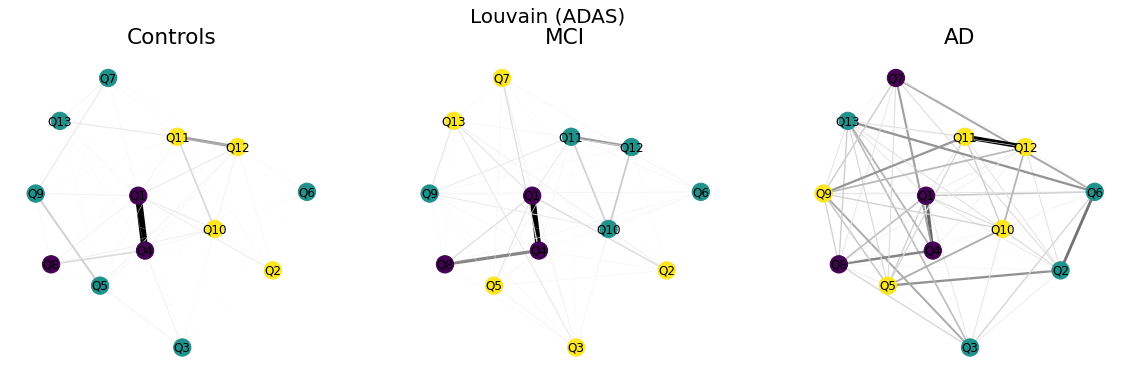

In [149]:
test_labels = {0:"Q1", 1:"Q2", 2:"Q3", 3:"Q4", 4:"Q5", 5: "Q6", 6:"Q7",
              7:"Q8",8:"Q9", 9:"Q10", 10:"Q11", 11:"Q12", 12:"Q13"}

draw_graph_communities(graphs_ls, ADAS_Louvain_partitions, test_labels, pos_ADAS, 'ADAS', 'Louvain')

#### Subgraph metrics

In [150]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(ADAS_Louvain_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], ADAS_Louvain_partitions[i]))

CN ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      3      3        1     1.0  0.612718          1.0  0.302002  1.0   
1     1      6     15        1     1.0  0.236561          1.0  0.179219  1.0   
2     2      4      6        1     1.0  0.344431          1.0  0.292935  1.0   

                                               Tests Orientation    Memory  \
0  [Word recall, Delayed word recall, Word recogn...         0.0       1.0   
1  [Constructional praxis, Naming task, Ideationa...    0.166667  0.166667   
2  [Commands, Word finding difficulty, Spoken lan...         0.0       0.0   

   Language Attention Executive  
0       0.0       0.0       0.0  
1  0.166667  0.166667  0.333333  
2       1.0       0.0       0.0

MCI ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      3      3        1     1.0   0.68623          1.0  0.496973  1.0   
1     1      5     10        1     1.0  0.431772          1.0  0.339443  1.0   
2     2      5     10        1     1.0  0.205855          1.0  0.418427  1.0   

                                               Tests Orientation Memory  \
0  [Word recall, Delayed word recall, Word recogn...         0.0    1.0   
1  [Ideational praxis, Remembering test instructi...         0.0    0.2   
2  [Commands, Constructional praxis, Naming task,...         0.2    0.0   

  Language Attention Executive  
0      0.0       0.0       0.0  
1      0.6       0.0       0.2  
2      0.4       0.2       0.2

AD ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      4      6        1     1.0  0.533282          1.0   0.50655  1.0   
1     1      4      6        1     1.0  0.494131          1.0  0.545392  1.0   
2     2      5     10        1     1.0    0.7044          1.0  0.315879  1.0   

                                               Tests Orientation Memory  \
0  [Word recall, Delayed word recall, Orientation...        0.25   0.75   
1  [Commands, Constructional praxis, Number cance...         0.0    0.0   
2  [Naming task, Remembering test instructions, C...         0.0    0.2   

  Language Attention Executive  
0      0.0       0.0       0.0  
1     0.25      0.25       0.5  
2      0.8       0.0       0.0

#### Export results

In [151]:
domains_rep(graphs_ls, ADAS_Louvain_partitions, 'ADAS', 'Louvain')

#### 8.1.2. GREEDY ALGORITHM

In [152]:
ADAS_Greedy_partitions = community_detection(graphs_ls, "Greedy")

--------------------------------
Greedy algorithm
--------------------------------
CN :  [frozenset({2, 4, 5, 6, 8, 12}), frozenset({1, 10, 11, 9}), frozenset({0, 3, 7})]
Modularity Index:  0.20014733870002266 

MCI :  [frozenset({5, 8, 9, 10, 11}), frozenset({1, 2, 4, 6, 12}), frozenset({0, 3, 7})]
Modularity Index:  0.20149960714477094 

AD :  [frozenset({4, 8, 9, 10, 11}), frozenset({0, 2, 3, 7, 12}), frozenset({1, 5, 6})]
Modularity Index:  0.1348544969685176 



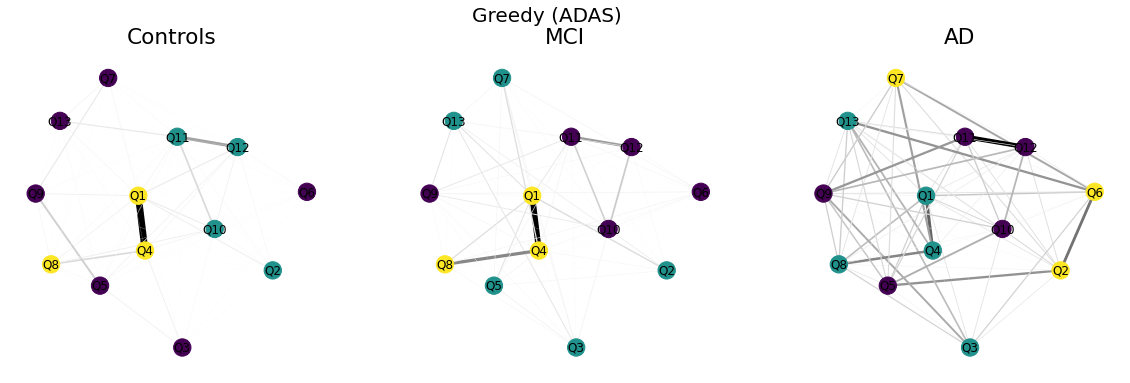

In [153]:
draw_graph_communities(graphs_ls, ADAS_Greedy_partitions, test_labels, pos_ADAS, 'ADAS', 'Greedy')

#### Subgraph metrics

In [154]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(ADAS_Greedy_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], ADAS_Greedy_partitions[i]))

CN ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      6     15        1     1.0  0.236561          1.0  0.179219  1.0   
1     1      4      6        1     1.0  0.344431          1.0  0.292935  1.0   
2     2      3      3        1     1.0  0.612718          1.0  0.302002  1.0   

                                               Tests Orientation    Memory  \
0  [Constructional praxis, Naming task, Ideationa...    0.166667  0.166667   
1  [Commands, Word finding difficulty, Spoken lan...         0.0       0.0   
2  [Word recall, Delayed word recall, Word recogn...         0.0       1.0   

   Language Attention Executive  
0  0.166667  0.166667  0.333333  
1       1.0       0.0       0.0  
2       0.0       0.0       0.0

MCI ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      5     10        1     1.0  0.431772          1.0  0.339443  1.0   
1     1      5     10        1     1.0  0.205855          1.0  0.418427  1.0   
2     2      3      3        1     1.0   0.68623          1.0  0.496973  1.0   

                                               Tests Orientation Memory  \
0  [Ideational praxis, Remembering test instructi...         0.0    0.2   
1  [Commands, Constructional praxis, Naming task,...         0.2    0.0   
2  [Word recall, Delayed word recall, Word recogn...         0.0    1.0   

  Language Attention Executive  
0      0.6       0.0       0.2  
1      0.4       0.2       0.2  
2      0.0       0.0       0.0

AD ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      5     10        1     1.0    0.7044          1.0  0.315879  1.0   
1     1      5     10        1     1.0  0.611972          1.0  0.423282  1.0   
2     2      3      3        1     1.0  0.390517          1.0  0.646788  1.0   

                                               Tests Orientation Memory  \
0  [Naming task, Remembering test instructions, C...         0.0    0.2   
1  [Word recall, Constructional praxis, Delayed w...         0.0    0.6   
2         [Commands, Ideational praxis, Orientation]    0.333333    0.0   

   Language Attention Executive  
0       0.8       0.0       0.0  
1       0.0       0.2       0.2  
2  0.333333       0.0  0.333333

#### Export results

In [155]:
domains_rep(graphs_ls, ADAS_Greedy_partitions, 'ADAS', 'Greedy')

#### 8.1.3. BISECTION ALGORITHM

In [156]:
ADAS_Bisection_partitions = community_detection(graphs_ls, "Bisection")

--------------------------------
Bisection algorithm
--------------------------------
CN :  ({2, 4, 5, 6, 8, 12}, {0, 1, 3, 7, 9, 10, 11})
Modularity Index:  0.12759365873776873 

MCI :  ({5, 8, 9, 10, 11, 12}, {0, 1, 2, 3, 4, 6, 7})
Modularity Index:  0.18413639630217754 

AD :  ({1, 4, 8, 9, 10, 11}, {0, 2, 3, 5, 6, 7, 12})
Modularity Index:  0.11648768730710077 



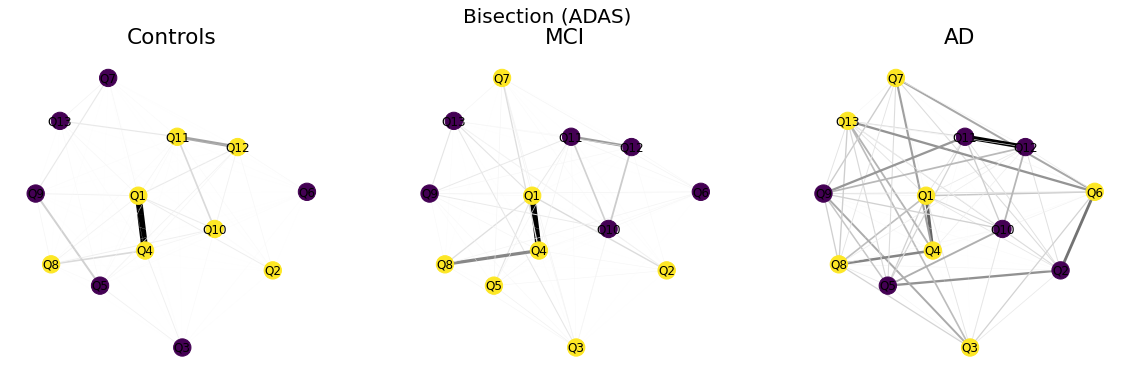

In [157]:
draw_graph_communities(graphs_ls, ADAS_Bisection_partitions, test_labels, pos_ADAS, 'ADAS', 'Bisection')

#### Subgraph metrics

In [158]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(ADAS_Bisection_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], ADAS_Bisection_partitions[i]))

CN ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      6     15        1     1.0  0.236561          1.0  0.179219  1.0   
1     1      7     21        1     1.0  0.656943          1.0  0.113192  1.0   

                                               Tests Orientation    Memory  \
0  [Constructional praxis, Naming task, Ideationa...    0.166667  0.166667   
1  [Word recall, Commands, Delayed word recall, W...         0.0  0.428571   

   Language Attention Executive  
0  0.166667  0.166667  0.333333  
1  0.571429       0.0       0.0

MCI ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      6     15        1     1.0  0.452403          1.0  0.280998  1.0   
1     1      7     21        1     1.0  0.577933          1.0  0.117364  1.0   

                                               Tests Orientation    Memory  \
0  [Ideational praxis, Remembering test instructi...         0.0  0.166667   
1  [Word recall, Commands, Constructional praxis,...    0.142857  0.428571   

   Language Attention Executive  
0       0.5  0.166667  0.166667  
1  0.285714       0.0  0.142857

AD ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      6     15        1     1.0  0.753673          1.0  0.266326  1.0   
1     1      7     21        1     1.0  0.758213          1.0  0.310893  1.0   

                                               Tests Orientation    Memory  \
0  [Commands, Naming task, Remembering test instr...         0.0  0.166667   
1  [Word recall, Constructional praxis, Delayed w...    0.142857  0.428571   

   Language Attention Executive  
0  0.833333       0.0       0.0  
1       0.0  0.142857  0.285714

#### Export results

In [159]:
domains_rep(graphs_ls, ADAS_Bisection_partitions, 'ADAS', 'Bisection')

#### 8.1.4. LABEL PROPAGATION ALGORITHM

In [160]:
ADAS_Label_partitions = community_detection(graphs_ls, "Label Propagation")

--------------------------------
Label Propagation algorithm
--------------------------------
CN :  [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}]
Modularity Index:  4.440892098500626e-16 

MCI :  [{0, 1, 3, 4, 6, 7}, {2, 5, 8, 9, 10, 11, 12}]
Modularity Index:  0.1990085104524996 

AD :  [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}]
Modularity Index:  5.551115123125783e-16 



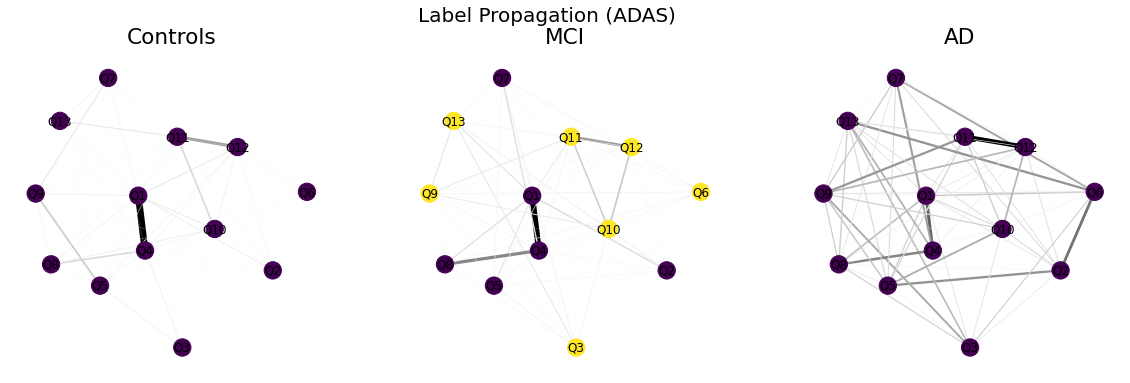

In [161]:
draw_graph_communities(graphs_ls, ADAS_Label_partitions, test_labels, pos_ADAS, 'ADAS', 'Label Propagation')

#### Subgraph metrics

In [162]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(ADAS_Label_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], ADAS_Label_partitions[i]))

CN ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     13     78        1     1.0  0.666075          1.0  0.056999  1.0   

                                               Tests Orientation    Memory  \
0  [Word recall, Commands, Constructional praxis,...    0.076923  0.307692   

   Language Attention Executive  
0  0.384615  0.076923  0.153846

MCI ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      6     15        1     1.0  0.581826          1.0  0.139606  1.0   
1     1      7     21        1     1.0   0.47493          1.0  0.243952  1.0   

                                               Tests Orientation    Memory  \
0  [Word recall, Commands, Delayed word recall, N...    0.166667       0.5   
1  [Constructional praxis, Ideational praxis, Rem...         0.0  0.142857   

   Language Attention Executive  
0  0.333333       0.0       0.0  
1  0.428571  0.142857  0.285714

AD ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     13     78        1     1.0  1.224074          1.0  0.175316  1.0   

                                               Tests Orientation    Memory  \
0  [Word recall, Commands, Constructional praxis,...    0.076923  0.307692   

   Language Attention Executive  
0  0.384615  0.076923  0.153846

#### Export results

In [163]:
domains_rep(graphs_ls, ADAS_Label_partitions, 'ADAS', 'Asyn')

### 8.2. MMSE

In [164]:
graphs_ls = [MMSE_CN_graph, MMSE_MCI_graph, MMSE_AD_graph]

#### 8.2.1. LOUVAIN ALGORITHM

In [165]:
MMSE_Louvain_partitions = community_detection(graphs_ls, "Louvain")

--------------------------------
Louvain algorithm
--------------------------------
CN :  [{2, 21, 5, 6, 9, 10}, {17, 11, 29}, {0, 1, 3, 4, 7, 12, 18, 19, 20, 22, 23, 24, 25, 26, 27}, {16, 8, 28, 13, 14, 15}]
Modularity Index:  0.30074402736144945 

MCI :  [{0, 1, 2, 3, 4, 6, 8, 9, 24, 25, 29}, {7, 10, 11, 12, 18, 19, 20, 23, 26, 28}, {16, 17, 27, 13, 14, 15}, {21, 5, 22}]
Modularity Index:  0.2708544891441043 

AD :  [{4, 6, 10, 21, 24, 25, 26}, {18, 19, 20, 22}, {16, 17, 7, 8, 9, 11, 14, 15}, {0, 1, 2, 3, 5, 12, 13, 23, 27, 28, 29}]
Modularity Index:  0.1691331930132842 



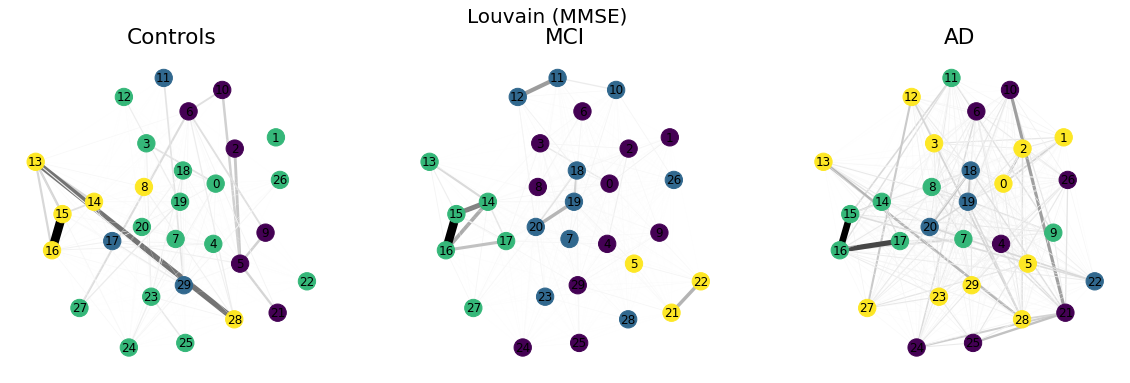

In [166]:
test_labels = None

draw_graph_communities(graphs_ls, MMSE_Louvain_partitions, test_labels, pos_MMSE, 'MMSE', 'Louvain')

#### Subgraph metrics

In [167]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(MMSE_Louvain_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], MMSE_Louvain_partitions[i]))

CN ---------------------


Index NNodes NEdges Diameter  Density  AvDegree Transitivity      AvCC  \
0     0      6     12        2      0.8  0.510812     0.769231  0.181722   
1     1      3      3        1      1.0  0.207003          1.0  0.432372   
2     2     15     92        2  0.87619  0.388766     0.988235  0.115132   
3     3      6     15        1      1.0  0.858164          1.0  0.097857   

       AvGE                                              Tests Orientation  \
0       0.9  [Orientation to time , Orientation to place, O...    0.666667   
1       1.0  [Spell WORLD backwards, Registration-repeat 3 ...         0.0   
2  0.938095  [Orientation to time , Orientation to time , O...    0.333333   
3       1.0  [Orientation to place, Spell WORLD backwards, ...    0.166667   

  Concentration    Memory  Language Visuospatial   
0           0.0  0.166667  0.166667           0.0  
1      0.333333  0.333333       0.0      0.333333  
2           0.0  0.266667       0.4           0.0  
3      0.666667       0.0  0.166667           0.0

MCI ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     11     55        1     1.0  0.372384          1.0  0.201318  1.0   
1     1     10     45        1     1.0  0.539061          1.0  0.095703  1.0   
2     2      6     15        1     1.0  1.003339          1.0  0.175919  1.0   
3     3      3      3        1     1.0  0.317019          1.0  0.316329  1.0   

                                               Tests Orientation  \
0  [Orientation to time , Orientation to time , O...    0.727273   
1  [Orientation to place, Registration-repeat 3 w...         0.1   
2  [Spell WORLD backwards, Spell WORLD backwards,...         0.0   
3  [Orientation to place, Recognize and name comm...    0.333333   

  Concentration Memory  Language Visuospatial   
0           0.0    0.0  0.181818      0.090909  
1           0.0    0.6       0.3           0.0  
2      0.833333    0.0  0.166667           0.0  
3           0.0    0.0  0.666667           0.0

AD ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      7     21        1     1.0  0.669149          1.0  0.315175  1.0   
1     1      4      6        1     1.0  0.459779          1.0  0.639155  1.0   
2     2      8     28        1     1.0  0.839347          1.0  0.129075  1.0   
3     3     11     55        1     1.0  0.709161          1.0  0.214662  1.0   

                                               Tests Orientation  \
0  [Orientation to time , Orientation to place, R...    0.285714   
1  [Repat words, Repat words, Repat words, Recogn...         0.0   
2  [Orientation to place, Orientation to place, O...       0.375   
3  [Orientation to time , Orientation to time , O...    0.454545   

  Concentration    Memory  Language Visuospatial   
0           0.0  0.142857  0.571429           0.0  
1           0.0      0.75      0.25           0.0  
2           0.5     0.125       0.0           0.0  
3      0.090909  0.090909  0.272727      0.090909

#### Export results

In [168]:
domains_rep(graphs_ls, MMSE_Louvain_partitions, 'MMSE', 'Louvain')

#### 8.2.2. GREEDY ALGORITHM

In [169]:
MMSE_Greedy_partitions = community_detection(graphs_ls, "Greedy")

--------------------------------
Greedy algorithm
--------------------------------
CN :  [frozenset({0, 1, 3, 4, 7, 8, 12, 18, 19, 20, 22, 23, 24, 25, 26, 27}), frozenset({2, 5, 6, 21, 9, 10}), frozenset({16, 28, 13, 14, 15}), frozenset({17, 11, 29})]
Modularity Index:  0.3075416583870383 

MCI :  [frozenset({0, 1, 2, 3, 4, 5, 7, 8, 9, 21, 22, 23, 24, 25, 26, 28, 29}), frozenset({18, 19, 20, 6, 10, 11, 12}), frozenset({16, 17, 27, 13, 14, 15})]
Modularity Index:  0.2728737315978412 

AD :  [frozenset({0, 1, 2, 3, 5, 12, 13, 23, 27, 28, 29}), frozenset({7, 8, 9, 11, 14, 15, 16, 17}), frozenset({26, 4, 21, 6, 24, 25, 10}), frozenset({18, 19, 20, 22})]
Modularity Index:  0.1691331930132842 



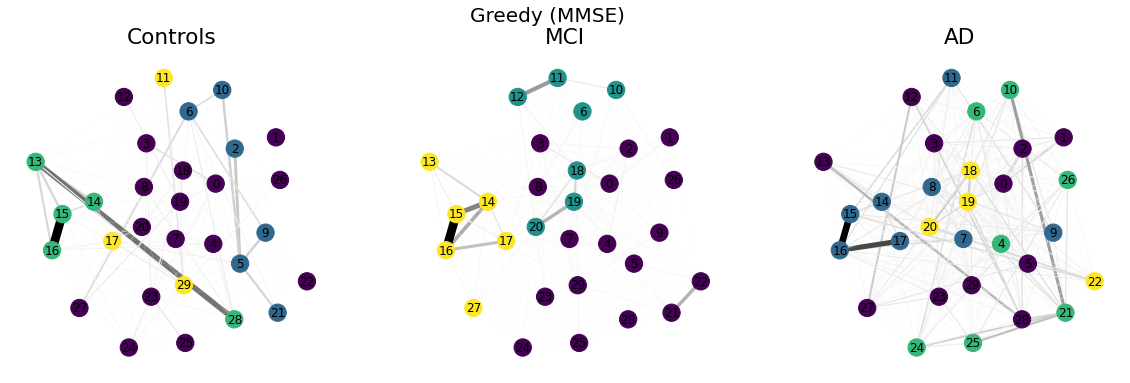

In [170]:
draw_graph_communities(graphs_ls, MMSE_Greedy_partitions, test_labels, pos_MMSE, 'MMSE', 'Greedy')

#### Subgraph metrics

In [171]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(MMSE_Greedy_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], MMSE_Greedy_partitions[i]))

CN ---------------------


Index NNodes NEdges Diameter   Density  AvDegree Transitivity      AvCC  \
0     0     16    106        2  0.883333  0.409578     0.989848  0.113315   
1     1      6     12        2       0.8  0.510812     0.769231  0.181722   
2     2      5     10        1       1.0  0.946865          1.0  0.140595   
3     3      3      3        1       1.0  0.207003          1.0  0.432372   

       AvGE                                              Tests Orientation  \
0  0.941667  [Orientation to time , Orientation to time , O...       0.375   
1       0.9  [Orientation to time , Orientation to place, O...    0.666667   
2       1.0  [Spell WORLD backwards, Spell WORLD backwards,...         0.0   
3       1.0  [Spell WORLD backwards, Registration-repeat 3 ...         0.0   

  Concentration    Memory  Language Visuospatial   
0           0.0      0.25     0.375           0.0  
1           0.0  0.166667  0.166667           0.0  
2           0.8       0.0       0.2           0.0  
3      0.333333  0.333333       0.0      0.333333

MCI ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     17    136        1     1.0  0.482981          1.0  0.064621  1.0   
1     1      7     21        1     1.0  0.592358          1.0  0.176112  1.0   
2     2      6     15        1     1.0  1.003339          1.0  0.175919  1.0   

                                               Tests Orientation  \
0  [Orientation to time , Orientation to time , O...    0.529412   
1  [Orientation to place, Registration-repeat 3 w...    0.142857   
2  [Spell WORLD backwards, Spell WORLD backwards,...         0.0   

  Concentration    Memory  Language Visuospatial   
0           0.0       0.0  0.411765      0.058824  
1           0.0  0.857143       0.0           0.0  
2      0.833333       0.0  0.166667           0.0

AD ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     11     55        1     1.0  0.709161          1.0  0.214662  1.0   
1     1      8     28        1     1.0  0.839347          1.0  0.129075  1.0   
2     2      7     21        1     1.0  0.669149          1.0  0.315175  1.0   
3     3      4      6        1     1.0  0.459779          1.0  0.639155  1.0   

                                               Tests Orientation  \
0  [Orientation to time , Orientation to time , O...    0.454545   
1  [Orientation to place, Orientation to place, O...       0.375   
2  [Orientation to time , Orientation to place, R...    0.285714   
3  [Repat words, Repat words, Repat words, Recogn...         0.0   

  Concentration    Memory  Language Visuospatial   
0      0.090909  0.090909  0.272727      0.090909  
1           0.5     0.125       0.0           0.0  
2           0.0  0.142857  0.571429           0.0  
3           0.0      0.75      0.25           0.0

#### Export results

In [172]:
domains_rep(graphs_ls, MMSE_Greedy_partitions, 'MMSE', 'Greedy')

#### 8.2.3. BISECTION ALGORITHM

In [173]:
MMSE_Bisection_partitions = community_detection(graphs_ls, "Bisection")

--------------------------------
Bisection algorithm
--------------------------------
CN :  ({0, 1, 2, 3, 5, 6, 9, 10, 12, 18, 19, 21, 23, 25, 27}, {4, 7, 8, 11, 13, 14, 15, 16, 17, 20, 22, 24, 26, 28, 29})
Modularity Index:  0.21783047958963983 

MCI :  ({0, 1, 2, 3, 4, 9, 13, 14, 15, 16, 17, 24, 25, 27, 29}, {5, 6, 7, 8, 10, 11, 12, 18, 19, 20, 21, 22, 23, 26, 28})
Modularity Index:  0.19313245061297765 

AD :  ({4, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17, 21, 24, 25, 26}, {0, 1, 2, 3, 5, 12, 13, 18, 19, 20, 22, 23, 27, 28, 29})
Modularity Index:  0.12791580820685078 



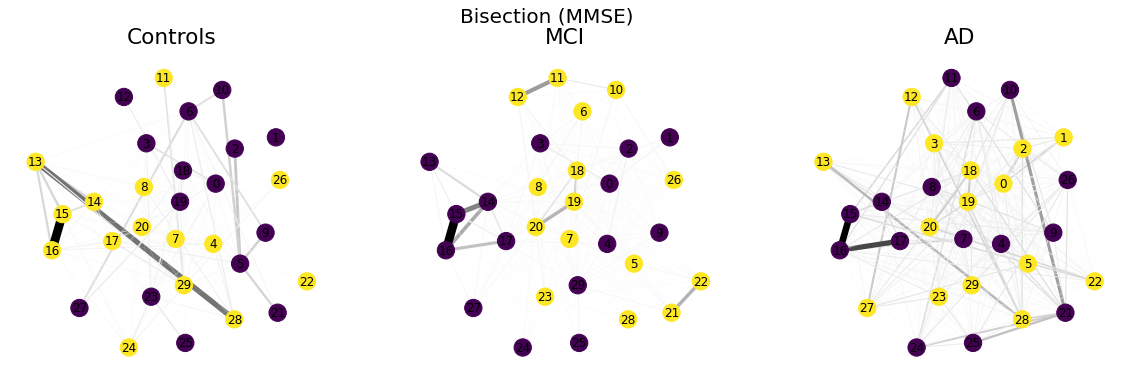

In [174]:
draw_graph_communities(graphs_ls, MMSE_Bisection_partitions, test_labels, pos_MMSE, 'MMSE', 'Bisection')

#### Subgraph metrics

In [175]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(MMSE_Bisection_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], MMSE_Bisection_partitions[i]))

CN ---------------------


Index NNodes NEdges Diameter   Density  AvDegree Transitivity      AvCC  \
0     0     15     74        2  0.704762  0.485022     0.850866  0.075926   
1     1     15    105        1       1.0  0.699695          1.0  0.031134   

       AvGE                                              Tests Orientation  \
0  0.852381  [Orientation to time , Orientation to time , O...    0.466667   
1       1.0  [Orientation to time , Orientation to place, O...         0.2   

  Concentration    Memory  Language Visuospatial   
0           0.0  0.266667  0.266667           0.0  
1      0.333333  0.133333  0.266667      0.066667

MCI ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     15    105        1     1.0  0.744087          1.0  0.037385  1.0   
1     1     15    105        1     1.0  0.620595          1.0  0.069272  1.0   

                                               Tests Orientation  \
0  [Orientation to time , Orientation to time , O...         0.4   
1  [Orientation to place, Orientation to place, O...    0.266667   

  Concentration Memory  Language Visuospatial   
0      0.333333    0.0       0.2      0.066667  
1           0.0    0.4  0.333333           0.0

AD ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     15    105        1     1.0   1.08935          1.0  0.086961  1.0   
1     1     15    105        1     1.0  0.919749          1.0  0.189856  1.0   

                                               Tests Orientation  \
0  [Orientation to time , Orientation to place, O...    0.333333   
1  [Orientation to time , Orientation to time , O...    0.333333   

  Concentration    Memory  Language Visuospatial   
0      0.266667  0.133333  0.266667           0.0  
1      0.066667  0.266667  0.266667      0.066667

#### Export results

In [176]:
domains_rep(graphs_ls, MMSE_Bisection_partitions, 'MMSE', 'Bisection')

#### 8.2.4. LABEL PROPAGATION ALGORITHM

In [177]:
MMSE_Label_partitions = community_detection(graphs_ls, "Label Propagation")

--------------------------------
Label Propagation algorithm
--------------------------------
CN :  [{0, 1, 3, 4, 6, 7, 8, 11, 12, 13, 14, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29}, {2, 5, 9, 10, 21}, {16, 15}]
Modularity Index:  0.19862660224012196 

MCI :  [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29}, {16, 13, 14, 15}]
Modularity Index:  0.1929655326390679 

AD :  [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29}]
Modularity Index:  -3.3306690738754696e-16 



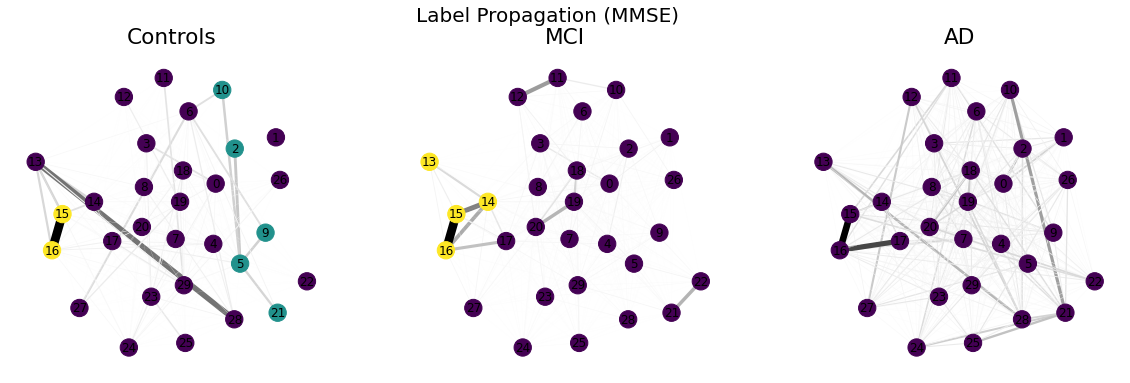

In [178]:
draw_graph_communities(graphs_ls, MMSE_Label_partitions, test_labels, pos_MMSE, 'MMSE', 'Label Propagation')

#### Subgraph metrics

In [179]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(MMSE_Label_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], MMSE_Label_partitions[i]))

CN ---------------------


Index NNodes NEdges Diameter   Density  AvDegree Transitivity      AvCC  \
0     0     23    232        2  0.916996  0.638917     0.995475  0.035089   
1     1      5      7        2       0.7  0.415255          0.6  0.203592   
2     2      2      1        1       1.0  0.872015            0       0.0   

       AvGE                                              Tests Orientation  \
0  0.958498  [Orientation to time , Orientation to time , O...    0.304348   
1      0.85  [Orientation to time , Orientation to place, O...         0.6   
2       1.0     [Spell WORLD backwards, Spell WORLD backwards]         0.0   

  Concentration    Memory  Language Visuospatial   
0      0.130435  0.217391  0.304348      0.043478  
1           0.0       0.2       0.2           0.0  
2           1.0       0.0       0.0           0.0

MCI ---------------------


Index NNodes NEdges Diameter Density AvDegree Transitivity      AvCC AvGE  \
0     0     26    325        1     1.0  0.79666          1.0  0.054708  1.0   
1     1      4      6        1     1.0  1.06983          1.0  0.335591  1.0   

                                               Tests Orientation  \
0  [Orientation to time , Orientation to time , O...    0.384615   
1  [Spell WORLD backwards, Spell WORLD backwards,...         0.0   

  Concentration    Memory  Language Visuospatial   
0      0.038462  0.230769  0.307692      0.038462  
1           1.0       0.0       0.0           0.0

AD ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     30    435        1     1.0  1.596229          1.0  0.061916  1.0   

                                               Tests Orientation  \
0  [Orientation to time , Orientation to time , O...    0.333333   

  Concentration Memory  Language Visuospatial   
0      0.166667    0.2  0.266667      0.033333

#### Export results

In [180]:
domains_rep(graphs_ls, MMSE_Label_partitions, 'MMSE', 'Asyn')

### 8.3. MOCA

In [181]:
graphs_ls = [MOCA_CN_graph, MOCA_MCI_graph, MOCA_AD_graph]

#### 8.3.1. LOUVAIN ALGORITHM

In [182]:
MOCA_Louvain_partitions = community_detection(graphs_ls, "Louvain")

--------------------------------
Louvain algorithm
--------------------------------
CN :  [{0, 3, 5, 7, 27, 29, 30}, {2, 37, 22, 23, 24, 25, 21}, {32, 33, 34, 35, 20, 4, 28, 31}, {1, 19, 38, 6, 40, 9}, {39, 10, 11, 12, 14, 15, 16, 17}, {18, 36, 8, 41, 26, 13}]
Modularity Index:  0.14627358110107055 

MCI :  [{1, 2, 3, 4, 20}, {7, 6, 29, 30}, {0, 36, 37, 38, 39, 8, 9, 41, 13, 14, 18, 19, 26, 27}, {16, 17, 40, 10, 11, 12, 15}, {24, 25, 22, 23}, {32, 33, 34, 35, 5, 21, 28, 31}]
Modularity Index:  0.14067328508931992 

AD :  [{1, 34, 8, 9, 10, 21, 31}, {18, 19, 20, 5, 6, 7, 28}, {41, 11, 12, 13, 14, 15, 16, 17, 26, 27}, {0, 3, 4, 22, 23, 24, 25}, {32, 33, 2, 35, 36, 37, 38, 39, 40, 29, 30}]
Modularity Index:  0.0964236186121946 



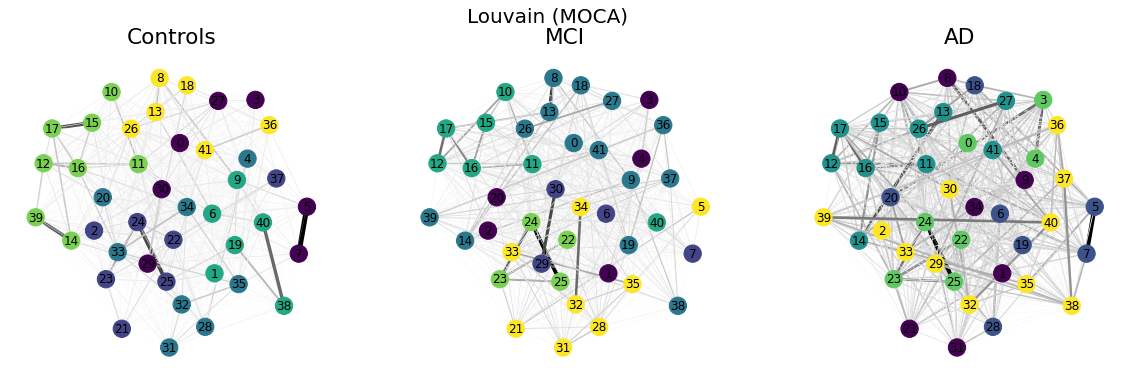

In [183]:
draw_graph_communities(graphs_ls, MOCA_Louvain_partitions, test_labels, pos_MOCA, 'MOCA', 'Louvain')

#### Subgraph metrics

In [184]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(MOCA_Louvain_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], MOCA_Louvain_partitions[i]))

CN ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      7     21        1     1.0   0.51992          1.0  0.131044  1.0   
1     1      7     21        1     1.0  0.558114          1.0  0.184163  1.0   
2     2      8     28        1     1.0  0.521951          1.0  0.360414  1.0   
3     3      6     15        1     1.0  0.456989          1.0  0.215574  1.0   
4     4      8     28        1     1.0  0.748562          1.0  0.221999  1.0   
5     5      6     15        1     1.0  0.417263          1.0  0.372078  1.0   

                                               Tests Orientation Visuospatial  \
0  [Trail-making task, Draw a clock (numbers), Na...         0.0     0.285714   
1  [Draw a clock (contorn), Orientation to date, ...    0.142857     0.142857   
2  [Delayed recall, Delayed recall, Delayed recal...         0.0        0.125   
3  [Copy cube, Orientation to date, Name animals,...    0.333333     0.166667   
4  [Orientation to date, Read a list of words and...       0.125          0.0   
5  [Orientation to date, Read a list of words and...    0.333333          0.0   

     Memory Executive function  Language Attention  
0       0.0           0.285714  0.428571       0.0  
1       0.0                0.0       0.0  0.714286  
2     0.625                0.0     0.125     0.125  
3  0.166667                0.0  0.166667  0.166667  
4     0.875                0.0       0.0       0.0  
5  0.333333                0.0  0.166667  0.166667

MCI ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      5     10        1     1.0  0.335939          1.0  0.463891  1.0   
1     1      4      6        1     1.0  0.328754          1.0  0.297299  1.0   
2     2     14     91        1     1.0  0.791008          1.0   0.13739  1.0   
3     3      7     21        1     1.0   0.62836          1.0  0.335437  1.0   
4     4      4      6        1     1.0  0.607005          1.0  0.455645  1.0   
5     5      8     28        1     1.0  0.538329          1.0  0.243887  1.0   

                                               Tests Orientation Visuospatial  \
0  [Copy cube, Draw a clock (contorn), Draw a clo...         0.0          0.8   
1  [Abstraction (similarity between pair of words...         0.0          0.0   
2  [Trail-making task, Orientation to date, Orien...    0.357143     0.071429   
3  [Orientation to place, Read a list of words an...    0.142857          0.0   
4  [Count substracting by 10, Count substracting ...         0.0          0.0   
5  [Delayed recall, Delayed recall, Delayed recal...         0.0          0.0   

     Memory Executive function  Language Attention  
0       0.0                0.0       0.0       0.2  
1       0.0                0.5       0.5       0.0  
2  0.285714                0.0  0.142857  0.142857  
3  0.857143                0.0       0.0       0.0  
4       0.0                0.0       0.0       1.0  
5     0.625                0.0      0.25     0.125

AD ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      7     21        1     1.0  0.739874          1.0  0.370625  1.0   
1     1      7     21        1     1.0  0.825057          1.0    0.2635  1.0   
2     2     10     45        1     1.0  1.012466          1.0  0.281201  1.0   
3     3      7     21        1     1.0  0.902124          1.0  0.278246  1.0   
4     4     11     55        1     1.0  0.997989          1.0  0.317378  1.0   

                                               Tests Orientation Visuospatial  \
0  [Copy cube, Delayed recall, Read a list of wor...         0.0     0.142857   
1  [Name animals, Name animals, Name animals, For...         0.0          0.0   
2  [Orientation to place, Read a list of words an...         0.1          0.0   
3  [Trail-making task, Draw a clock (numbers), Dr...         0.0     0.428571   
4  [Delayed recall, Delayed recall, Draw a clock ...    0.454545     0.090909   

     Memory Executive function  Language Attention  
0  0.714286                0.0       0.0  0.142857  
1       0.0                0.0  0.571429  0.428571  
2       0.7                0.0       0.2       0.0  
3       0.0                0.0       0.0  0.571429  
4  0.272727           0.181818       0.0       0.0

#### Export results

In [185]:
domains_rep(graphs_ls, MOCA_Louvain_partitions, 'MOCA', 'Louvain')

#### 8.3.2. GREEDY ALGORITHM

In [186]:
MOCA_Greedy_partitions = community_detection(graphs_ls, "Greedy")

--------------------------------
Greedy algorithm
--------------------------------
CN :  [frozenset({2, 36, 37, 41, 18, 21, 22, 23, 24, 25, 26}), frozenset({39, 8, 10, 11, 12, 13, 14, 15, 16, 17}), frozenset({32, 33, 34, 35, 4, 20, 28, 31}), frozenset({0, 3, 5, 7, 27, 29, 30}), frozenset({1, 19, 6, 38, 40, 9})]
Modularity Index:  0.1449875339762445 

MCI :  [frozenset({32, 33, 34, 35, 36, 37, 39, 41, 19, 28, 31}), frozenset({38, 8, 9, 13, 14, 18, 26, 27}), frozenset({16, 17, 40, 10, 11, 12, 15}), frozenset({0, 1, 2, 3, 4, 20}), frozenset({7, 21, 5, 6, 29, 30}), frozenset({24, 25, 22, 23})]
Modularity Index:  0.13748909759104092 

AD :  [frozenset({1, 2, 3, 4, 33, 34, 8, 9, 13, 14, 20, 21, 28, 31}), frozenset({32, 35, 36, 37, 38, 39, 40, 41, 29, 30}), frozenset({18, 19, 5, 6, 7, 26, 27}), frozenset({16, 17, 10, 11, 12, 15}), frozenset({0, 22, 23, 24, 25})]
Modularity Index:  0.09511976288369531 



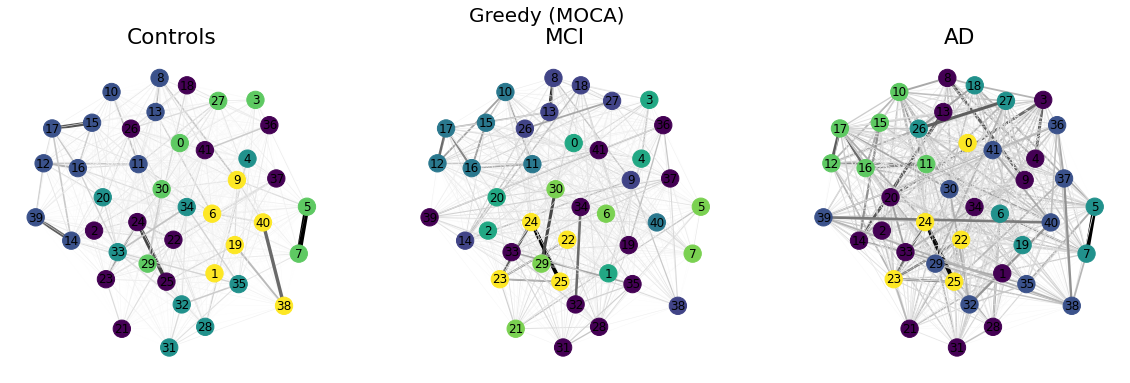

In [187]:
draw_graph_communities(graphs_ls, MOCA_Greedy_partitions, test_labels, pos_MOCA, 'MOCA', 'Greedy')

#### Subgraph metrics

In [188]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(MOCA_Greedy_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], MOCA_Greedy_partitions[i]))

CN ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     11     55        1     1.0  0.673378          1.0  0.133555  1.0   
1     1     10     45        1     1.0   0.80007          1.0   0.18437  1.0   
2     2      8     28        1     1.0  0.521951          1.0  0.360414  1.0   
3     3      7     21        1     1.0   0.51992          1.0  0.131044  1.0   
4     4      6     15        1     1.0  0.456989          1.0  0.215574  1.0   

                                               Tests Orientation Visuospatial  \
0  [Draw a clock (contorn), Orientation to date, ...    0.272727     0.090909   
1  [Orientation to date, Read a list of words and...         0.1          0.0   
2  [Delayed recall, Delayed recall, Delayed recal...         0.0        0.125   
3  [Trail-making task, Draw a clock (numbers), Na...         0.0     0.285714   
4  [Copy cube, Orientation to date, Name animals,...    0.333333     0.166667   

     Memory Executive function  Language Attention  
0       0.0                0.0  0.090909  0.545455  
1       0.9                0.0       0.0       0.0  
2     0.625                0.0     0.125     0.125  
3       0.0           0.285714  0.428571       0.0  
4  0.166667                0.0  0.166667  0.166667

MCI ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     11     55        1     1.0  0.683964          1.0  0.216157  1.0   
1     1      8     28        1     1.0  0.557603          1.0  0.173986  1.0   
2     2      7     21        1     1.0   0.62836          1.0  0.335437  1.0   
3     3      6     15        1     1.0  0.359264          1.0  0.400005  1.0   
4     4      6     15        1     1.0   0.36564          1.0  0.161113  1.0   
5     5      4      6        1     1.0  0.607005          1.0  0.455645  1.0   

                                               Tests Orientation Visuospatial  \
0  [Delayed recall, Delayed recall, Delayed recal...    0.363636          0.0   
1  [Orientation to date, Read a list of words and...       0.125          0.0   
2  [Orientation to place, Read a list of words an...    0.142857          0.0   
3  [Trail-making task, Copy cube, Draw a clock (c...         0.0     0.833333   
4  [Name animals, Name animals, Name animals, Cou...         0.0          0.0   
5  [Count substracting by 10, Count substracting ...         0.0          0.0   

     Memory Executive function  Language Attention  
0  0.454545                0.0  0.090909  0.090909  
1       0.5                0.0      0.25     0.125  
2  0.857143                0.0       0.0       0.0  
3       0.0                0.0       0.0  0.166667  
4       0.0           0.333333       0.5  0.166667  
5       0.0                0.0       0.0       1.0

AD ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     14     91        1     1.0     1.202          1.0  0.238136  1.0   
1     1     10     45        1     1.0  0.925379          1.0  0.325426  1.0   
2     2      7     21        1     1.0  0.837786          1.0  0.268311  1.0   
3     3      6     15        1     1.0  0.727512          1.0  0.356703  1.0   
4     4      5     10        1     1.0  0.765002          1.0  0.395053  1.0   

                                               Tests Orientation Visuospatial  \
0  [Copy cube, Draw a clock (contorn), Draw a clo...         0.0     0.285714   
1  [Delayed recall, Delayed recall, Orientation t...         0.6          0.0   
2  [Name animals, Name animals, Name animals, For...         0.0          0.0   
3  [Read a list of words and repeat them , Read a...         0.0          0.0   
4  [Trail-making task, Count substracting by 8, C...         0.0          0.2   

  Memory Executive function  Language Attention  
0    0.5                0.0  0.071429  0.142857  
1    0.2                0.2       0.0       0.0  
2    0.0                0.0  0.714286  0.285714  
3    1.0                0.0       0.0       0.0  
4    0.0                0.0       0.0       0.8

#### Export results

In [189]:
domains_rep(graphs_ls, MOCA_Greedy_partitions, 'MOCA', 'Greedy')

#### 8.3.3. BISECTION ALGORITHM

In [190]:
MOCA_Bisection_partitions = community_detection(graphs_ls, "Bisection")

--------------------------------
Bisection algorithm
--------------------------------
CN :  ({0, 1, 3, 4, 5, 6, 7, 8, 9, 13, 19, 24, 25, 26, 27, 30, 36, 37, 38, 40, 41}, {2, 10, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 23, 28, 29, 31, 32, 33, 34, 35, 39})
Modularity Index:  0.10499666710944677 

MCI :  ({0, 8, 9, 13, 14, 18, 19, 20, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41}, {1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 15, 16, 17, 21, 22, 23, 24, 25, 26, 27, 40})
Modularity Index:  0.10113508208828254 

AD :  ({1, 2, 10, 11, 12, 13, 14, 15, 16, 17, 20, 23, 24, 33, 35, 36, 37, 38, 39, 40, 41}, {0, 3, 4, 5, 6, 7, 8, 9, 18, 19, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 34})
Modularity Index:  0.07286938564427708 



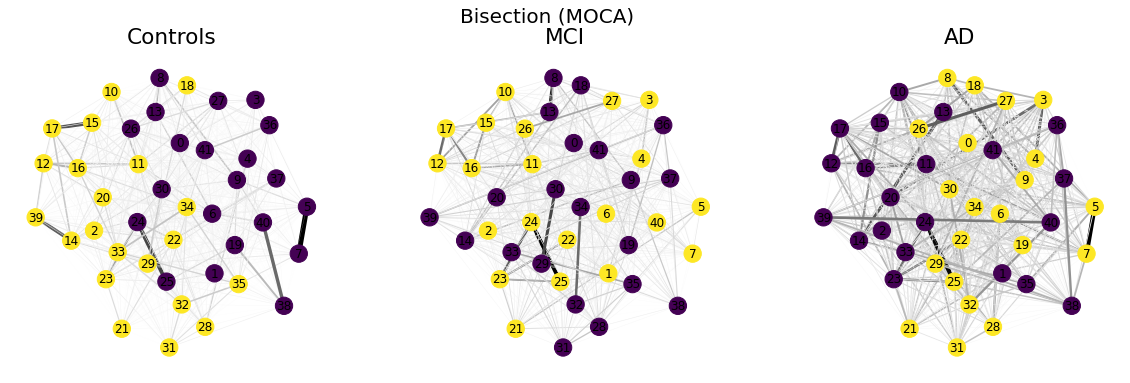

In [191]:
draw_graph_communities(graphs_ls, MOCA_Bisection_partitions, test_labels, pos_MOCA, 'MOCA', 'Bisection')

#### Subgraph metrics

In [192]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(MOCA_Bisection_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], MOCA_Bisection_partitions[i]))

CN ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     21    210        1     1.0   1.03396          1.0  0.076059  1.0   
1     1     21    210        1     1.0  1.058608          1.0  0.105551  1.0   

                                               Tests Orientation Visuospatial  \
0  [Trail-making task, Copy cube, Draw a clock (n...    0.238095     0.190476   
1  [Draw a clock (contorn), Read a list of words ...    0.047619     0.047619   

     Memory Executive function  Language Attention  
0  0.142857           0.047619  0.238095  0.142857  
1  0.571429           0.047619  0.047619  0.238095

MCI ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     21    210        1     1.0  1.033802          1.0  0.113257  1.0   
1     1     21    210        1     1.0  1.023415          1.0  0.094515  1.0   

                                               Tests Orientation Visuospatial  \
0  [Trail-making task, Read a list of words and r...    0.238095     0.047619   
1  [Copy cube, Draw a clock (contorn), Draw a clo...    0.047619     0.190476   

     Memory Executive function  Language Attention  
0  0.428571           0.095238  0.047619  0.142857  
1  0.285714                0.0  0.238095  0.238095

AD ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     21    210        1     1.0  1.730701          1.0  0.219725  1.0   
1     1     21    210        1     1.0  1.714529          1.0  0.152886  1.0   

                                               Tests Orientation Visuospatial  \
0  [Copy cube, Draw a clock (contorn), Read a lis...    0.285714     0.095238   
1  [Trail-making task, Draw a clock (numbers), Dr...         0.0     0.142857   

     Memory Executive function  Language Attention  
0   0.47619                0.0       0.0  0.142857  
1  0.238095           0.095238  0.285714  0.238095

#### Export results

In [193]:
domains_rep(graphs_ls, MOCA_Bisection_partitions, 'MOCA', 'Bisection')

#### 8.3.4. LABEL PROPAGATION ALGORITHM

In [194]:
MOCA_Label_partitions = community_detection(graphs_ls, "Label Propagation")

--------------------------------
Label Propagation algorithm
--------------------------------
CN :  [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41}]
Modularity Index:  1.1102230246251565e-15 

MCI :  [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41}]
Modularity Index:  4.440892098500626e-16 

AD :  [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41}]
Modularity Index:  -8.881784197001252e-16 



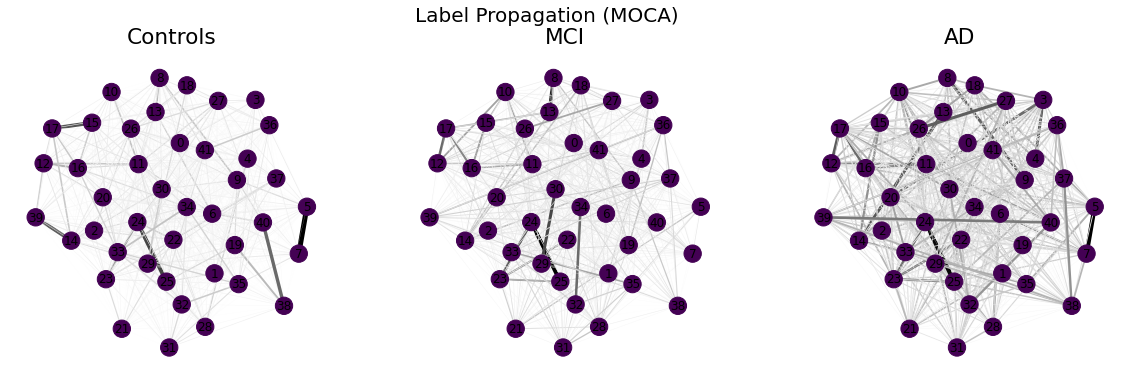

In [195]:
draw_graph_communities(graphs_ls, MOCA_Label_partitions, test_labels, pos_MOCA, 'MOCA', 'Label Propagation')

#### Subgraph metrics

In [196]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(MOCA_Label_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], MOCA_Label_partitions[i]))

CN ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     42    861        1     1.0  1.729332          1.0  0.061572  1.0   

                                               Tests Orientation Visuospatial  \
0  [Trail-making task, Copy cube, Draw a clock (c...    0.142857     0.119048   

     Memory Executive function  Language Attention  
0  0.357143           0.047619  0.142857  0.190476

MCI ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     42    861        1     1.0  1.711097          1.0  0.079289  1.0   

                                               Tests Orientation Visuospatial  \
0  [Trail-making task, Copy cube, Draw a clock (c...    0.142857     0.119048   

     Memory Executive function  Language Attention  
0  0.357143           0.047619  0.142857  0.190476

AD ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     42    861        1     1.0  3.006975          1.0  0.129508  1.0   

                                               Tests Orientation Visuospatial  \
0  [Trail-making task, Copy cube, Draw a clock (c...    0.142857     0.119048   

     Memory Executive function  Language Attention  
0  0.357143           0.047619  0.142857  0.190476

#### Export results

In [197]:
domains_rep(graphs_ls, MOCA_Label_partitions, 'MOCA', 'Asyn')

### 8.4. Merged

In [198]:
graphs_ls = [ADAS_CN_graph, ADAS_MCI_graph, ADAS_AD_graph]

#### 8.4.1. LOUVAIN ALGORITHM

In [199]:
merged_Louvain_partitions = community_detection(graphs_ls, "Louvain")

--------------------------------
Louvain algorithm
--------------------------------
CN :  [{0, 3, 7}, {2, 4, 5, 6, 8, 12}, {1, 9, 10, 11}]
Modularity Index:  0.20014733870002266 

MCI :  [{0, 3, 7}, {5, 8, 9, 10, 11}, {1, 2, 4, 6, 12}]
Modularity Index:  0.20149960714477094 

AD :  [{0, 3, 6, 7}, {1, 2, 12, 5}, {4, 8, 9, 10, 11}]
Modularity Index:  0.13980399115365288 



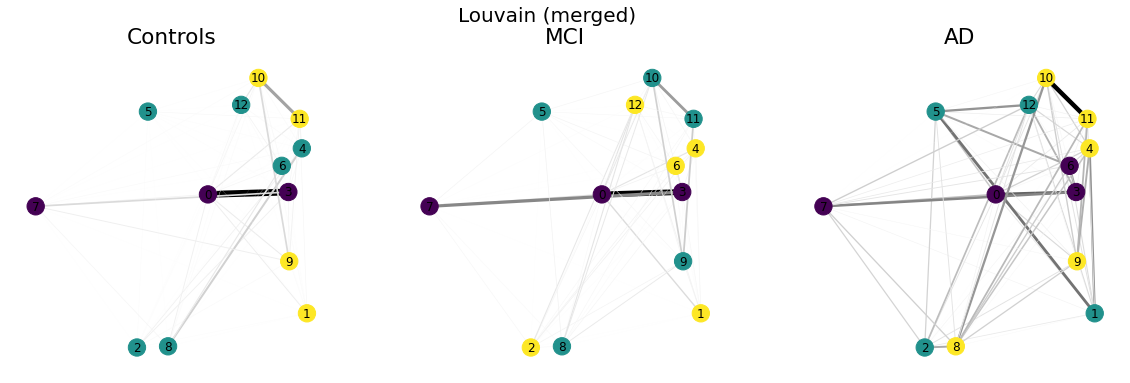

In [200]:
draw_graph_communities(graphs_ls, merged_Louvain_partitions, test_labels, pos_merged, 'merged', 'Louvain')

#### Subgraph metrics

In [201]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(merged_Louvain_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], merged_Louvain_partitions[i]))

CN ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      3      3        1     1.0  0.612718          1.0  0.302002  1.0   
1     1      6     15        1     1.0  0.236561          1.0  0.179219  1.0   
2     2      4      6        1     1.0  0.344431          1.0  0.292935  1.0   

                                               Tests Orientation    Memory  \
0  [Word recall, Delayed word recall, Word recogn...         0.0       1.0   
1  [Constructional praxis, Naming task, Ideationa...    0.166667  0.166667   
2  [Commands, Word finding difficulty, Spoken lan...         0.0       0.0   

   Language Attention Executive  
0       0.0       0.0       0.0  
1  0.166667  0.166667  0.333333  
2       1.0       0.0       0.0

MCI ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      3      3        1     1.0   0.68623          1.0  0.496973  1.0   
1     1      5     10        1     1.0  0.431772          1.0  0.339443  1.0   
2     2      5     10        1     1.0  0.205855          1.0  0.418427  1.0   

                                               Tests Orientation Memory  \
0  [Word recall, Delayed word recall, Word recogn...         0.0    1.0   
1  [Ideational praxis, Remembering test instructi...         0.0    0.2   
2  [Commands, Constructional praxis, Naming task,...         0.2    0.0   

  Language Attention Executive  
0      0.0       0.0       0.0  
1      0.6       0.0       0.2  
2      0.4       0.2       0.2

AD ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      4      6        1     1.0  0.533282          1.0   0.50655  1.0   
1     1      4      6        1     1.0  0.494131          1.0  0.545392  1.0   
2     2      5     10        1     1.0    0.7044          1.0  0.315879  1.0   

                                               Tests Orientation Memory  \
0  [Word recall, Delayed word recall, Orientation...        0.25   0.75   
1  [Commands, Constructional praxis, Number cance...         0.0    0.0   
2  [Naming task, Remembering test instructions, C...         0.0    0.2   

  Language Attention Executive  
0      0.0       0.0       0.0  
1     0.25      0.25       0.5  
2      0.8       0.0       0.0

#### Export results

In [202]:
domains_rep(graphs_ls, merged_Louvain_partitions, 'merged', 'Louvain')

#### 8.4.2. GREEDY ALGORITHM

In [203]:
merged_Greedy_partitions = community_detection(graphs_ls, "Greedy")

--------------------------------
Greedy algorithm
--------------------------------
CN :  [frozenset({2, 4, 5, 6, 8, 12}), frozenset({1, 10, 11, 9}), frozenset({0, 3, 7})]
Modularity Index:  0.20014733870002266 

MCI :  [frozenset({5, 8, 9, 10, 11}), frozenset({1, 2, 4, 6, 12}), frozenset({0, 3, 7})]
Modularity Index:  0.20149960714477094 

AD :  [frozenset({4, 8, 9, 10, 11}), frozenset({0, 2, 3, 7, 12}), frozenset({1, 5, 6})]
Modularity Index:  0.1348544969685176 



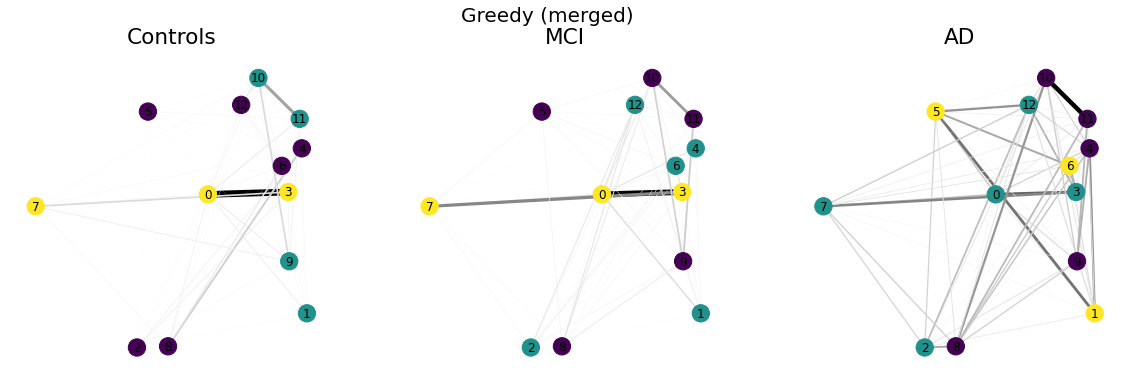

In [204]:
draw_graph_communities(graphs_ls, merged_Greedy_partitions, test_labels, pos_merged, 'merged', 'Greedy')

#### Subgraph metrics

In [205]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(merged_Greedy_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], merged_Greedy_partitions[i]))

CN ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      6     15        1     1.0  0.236561          1.0  0.179219  1.0   
1     1      4      6        1     1.0  0.344431          1.0  0.292935  1.0   
2     2      3      3        1     1.0  0.612718          1.0  0.302002  1.0   

                                               Tests Orientation    Memory  \
0  [Constructional praxis, Naming task, Ideationa...    0.166667  0.166667   
1  [Commands, Word finding difficulty, Spoken lan...         0.0       0.0   
2  [Word recall, Delayed word recall, Word recogn...         0.0       1.0   

   Language Attention Executive  
0  0.166667  0.166667  0.333333  
1       1.0       0.0       0.0  
2       0.0       0.0       0.0

MCI ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      5     10        1     1.0  0.431772          1.0  0.339443  1.0   
1     1      5     10        1     1.0  0.205855          1.0  0.418427  1.0   
2     2      3      3        1     1.0   0.68623          1.0  0.496973  1.0   

                                               Tests Orientation Memory  \
0  [Ideational praxis, Remembering test instructi...         0.0    0.2   
1  [Commands, Constructional praxis, Naming task,...         0.2    0.0   
2  [Word recall, Delayed word recall, Word recogn...         0.0    1.0   

  Language Attention Executive  
0      0.6       0.0       0.2  
1      0.4       0.2       0.2  
2      0.0       0.0       0.0

AD ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      5     10        1     1.0    0.7044          1.0  0.315879  1.0   
1     1      5     10        1     1.0  0.611972          1.0  0.423282  1.0   
2     2      3      3        1     1.0  0.390517          1.0  0.646788  1.0   

                                               Tests Orientation Memory  \
0  [Naming task, Remembering test instructions, C...         0.0    0.2   
1  [Word recall, Constructional praxis, Delayed w...         0.0    0.6   
2         [Commands, Ideational praxis, Orientation]    0.333333    0.0   

   Language Attention Executive  
0       0.8       0.0       0.0  
1       0.0       0.2       0.2  
2  0.333333       0.0  0.333333

In [206]:
domains_rep(graphs_ls, merged_Greedy_partitions, 'merged', 'Greedy')

#### 8.4.3. BISECTION ALGORITHM

In [207]:
merged_Bisection_partitions = community_detection(graphs_ls, "Bisection")

--------------------------------
Bisection algorithm
--------------------------------
CN :  ({2, 4, 5, 6, 8, 12}, {0, 1, 3, 7, 9, 10, 11})
Modularity Index:  0.12759365873776873 

MCI :  ({5, 8, 9, 10, 11, 12}, {0, 1, 2, 3, 4, 6, 7})
Modularity Index:  0.18413639630217754 

AD :  ({1, 4, 8, 9, 10, 11}, {0, 2, 3, 5, 6, 7, 12})
Modularity Index:  0.11648768730710077 



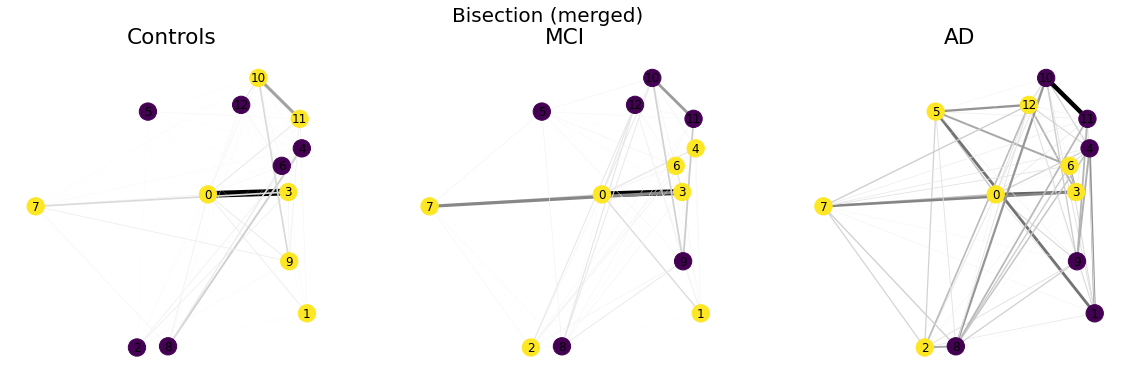

In [208]:
draw_graph_communities(graphs_ls, merged_Bisection_partitions, test_labels, pos_merged, 'merged', 'Bisection')

#### Subgraph metrics

In [209]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(merged_Bisection_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], merged_Bisection_partitions[i]))

CN ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      6     15        1     1.0  0.236561          1.0  0.179219  1.0   
1     1      7     21        1     1.0  0.656943          1.0  0.113192  1.0   

                                               Tests Orientation    Memory  \
0  [Constructional praxis, Naming task, Ideationa...    0.166667  0.166667   
1  [Word recall, Commands, Delayed word recall, W...         0.0  0.428571   

   Language Attention Executive  
0  0.166667  0.166667  0.333333  
1  0.571429       0.0       0.0

MCI ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      6     15        1     1.0  0.452403          1.0  0.280998  1.0   
1     1      7     21        1     1.0  0.577933          1.0  0.117364  1.0   

                                               Tests Orientation    Memory  \
0  [Ideational praxis, Remembering test instructi...         0.0  0.166667   
1  [Word recall, Commands, Constructional praxis,...    0.142857  0.428571   

   Language Attention Executive  
0       0.5  0.166667  0.166667  
1  0.285714       0.0  0.142857

AD ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      6     15        1     1.0  0.753673          1.0  0.266326  1.0   
1     1      7     21        1     1.0  0.758213          1.0  0.310893  1.0   

                                               Tests Orientation    Memory  \
0  [Commands, Naming task, Remembering test instr...         0.0  0.166667   
1  [Word recall, Constructional praxis, Delayed w...    0.142857  0.428571   

   Language Attention Executive  
0  0.833333       0.0       0.0  
1       0.0  0.142857  0.285714

#### Export results

In [210]:
domains_rep(graphs_ls, merged_Bisection_partitions, 'merged', 'Bisection')

#### 8.4.4. LABEL PROPAGATION ALGORITHM

In [211]:
merged_Label_partitions = community_detection(graphs_ls, "Label Propagation")

--------------------------------
Label Propagation algorithm
--------------------------------
CN :  [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}]
Modularity Index:  4.440892098500626e-16 

MCI :  [{0, 1, 3, 4, 6, 7}, {2, 5, 8, 9, 10, 11, 12}]
Modularity Index:  0.1990085104524996 

AD :  [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}]
Modularity Index:  5.551115123125783e-16 



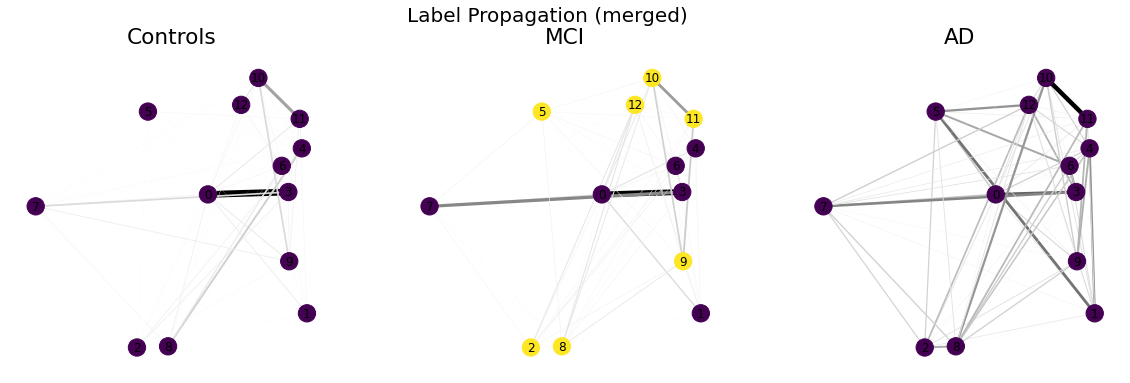

In [212]:
draw_graph_communities(graphs_ls, merged_Label_partitions, test_labels, pos_merged, 'merged', 'Label Propagation')

In [213]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(merged_Label_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], merged_Label_partitions[i]))

CN ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     13     78        1     1.0  0.666075          1.0  0.056999  1.0   

                                               Tests Orientation    Memory  \
0  [Word recall, Commands, Constructional praxis,...    0.076923  0.307692   

   Language Attention Executive  
0  0.384615  0.076923  0.153846

MCI ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      6     15        1     1.0  0.581826          1.0  0.139606  1.0   
1     1      7     21        1     1.0   0.47493          1.0  0.243952  1.0   

                                               Tests Orientation    Memory  \
0  [Word recall, Commands, Delayed word recall, N...    0.166667       0.5   
1  [Constructional praxis, Ideational praxis, Rem...         0.0  0.142857   

   Language Attention Executive  
0  0.333333       0.0       0.0  
1  0.428571  0.142857  0.285714

AD ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     13     78        1     1.0  1.224074          1.0  0.175316  1.0   

                                               Tests Orientation    Memory  \
0  [Word recall, Commands, Constructional praxis,...    0.076923  0.307692   

   Language Attention Executive  
0  0.384615  0.076923  0.153846

#### Export results

In [214]:
domains_rep(graphs_ls, merged_Label_partitions, 'merged', 'Asyn')